# **Introduction**
### The project focus of this project is to analyze 4 cold start recommendation models' age and gender biases and check whether the bias in the models is the same as that of the data

### Below are the experiments conducted by all the group members as well as the results.

# **Yomna's Section**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
#Import the required libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.utils.data as data_utils
import torch.optim as optim
from torch.utils.data import DistributedSampler, DataLoader


from tqdm import tqdm
from sklearn.model_selection import train_test_split
import torch
import torch.utils.data as data_utils
import torch.optim as optim
from torch.utils.data import DistributedSampler, DataLoader
import torch.nn as nn
import time
from copy import deepcopy
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F
import math

from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt


pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# #Data of users from a video platform to be used as the source/training data
# video_data_path = '/content/drive/MyDrive/sbr_data_1M.csv'
# #Similar data but collected from articels to be used as the target/testing data
# #Zero percent cold data
# article_data_0_path = '/content/drive/MyDrive/cold_data.csv'
# #Thirty percent cold data
# article_data_03_path = '/content/drive/MyDrive/cold_data_0.3.csv'
# #Seventy percent cold data
# article_data_07_path = '/content/drive/MyDrive/cold_data_0.7.csv'
# #Hundered percent cold data
# article_data_1_path = '/content/drive/MyDrive/cold_data_1.csv'

In [ ]:
#Data of users from a video platform to be used as the source/training data
video_data_path = 'Data/sbr_data_1M.csv'
#Similar data but collected from articels to be used as the target/testing data
#Zero percent cold data
article_data_0_path = 'Data/cold_data.csv'
#Thirty percent cold data
article_data_03_path = 'Data/cold_data_0.3.csv'
#Seventy percent cold data
article_data_07_path = 'Data/cold_data_0.7.csv'
#Hundered percent cold data
article_data_1_path = 'Data/cold_data_1.csv'

In [ ]:
#Read the data from the csv files
video_data = pd.read_csv(video_data_path)
article_data_0 = pd.read_csv(article_data_0_path)
article_data_03 = pd.read_csv(article_data_03_path)
article_data_07 = pd.read_csv(article_data_07_path)
article_data_1 = pd.read_csv(article_data_1_path)

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\2301756399.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  video_data = pd.read_csv(video_data_path)


The preprocessing done to the data will be minimal as the goal here is to try to follow a similar dlow to the paper referenced which is
"Yuan, G., Yuan, F., Li, Y., Kong, B., Li, S., Chen, L., ... & Qie, X. (2022, December). Tenrec: A Large-scale Multipurpose Benchmark Dataset for Recommender Systems. In Advances in Neural Information Processing Systems (pp. 11480-11493). Curran Associates, Inc." and then find the  age and gender biases in the models and analyse the results.

In [ ]:
#Check if any of the data contains duplicates or nulls
print("Video data shape: ", video_data.shape)
print("Video data total dublicates: ")
video_data.duplicated().sum()
print("Video data total nulls: ")
video_data.isna().sum()

print("article_data_0 shape: ", article_data_0.shape)
print("article_data_0 total dublicates: ")
article_data_0.duplicated().sum()
print("article_data_0 total nulls: ")
article_data_0.isna().sum()

print("article_data_03 shape: ", article_data_03.shape)
print("article_data_03 total dublicates: ")
article_data_03.duplicated().sum()
print("article_data_03 total nulls: ")
article_data_03.isna().sum()

print("article_data_07 shape: ", article_data_07.shape)
print("article_data_07 total dublicates: ")
article_data_07.duplicated().sum()
print("article_data_07 total nulls: ")
article_data_07.isna().sum()

print("article_data_1 shape: ", article_data_1.shape)
print("article_data_1 total dublicates: ")
article_data_1.duplicated().sum()
print("article_data_1 total nulls: ")
article_data_1.isna().sum()

Video data shape:  (38300254, 10)
Video data total dublicates: 


26455

Video data total nulls: 


user_id           0
item_id           0
click             0
follow            0
like              0
share             0
video_category    0
watching_times    0
gender            0
age               0
dtype: int64

article_data_0 shape:  (343305, 20)
article_data_0 total dublicates: 


3757

article_data_0 total nulls: 


user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

article_data_03 shape:  (2706527, 20)
article_data_03 total dublicates: 


113154

article_data_03 total nulls: 


user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

article_data_07 shape:  (1263750, 20)
article_data_07 total dublicates: 


49128

article_data_07 total nulls: 


user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

article_data_1 shape:  (206629, 20)
article_data_1 total dublicates: 


1633

article_data_1 total nulls: 


user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

In [ ]:
#As there are duplicates found in all dataframes they will all be dropped
video_data.drop_duplicates(inplace = True)
article_data_0.drop_duplicates(inplace = True)
article_data_03.drop_duplicates(inplace = True)
article_data_07.drop_duplicates(inplace = True)
article_data_1.drop_duplicates(inplace = True)

In [ ]:
#Display the dataframe information
video_data.info()
article_data_0.info()
article_data_03.info()
article_data_07.info()
article_data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38273799 entries, 0 to 38300253
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 3.1+ GB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 339548 entries, 0 to 343304
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   user_id          339548 non-null  int64  
 1   item_id          339548 non-null  int64  
 2   click            339548 non-null  float64
 3   gender           339548 non-null  int64  
 4   age              339548 non-null  int64  
 5   click_count      339548 non-null  int64  
 6   like_co

### As some of the actual columns are supposed to be categorical, in order to display the correct description for them those columns will be converted. One thing to be noted as the model requires all the values to be in their current format or else it will throw an error, the change will only be temporary to display the accurate data description.

In [ ]:
# For the source data
video_data_for_info_only = video_data.copy()
video_data_for_info_only['video_category'] = video_data_for_info_only['video_category'].astype('category')

video_data_for_info_only['like'] = video_data_for_info_only['like'].astype('category')
video_data_for_info_only['follow'] = video_data_for_info_only['follow'].astype('category')

video_data_for_info_only['gender'] = video_data_for_info_only['gender'].astype('category')
video_data_for_info_only['age'] = video_data_for_info_only['age'].astype('category')
video_data_for_info_only['click'] = video_data_for_info_only['click'].astype('category')

video_data_for_info_only['user_id'] = video_data_for_info_only['user_id'].astype('category')
video_data_for_info_only['item_id'] = video_data_for_info_only['item_id'].astype('category')
video_data_for_info_only['share'] = video_data_for_info_only['share'].astype('category')

video_data_for_info_only.describe(include='all')

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
count,38273799.0,38273799.0,38273799.0,38273799.0,38273799.0,38273799.0,38273799,3.827380e+07,38273799.0,38273799.0
unique,1000000.0,1197009.0,1.0,2.0,2.0,2.0,5,NaN,3.0,8.0
top,327480.0,779.0,1.0,0.0,0.0,0.0,0,NaN,1.0,2.0
freq,846.0,65262.0,38273799.0,38140363.0,36748472.0,38119630.0,20123789,NaN,22550091.0,18214195.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.490815e+00,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.067165e+00,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000e+00,NaN,NaN


In [ ]:
#For the target data with zero percent cold data
article_data_0_for_info_only = article_data_0.copy()

article_data_0_for_info_only['read'] = article_data_0_for_info_only['read'].astype('category')
article_data_0_for_info_only['share'] = article_data_0_for_info_only['share'].astype('category')
article_data_0_for_info_only['like'] = article_data_0_for_info_only['like'].astype('category')
article_data_0_for_info_only['follow'] = article_data_0_for_info_only['follow'].astype('category')
article_data_0_for_info_only['favorite'] = article_data_0_for_info_only['favorite'].astype('category')

article_data_0_for_info_only['gender'] = article_data_0_for_info_only['gender'].astype('category')
article_data_0_for_info_only['age'] = article_data_0_for_info_only['age'].astype('category')
article_data_0_for_info_only['click'] = article_data_0_for_info_only['click'].astype('category')

article_data_0_for_info_only['user_id'] = article_data_0_for_info_only['user_id'].astype('category')
article_data_0_for_info_only['item_id'] = article_data_0_for_info_only['item_id'].astype('category')

article_data_0_for_info_only.describe(include='all')

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
count,339548.0,339548.0,339548.0,339548.0,339548.0,3.395480e+05,339548.000000,339548.000000,339548.000000,339548.000000,339548.000000,339548.000000,339548.000000,339548.000000,339548,339548.000000,339548,339548,339548,339548
unique,68661.0,55746.0,1.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2
top,11.0,145430.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False
freq,5.0,644.0,339548.0,227755.0,162004.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160,NaN,335523,334784,339141,337401
mean,NaN,NaN,NaN,NaN,NaN,1.559108e+05,2255.536425,876.482324,50.989901,3.009142,3.080551,11408.989271,114.370708,4.569813,NaN,58.726474,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.335730e+05,6815.996462,1696.164028,29.227272,0.761926,0.641084,1459.757237,13.597574,3.035094,NaN,80.625338,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.763500e+04,97.000000,78.000000,29.000000,3.000000,3.000000,10802.000000,108.000000,3.000000,NaN,9.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.794000e+04,364.000000,322.000000,48.000000,3.000000,3.000000,11201.000000,112.000000,5.000000,NaN,31.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.580970e+05,1370.000000,985.000000,68.000000,4.000000,3.000000,12107.000000,121.000000,6.000000,NaN,78.229633,NaN,NaN,NaN,NaN


In [ ]:
#For the target data with thirty percent cold data
article_data_03_for_info_only = article_data_03.copy()

article_data_03_for_info_only['read'] = article_data_03_for_info_only['read'].astype('category')
article_data_03_for_info_only['share'] = article_data_03_for_info_only['share'].astype('category')
article_data_03_for_info_only['like'] = article_data_03_for_info_only['like'].astype('category')
article_data_03_for_info_only['follow'] = article_data_03_for_info_only['follow'].astype('category')
article_data_03_for_info_only['favorite'] = article_data_03_for_info_only['favorite'].astype('category')

article_data_03_for_info_only['gender'] = article_data_03_for_info_only['gender'].astype('category')
article_data_03_for_info_only['age'] = article_data_03_for_info_only['age'].astype('category')
article_data_03_for_info_only['click'] = article_data_03_for_info_only['click'].astype('category')

article_data_03_for_info_only['user_id'] = article_data_03_for_info_only['user_id'].astype('category')
article_data_03_for_info_only['item_id'] = article_data_03_for_info_only['item_id'].astype('category')

article_data_03_for_info_only.describe(include='all')

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
count,2593373.0,2593373.0,2593373.0,2593373.0,2593373.0,2.593373e+06,2.593373e+06,2.593373e+06,2.593373e+06,2.593373e+06,2.593373e+06,2.593373e+06,2.593373e+06,2.593373e+06,2593373,2.593373e+06,2593373,2593373,2593373,2593373
unique,68661.0,121905.0,1.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2
top,916632.0,178939.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False
freq,1386.0,4414.0,2593373.0,1778977.0,1234671.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2509530,NaN,2563339,2557270,2590839,2578671
mean,NaN,NaN,NaN,NaN,NaN,1.360437e+05,1.794327e+03,7.715973e+02,5.017448e+01,3.027339e+00,3.086401e+00,1.142124e+04,1.144743e+02,4.581211e+00,NaN,5.374436e+01,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.236523e+05,5.750824e+03,1.634068e+03,2.872574e+01,7.470438e-01,6.324736e-01,1.370147e+03,1.269437e+01,4.266172e+00,NaN,7.974374e+01,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.302600e+04,7.200000e+01,5.700000e+01,2.800000e+01,3.000000e+00,3.000000e+00,1.080200e+04,1.080000e+02,3.000000e+00,NaN,7.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.563500e+04,2.860000e+02,2.540000e+02,4.700000e+01,3.000000e+00,3.000000e+00,1.120100e+04,1.120000e+02,5.000000e+00,NaN,2.700000e+01,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.319790e+05,9.880000e+02,8.250000e+02,6.700000e+01,4.000000e+00,3.000000e+00,1.210300e+04,1.210000e+02,6.000000e+00,NaN,7.100000e+01,NaN,NaN,NaN,NaN


In [ ]:
#For the target data with seventy percent cold data
article_data_07_for_info_only = article_data_07.copy()

article_data_07_for_info_only['read'] = article_data_07_for_info_only['read'].astype('category')
article_data_07_for_info_only['share'] = article_data_07_for_info_only['share'].astype('category')
article_data_07_for_info_only['like'] = article_data_07_for_info_only['like'].astype('category')
article_data_07_for_info_only['follow'] = article_data_07_for_info_only['follow'].astype('category')
article_data_07_for_info_only['favorite'] = article_data_07_for_info_only['favorite'].astype('category')

article_data_07_for_info_only['gender'] = article_data_07_for_info_only['gender'].astype('category')
article_data_07_for_info_only['age'] = article_data_07_for_info_only['age'].astype('category')
article_data_07_for_info_only['click'] = article_data_07_for_info_only['click'].astype('category')

article_data_07_for_info_only['user_id'] = article_data_07_for_info_only['user_id'].astype('category')
article_data_07_for_info_only['item_id'] = article_data_07_for_info_only['item_id'].astype('category')

article_data_07_for_info_only.describe(include='all')

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
count,1214622.0,1214622.0,1214622.0,1214622.0,1214622.0,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1214622,1.214622e+06,1214622,1214622,1214622,1214622
unique,68661.0,95933.0,1.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2
top,819433.0,178939.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False
freq,976.0,2138.0,1214622.0,828779.0,581598.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1173993,NaN,1200537,1197878,1213570,1207596
mean,NaN,NaN,NaN,NaN,NaN,1.385008e+05,1.844415e+03,7.819126e+02,5.035153e+01,3.028539e+00,3.085788e+00,1.141439e+04,1.144051e+02,4.575986e+00,NaN,5.457993e+01,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.262731e+05,5.854209e+03,1.625526e+03,2.885661e+01,7.473533e-01,6.358638e-01,1.383343e+03,1.284034e+01,4.207978e+00,NaN,7.784686e+01,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.345825e+04,7.300000e+01,5.900000e+01,2.900000e+01,3.000000e+00,3.000000e+00,1.080200e+04,1.080000e+02,3.000000e+00,NaN,7.000000e+00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.707500e+04,2.930000e+02,2.620000e+02,4.700000e+01,3.000000e+00,3.000000e+00,1.120100e+04,1.120000e+02,5.000000e+00,NaN,2.740491e+01,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.346530e+05,1.019000e+03,8.410000e+02,6.700000e+01,4.000000e+00,3.000000e+00,1.210300e+04,1.210000e+02,6.000000e+00,NaN,7.236723e+01,NaN,NaN,NaN,NaN


In [ ]:
#For the target data with hundred percent cold data
article_data_1_for_info_only = article_data_1.copy()

article_data_1_for_info_only['read'] = article_data_1_for_info_only['read'].astype('category')
article_data_1_for_info_only['share'] = article_data_1_for_info_only['share'].astype('category')
article_data_1_for_info_only['like'] = article_data_1_for_info_only['like'].astype('category')
article_data_1_for_info_only['follow'] = article_data_1_for_info_only['follow'].astype('category')
article_data_1_for_info_only['favorite'] = article_data_1_for_info_only['favorite'].astype('category')

article_data_1_for_info_only['gender'] = article_data_1_for_info_only['gender'].astype('category')
article_data_1_for_info_only['age'] = article_data_1_for_info_only['age'].astype('category')
article_data_1_for_info_only['click'] = article_data_1_for_info_only['click'].astype('category')

article_data_1_for_info_only['user_id'] = article_data_1_for_info_only['user_id'].astype('category')
article_data_1_for_info_only['item_id'] = article_data_1_for_info_only['item_id'].astype('category')

article_data_1_for_info_only.describe(include='all')

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
count,204996.0,204996.0,204996.0,204996.0,204996.0,2.049960e+05,204996.000000,204996.000000,204996.000000,204996.000000,204996.000000,204996.000000,204996.000000,204996.000000,204996,204996.000000,204996,204996,204996,204996
unique,68661.0,44331.0,1.0,3.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2
top,197042.0,8535.0,1.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False
freq,5.0,490.0,204996.0,137667.0,97971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,197325,NaN,202580,202098,204737,203679
mean,NaN,NaN,NaN,NaN,NaN,1.575963e+05,2252.227707,880.663330,51.116973,3.008332,3.076182,11397.214799,114.233644,4.568045,NaN,59.076157,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,3.384879e+05,6867.510276,1702.661842,29.249662,0.765834,0.639364,1484.554490,13.928722,3.002089,NaN,80.976038,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,1.772200e+04,97.000000,79.000000,29.000000,3.000000,3.000000,10802.000000,108.000000,3.000000,NaN,9.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,5.822700e+04,364.000000,323.000000,48.000000,3.000000,3.000000,11201.000000,112.000000,5.000000,NaN,31.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,1.590800e+05,1357.000000,990.000000,68.000000,4.000000,3.000000,12105.000000,121.000000,6.000000,NaN,79.000000,NaN,NaN,NaN,NaN


### In order to be able to predict whether the data itself is biased, the distribution of the different age categories and genders needs to be compared.

In [ ]:
# Calculate demographic distributions for each dataset
age_distribution_video_data = video_data['age'].value_counts()
age_distribution_article_data_0 = article_data_0['age'].value_counts()
age_distribution_article_data_03 = article_data_03['age'].value_counts()
age_distribution_article_data_07 = article_data_07['age'].value_counts()
age_distribution_article_data_1 = article_data_1['age'].value_counts()

gender_distribution_video_data = video_data['gender'].value_counts()
gender_distribution_article_data_0 = article_data_0['gender'].value_counts()
gender_distribution_article_data_03 = article_data_03['gender'].value_counts()
gender_distribution_article_data_07 = article_data_07['gender'].value_counts()
gender_distribution_article_data_1 = article_data_1['gender'].value_counts()

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: >

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Distribution video_data')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

([<matplotlib.patches.Wedge at 0x1ff694927d0>,
 [Text(-0.3041622364014568, 1.0571117887656274, '1'),
  Text(-0.3527294885571226, -1.0419126200897229, '2'),
  Text(0.90375550808538, -0.6270773330342415, '0')],
 [Text(-0.1659066744007946, 0.5766064302357967, '58.9%'),
  Text(-0.19239790284933958, -0.5683159745943942, '21.8%'),
  Text(0.4929575498647526, -0.3420421816550408, '19.3%')])

Text(0.5, 1.0, 'Gender Distribution video_data')

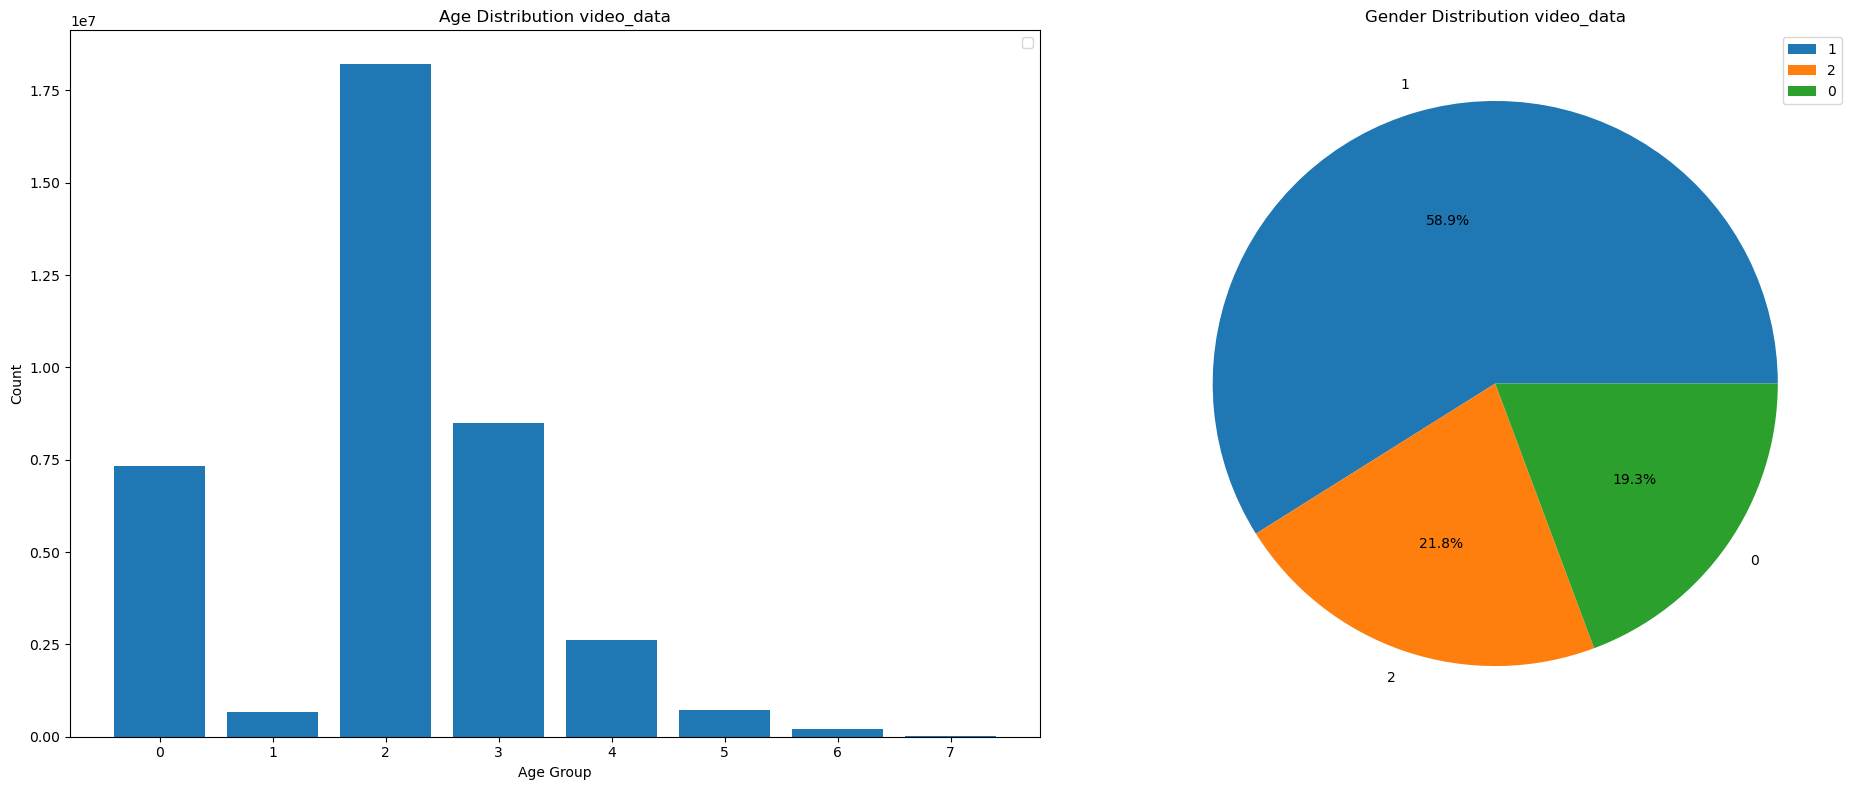

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(age_distribution_video_data.index, age_distribution_video_data.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution video_data')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(gender_distribution_video_data.values, labels=gender_distribution_video_data.index, autopct='%1.1f%%')
plt.title('Gender Distribution video_data')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: >

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Distribution article_data_0')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

([<matplotlib.patches.Wedge at 0x2000d2fe7a0>,
 [Text(-0.5622027454416268, 0.9454776956744656, '1'),
  Text(0.5575158068371356, -0.9482489784475056, '2'),
  Text(1.0999865239959428, -0.005444908385217072, '0')],
 [Text(-0.30665604296816007, 0.5157151067315267, '67.1%'),
  Text(0.304099531002074, -0.5172267155168211, '32.8%'),
  Text(0.5999926494523323, -0.0029699500283002205, '0.2%')])

Text(0.5, 1.0, 'Gender Distribution article_data_0')

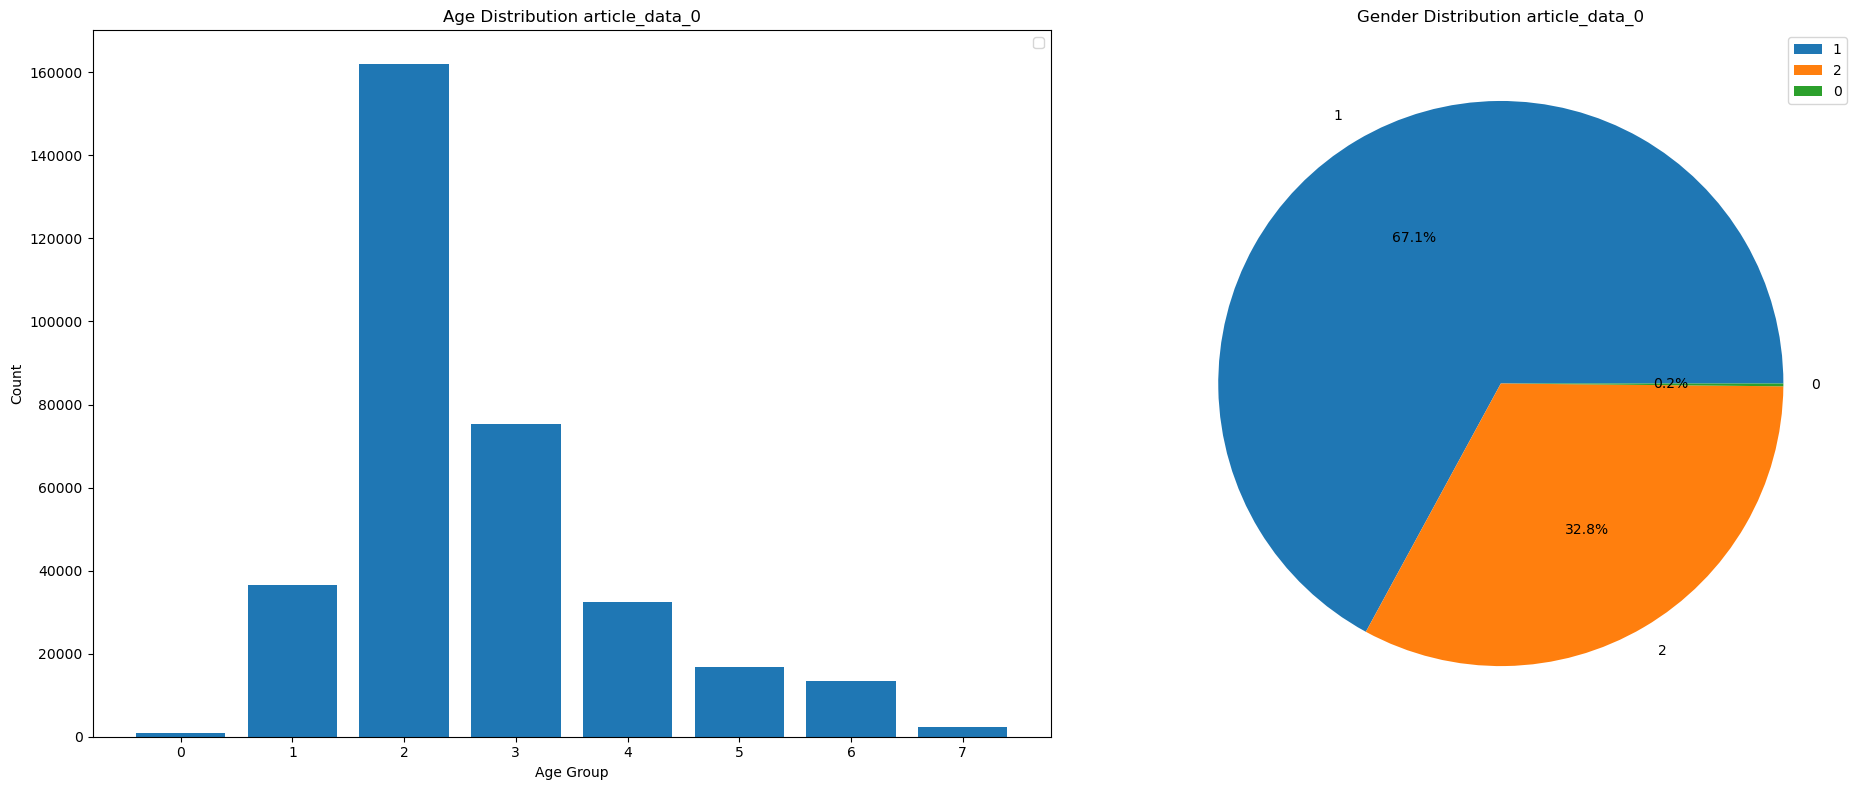

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(age_distribution_article_data_0.index, age_distribution_article_data_0.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution article_data_0')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(gender_distribution_article_data_0.values, labels=gender_distribution_article_data_0.index, autopct='%1.1f%%')
plt.title('Gender Distribution article_data_0')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: >

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Distribution article_data_03')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

([<matplotlib.patches.Wedge at 0x2000d3ea6e0>,
 [Text(-0.6067250389672852, 0.9175427658099357, '1'),
  Text(0.6014387419217925, -0.9210165252130559, '2'),
  Text(1.0999818128721457, -0.006325452593127728, '0')],
 [Text(-0.3309409303457919, 0.5004778722599649, '68.6%'),
  Text(0.32805749559370495, -0.5023726501162122, '31.2%'),
  Text(0.5999900797484431, -0.00345024686897876, '0.2%')])

Text(0.5, 1.0, 'Gender Distribution article_data_03')

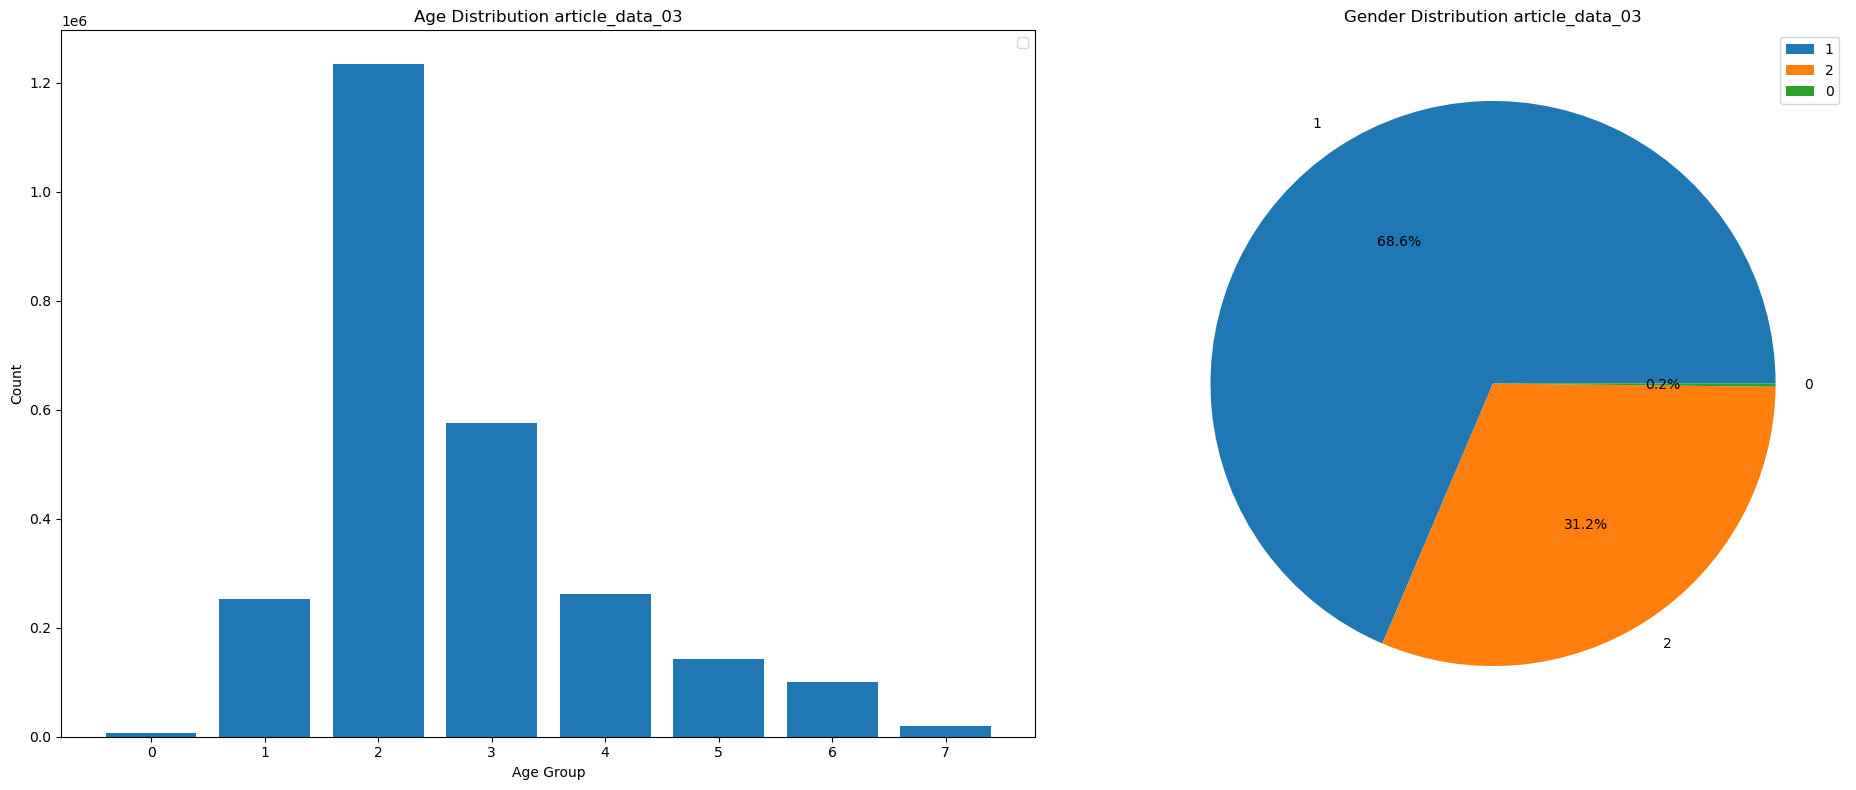

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(age_distribution_article_data_03.index, age_distribution_article_data_03.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution article_data_03')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(gender_distribution_article_data_03.values, labels=gender_distribution_article_data_03.index, autopct='%1.1f%%')
plt.title('Gender Distribution article_data_03')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: >

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Distribution article_data_07')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

([<matplotlib.patches.Wedge at 0x2000d48ac80>,
 [Text(-0.596206298929599, 0.9244122722663681, '1'),
  Text(0.5885107815070115, -0.9293304364164593, '2'),
  Text(1.0999620863021262, -0.00913283624477724, '0')],
 [Text(-0.3252034357797812, 0.5042248757816553, '68.2%'),
  Text(0.32100588082200626, -0.5069075107726141, '31.5%'),
  Text(0.5999793198011597, -0.004981547042605766, '0.3%')])

Text(0.5, 1.0, 'Gender Distribution article_data_07')

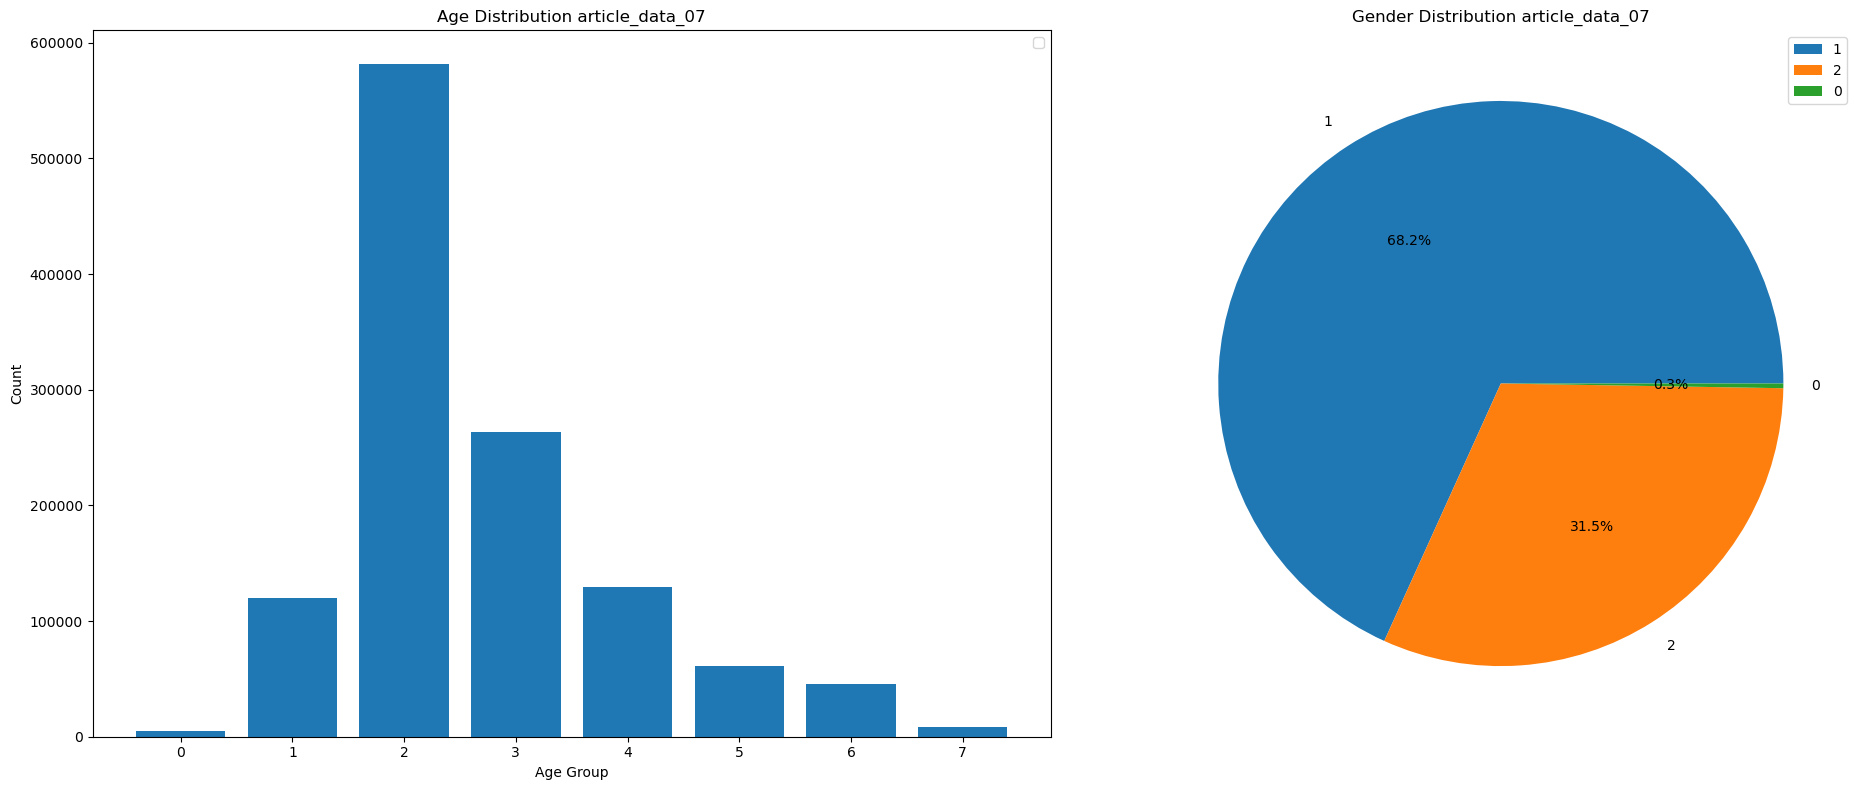

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(age_distribution_article_data_07.index, age_distribution_article_data_07.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution article_data_07')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(gender_distribution_article_data_07.values, labels=gender_distribution_article_data_07.index, autopct='%1.1f%%')
plt.title('Gender Distribution article_data_07')
plt.legend()

plt.tight_layout()
plt.show()

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: >

<BarContainer object of 8 artists>

Text(0.5, 0, 'Age Group')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Age Distribution article_data_1')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot: >

([<matplotlib.patches.Wedge at 0x2000d5c62c0>,
 [Text(-0.5645774289202871, 0.9440616117360977, '1'),
  Text(0.5604197112982817, -0.9465356555293365, '2'),
  Text(1.099989360278255, -0.004838106513468344, '0')],
 [Text(-0.30795132486561105, 0.5149426973105987, '67.2%'),
  Text(0.30568347888997177, -0.5162921757432745, '32.7%'),
  Text(0.5999941965154116, -0.002638967189164551, '0.1%')])

Text(0.5, 1.0, 'Gender Distribution article_data_1')

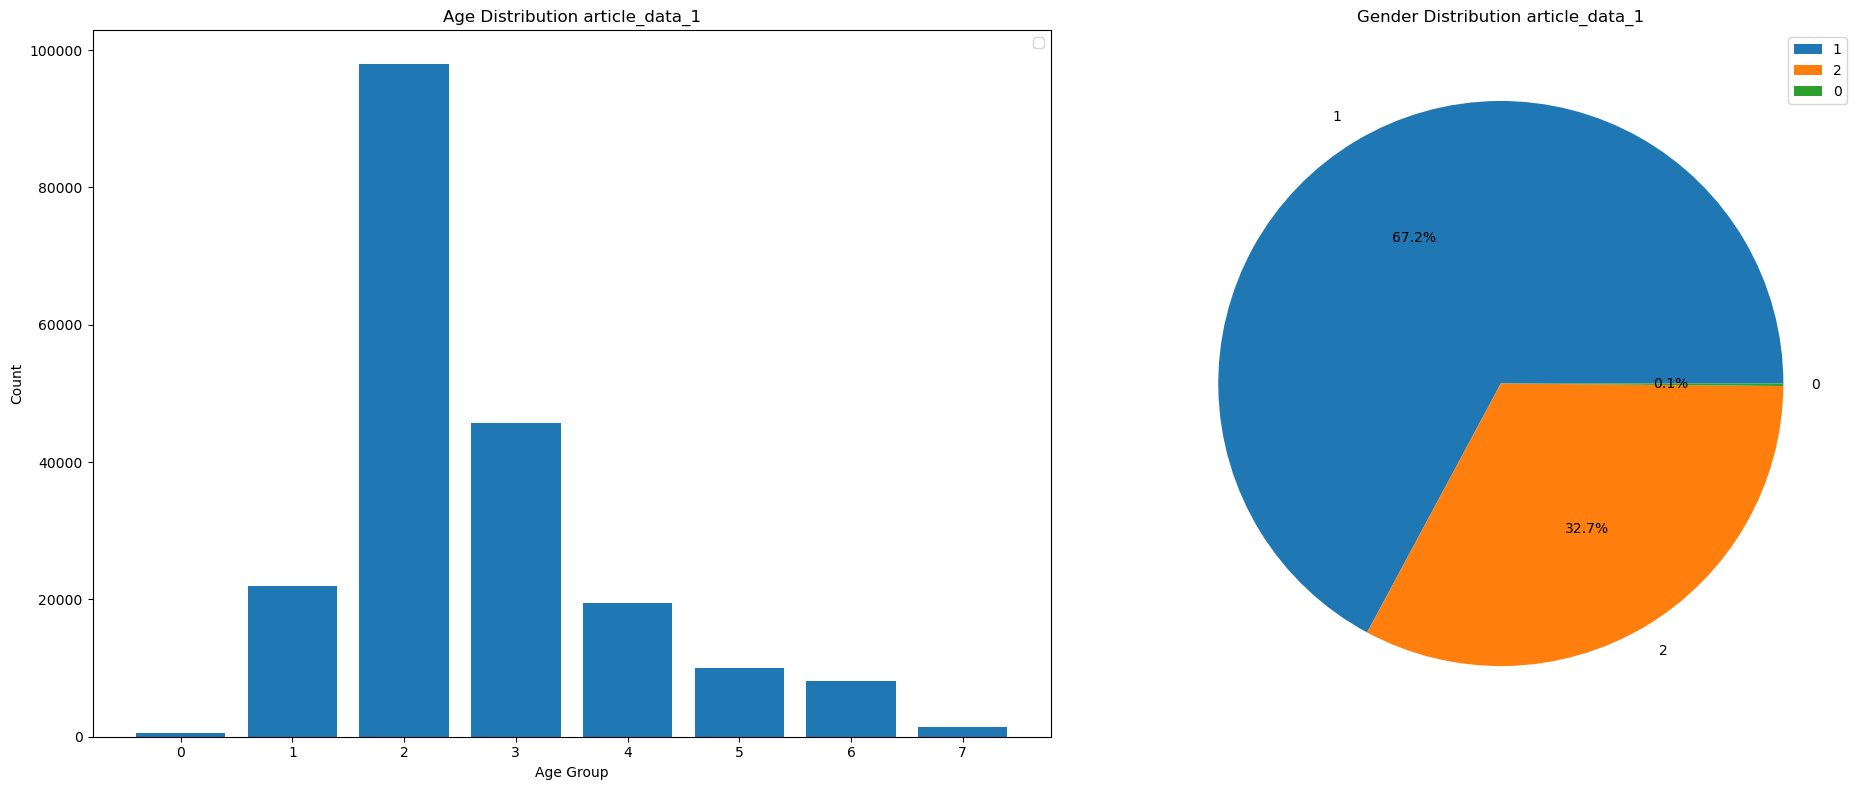

In [ ]:
plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.bar(age_distribution_article_data_1.index, age_distribution_article_data_1.values)
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution article_data_1')
plt.legend()

plt.subplot(1, 2, 2)
plt.pie(gender_distribution_article_data_1.values, labels=gender_distribution_article_data_1.index, autopct='%1.1f%%')
plt.title('Gender Distribution article_data_1')
plt.legend()

plt.tight_layout()
plt.show()

### As shown above the data seems to be imbalanced which may lead to the model being biased towards the more frequently repeated genders and age groups. In order to test that, the data will be used as it is to train the models first and then the model will be tested to check for its age and gender bias if it does exist.

### The setup used here for the BERT4Rec Model is similar to the one used by the referenced paper but the code was adjusted to improve its readability and the age and gender columns were added to the data being passed to the model in the construct_data function. mean average precision (mAP) was also added as an evaluation metric to be used as well.

In [ ]:
def get_data_loader(dataset, is_parallel=False, batch_size=512, shuffle=False):
    """
    This function creates a data loader for a given dataset. Data loaders are PyTorch's way to handle large datasets
    that can't fit into memory. They allow you to load data in small batches, rather than all at once.
    """
    if is_parallel:
        sampler = DistributedSampler(dataset)
    else:
        sampler = None

    dataloader = DataLoader(
        dataset,
        batch_size=batch_size,
        shuffle=shuffle,
        pin_memory=True,
        sampler=sampler
    )
    return dataloader

In [ ]:
class ColdResetDF:
    def __init__(self):
        self.item_enc1 = LabelEncoder()
        self.item_enc2 = LabelEncoder()
        self.user_enc = LabelEncoder()

    def fit_transform(self, df1, df2):
        df = pd.concat([df1['user_id'], df2['user_id']], ignore_index=True)
        df = self.user_enc.fit_transform(df) + 1
        df1['item_id'] = self.item_enc1.fit_transform(df1['item_id']) + 1
        df1['user_id'] = df[:len(df1)]
        df2['item_id'] = self.item_enc2.fit_transform(df2['item_id']) + 1
        df2['user_id'] = df[len(df1):]
        return df1, df2

    def inverse_transform(self, df):
        df['item_id'] = self.item_enc1.inverse_transform(df['item_id'] - 1)
        df['user_id'] = self.user_enc.inverse_transform(df['user_id'] - 1)
        return df


In [ ]:
class ItemResetDF:
    def __init__(self):
        self.item_enc = LabelEncoder()

    def fit_transform(self, df):
        df['item_id'] = self.item_enc.fit_transform(df['item_id']) + 1
        return df

    def inverse_transform(self, df):
        df['item_id'] = self.item_enc.inverse_transform(df['item_id'] - 1)
        return df

In [ ]:
def construct_data(task, item_min, path1, path2):
    if task != 2:
        df1 = path1[['user_id', 'item_id', 'age', 'gender', 'click']]
#         df1 = pd.read_csv(path1, usecols=['user_id', 'item_id', 'click'])
        df1 = df1[df1.click == 1]
    else:
        df1 = path1[['user_id', 'item_id', 'age', 'gender', 'like']]
        df1 = df1[df1.like == 1]

    df2 = path2[['user_id', 'item_id', 'age', 'gender', 'click']]
    df2 = df2[df2.click == 1]

    user_counts = df2.groupby('user_id').size()
    user_subset = np.in1d(df2.user_id, user_counts[user_counts >= item_min].index)
    df2 = df2[user_subset].reset_index(drop=True)

    assert (df2.groupby('user_id').size() < item_min).sum() == 0
    s_item_count = len(set(df2['item_id']))

    reset_ob = ColdResetDF()
    df2, df1 = reset_ob.fit_transform(df2, df1)

    user1 = set(df1.user_id.values.tolist())
    user2 = set(df2.user_id.values.tolist())
    user = user1 & user2
    df1 = df1[df1.user_id.isin(list(user))]
    df2 = df2[df2.user_id.isin(list(user))]

    new_data1 = []
    new_data2 = []
    for u in tqdm(user):
        tmp_data2 = df2[df2.user_id == u][:-3].values.tolist()
        tmp_data1 = df1[df1.user_id == u].values.tolist()
        new_data1.extend(tmp_data1)
        new_data2.extend(tmp_data2)
    new_data1 = pd.DataFrame(new_data1, columns=df1.columns)
    new_data2 = pd.DataFrame(new_data2, columns=df2.columns)
    user_count = len(set(new_data1.user_id.values.tolist()))

    reset_item = ItemResetDF()
    new_data1 = reset_item.fit_transform(new_data1)

    t_item_count = len(set(new_data1['item_id']))
    print(new_data1.columns)
    return new_data1, new_data2, user_count, t_item_count, s_item_count

In [ ]:
def colddataset(item_min, task, path1, path2):
    target_data, source_data, user_count, t_item_count, s_item_count = construct_data(task, item_min, path1, path2)

    print("+++user_history+++")
    user_history = source_data.groupby('user_id').item_id.apply(list).to_dict()
    target = target_data.groupby('user_id').item_id.apply(list).to_dict()

    # Modified part to include age and gender
    age_gender_mapping = target_data.groupby('user_id').agg({'age': 'first', 'gender': 'first'}).to_dict()

    examples = []
    for u, t_list in tqdm(target.items()):
        for t in t_list:
            # Modified part to include age and gender in examples
            age_val = age_gender_mapping['age'][u]
            gender_val = age_gender_mapping['gender'][u]
            e_list = [user_history[u] + [0], t, age_val, gender_val]  # Add age and gender to the example list
            examples.append(e_list)
    examples = pd.DataFrame(examples, columns=['source', 'target', 'age', 'gender'])
    return examples, user_count, s_item_count, t_item_count

In [ ]:
class ColdDataset(data_utils.Dataset):
    def __init__(self, x, y, max_len, pad_token):
        self.seqs = x
        self.targets = y
        self.max_len = max_len
        self.pad_token = pad_token

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, index):
        seq = self.seqs[index][-self.max_len:]
        seq_len = len(seq)
        seq_mask_len = self.max_len - seq_len
        seq = [self.pad_token] * seq_mask_len + seq
        target = self.targets[index]
        return torch.LongTensor(seq), torch.LongTensor([target])


In [ ]:
class ColdEvalDataset(data_utils.Dataset):
    def __init__(self, x, y, max_len, pad_token, num_item):
        self.seqs = x
        self.targets = y
        self.max_len = max_len
        self.pad_token = pad_token
        self.num_item = num_item + 1

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, index):
        seq = self.seqs[index][-self.max_len:]
        seq_len = len(seq)
        seq_mask_len = self.max_len - seq_len
        seq = [self.pad_token] * seq_mask_len + seq
        target = self.targets[index]
        labels = [0] * self.num_item
        labels[target] = 1
        return torch.LongTensor(seq), torch.LongTensor(labels)

In [ ]:
x_test_for_bias_later = []
y_test_for_bias_later = []

In [ ]:
def get_data(max_len=20, item_min=10, task=2, pad_token=0, path1=article_data_03, path2=video_data):
    path1 = path1
    path2 = path2

    data, user_count, vocab_size, item_count = colddataset(item_min, task, path1, path2)

    # Split data into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(data[['source', 'age', 'gender']],
                                                        data['target'],
                                                        test_size=0.2,
                                                        random_state=512)
    x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=512)

    x_test_for_bias_later.append(x_test)
    y_test_for_bias_later.append(y_test)

    # Convert the dataframes to arrays and then lists
    x_train = {'seq_column': x_train['source'].values.tolist(),
               'age_column': x_train['age'].values.tolist(),
               'gender_column': x_train['gender'].values.tolist()}
    y_train = y_train.values.tolist()

    x_val = {'seq_column': x_val['source'].values.tolist(),
             'age_column': x_val['age'].values.tolist(),
             'gender_column': x_val['gender'].values.tolist()}
    y_val = y_val.values.tolist()

    x_test = {'seq_column': x_test['source'].values.tolist(),
              'age_column': x_test['age'].values.tolist(),
              'gender_column': x_test['gender'].values.tolist()}
    y_test = y_test.values.tolist()

    train_dataset = ColdDataset(x_train['seq_column'], y_train, max_len, pad_token)
    valid_dataset = ColdEvalDataset(x_val['seq_column'], y_val, max_len, pad_token, item_count)
    test_dataset = ColdEvalDataset(x_test['seq_column'], y_test, max_len, pad_token, item_count)

    num_users = user_count
    num_items = item_count
    num_embeddings = vocab_size

    train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=1024, shuffle=False)
    test_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

    return train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings

In [ ]:
def recalls_and_ndcgs_for_ks(scores, labels, ks):
    metrics = {}

    answer_count = labels.sum(1)
    answer_count_float = answer_count.float()
    labels_float = labels.float()

    rank = (-scores).argsort(dim=1)
    cut = rank

    for k in sorted(ks, reverse=True):
        cut = cut[:, :k]
        hits = labels_float.gather(1, cut)
        metrics[f'Recall@{k}'] = (hits.sum(1) / answer_count_float).mean().item()

        position = torch.arange(2, 2 + k)
        weights = 1 / torch.log2(position.float()).to('cpu')
        dcg = (hits * weights).sum(1)
        idcg = torch.Tensor([weights[:min(n, k)].sum() for n in answer_count]).to('cpu')
        ndcg = (dcg / idcg).mean()
        metrics[f'NDCG@{k}'] = ndcg.item()

        # Compute mAP
        ap_sum = 0
        for i in range(len(hits)):
            num_relevant_items = hits[i].sum().item()
            if num_relevant_items > 0:
                precision_at_k = (hits[i] / torch.arange(1, k + 1).float().to('cpu')).mean().item()
                ap_sum += precision_at_k
        mAP = ap_sum / len(hits)
        metrics[f'mAP@{k}'] = mAP

    return metrics

In [ ]:
def Sequence_full_Validate(epoch, model, dataloader, writer, test=False):
    print("+" * 20, f"{'Test' if test else 'Valid'} Epoch {epoch + 1}", "+" * 20)
    model.eval()
    avg_metrics = {}
    i = 0

    with torch.no_grad():
        for data in tqdm(dataloader):
            data = [x.to('cpu') for x in data]
            seqs, labels = data

            if test:
                scores = model.predict(seqs)
            else:
                scores = model(seqs)

            scores = scores.mean(1)
            metrics = recalls_and_ndcgs_for_ks(scores, labels, [5, 20])
            i += 1

            for key, value in metrics.items():
                avg_metrics[key] = avg_metrics.get(key, 0) + value

    for key, value in avg_metrics.items():
        avg_metrics[key] /= i

    print(avg_metrics)

    for k in sorted([5, 20], reverse=True):
        writer.add_scalar(f"{'Test' if test else 'Train'}/NDCG@{k}", avg_metrics[f"NDCG@{k}"], epoch)

    return avg_metrics


In [ ]:
def SequenceTrainer(epoch, model, dataloader, optimizer, writer):
    print("+" * 20, "Train Epoch {}".format(epoch + 1), "+" * 20)
    model.train()
    running_loss = 0
    loss_fn = nn.CrossEntropyLoss(ignore_index=0)

    for data in tqdm(dataloader):
        optimizer.zero_grad()
        data = [x.to('cpu') for x in data]
        seqs, labels = data

        logits = model(seqs)  # B x T x V
        logits = logits.mean(1)
        labels = labels.view(-1)

        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.detach().cpu().item()

    writer.add_scalar('Train/loss', running_loss / len(dataloader), epoch)
    print("Training CE Loss: {:.5f}".format(running_loss / len(dataloader)))

    return optimizer

In [ ]:
def SeqTrain(epochs, model, train_loader, val_loader, writer, is_parallel, is_pretrain, lr, weight_decay, local_rank):
    device = torch.device('cpu')  # Use CPU as the default device
    if torch.cuda.is_available():
        device = torch.device('cuda')  # If GPU is available, use it as the default device

    if is_pretrain == 0:
        optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=lr, weight_decay=weight_decay)
    else:
        optimizer = optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    model = model.to(device)  # Move the model to the chosen device
    if is_parallel:
        model = torch.nn.parallel.DistributedDataParallel(model, device_ids=[local_rank], output_device=local_rank)

    best_metric = 0
    all_time = 0
    val_all_time = 0

    for epoch in range(epochs):
        since = time.time()
        optimizer = SequenceTrainer(epoch, model, train_loader, optimizer, writer)
        tmp = time.time() - since
        print('one epoch train:', tmp)
        all_time += tmp

        val_since = time.time()
        metrics = Sequence_full_Validate(epoch, model, val_loader, writer)
        val_tmp = time.time() - val_since
        print('one epoch val:', val_tmp)
        val_all_time += val_tmp

        i = 1
        current_metric = metrics['NDCG@5']
        if best_metric <= current_metric:
            best_metric = current_metric
            best_model = deepcopy(model)
            state_dict = model.state_dict()
        else:
            i += 1
            if i == 10:
                print('early stop!')
                break

    print('train_time:', all_time)
    print('val_time:', val_all_time)
    return best_model


In [ ]:
class Attention(nn.Module):
    def forward(self, query, key, value, mask=None, dropout=None):
        scores = torch.matmul(query, key.transpose(-2, -1)) / math.sqrt(query.size(-1))
        if mask is not None:
            scores = scores.masked_fill(mask == 0, -1e9)
        p_attn = F.softmax(scores, dim=-1)
        if dropout is not None:
            p_attn = dropout(p_attn)
        return torch.matmul(p_attn, value), p_attn

class GELU(nn.Module):
    def forward(self, x):
        return 0.5 * x * (1 + torch.tanh(math.sqrt(2 / math.pi) * (x + 0.044715 * torch.pow(x, 3))))

class PositionwiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super(PositionwiseFeedForward, self).__init__()
        self.w_1 = nn.Linear(d_model, d_ff)
        self.w_2 = nn.Linear(d_ff, d_model)
        self.dropout = nn.Dropout(dropout)
        self.activation = GELU()

    def forward(self, x):
        return self.w_2(self.dropout(self.activation(self.w_1(x))))

class SublayerConnection(nn.Module):
    def __init__(self, size, dropout):
        super(SublayerConnection, self).__init__()
        self.norm = nn.LayerNorm(size)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        return x + self.dropout(sublayer(self.norm(x)))

class MultiHeadedAttention(nn.Module):
    def __init__(self, h, d_model, dropout=0.1):
        super(MultiHeadedAttention, self).__init__()
        assert d_model % h == 0
        self.d_k = d_model // h
        self.h = h
        self.linear_layers = nn.ModuleList([nn.Linear(d_model, d_model) for _ in range(3)])
        self.output_linear = nn.Linear(d_model, d_model)
        self.attention = Attention()
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, query, key, value, mask=None):
        batch_size = query.size(0)
        query, key, value = [l(x).view(batch_size, -1, self.h, self.d_k).transpose(1, 2)
                             for l, x in zip(self.linear_layers, (query, key, value))]
        x, attn = self.attention(query, key, value, mask=mask, dropout=self.dropout)
        x = x.transpose(1, 2).contiguous().view(batch_size, -1, self.h * self.d_k)
        return self.output_linear(x)

class PositionalEmbedding(nn.Module):
    def __init__(self, max_len, d_model):
        super(PositionalEmbedding, self).__init__()
        self.pe = nn.Embedding(max_len, d_model)

    def forward(self, x):
        batch_size = x.size(0)
        return self.pe.weight.unsqueeze(0).repeat(batch_size, 1, 1)

class TokenEmbedding(nn.Embedding):
    def __init__(self, vocab_size, embed_size=512):
        super(TokenEmbedding, self).__init__(vocab_size, embed_size, padding_idx=0)

class BERTEmbedding(nn.Module):
    def __init__(self, vocab_size, embed_size, max_len, dropout=0.1):
        super(BERTEmbedding, self).__init__()
        self.token = TokenEmbedding(vocab_size=vocab_size, embed_size=embed_size)
        self.position = PositionalEmbedding(max_len=max_len, d_model=embed_size)
        self.dropout = nn.Dropout(p=dropout)
        self.embed_size = embed_size

    def forward(self, sequence):
        x = self.token(sequence) + self.position(sequence)
        return self.dropout(x)

class TransformerBlock(nn.Module):
    def __init__(self, hidden, attn_heads, feed_forward_hidden, dropout):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadedAttention(h=attn_heads, d_model=hidden, dropout=dropout)
        self.feed_forward = PositionwiseFeedForward(d_model=hidden, d_ff=feed_forward_hidden, dropout=dropout)
        self.input_sublayer = SublayerConnection(size=hidden, dropout=dropout)
        self.output_sublayer = SublayerConnection(size=hidden, dropout=dropout)
        self.dropout = nn.Dropout(p=dropout)

    def forward(self, x, mask):
        x = self.input_sublayer(x, lambda _x: self.attention.forward(_x, _x, _x, mask=mask))
        x = self.output_sublayer(x, self.feed_forward)
        return self.dropout(x)

class bottle_net(nn.Module):
    def __init__(self, hidden):
        super(bottle_net, self).__init__()
        self.hidden = hidden
        self.hidden_size = int(hidden / 4)
        self.linear1 = nn.Linear(self.hidden, self.hidden_size)
        self.linear2 = nn.Linear(self.hidden_size, self.hidden)
        self.ln = nn.LayerNorm(self.hidden, eps=1e-8)

    def forward(self, x):
        out = self.linear1(x)
        out = F.leaky_relu(out)
        out = self.linear2(out)
        out = self.ln(out)
        return
        return out

class BERT(nn.Module):
    def __init__(self, max_len, block_num, num_embedding, hidden_size, is_mp, dropout):
        super(BERT, self).__init__()
        max_len = max_len
        n_layers = block_num
        heads = block_num
        vocab_size = num_embedding + 1
        hidden = hidden_size
        self.hidden = hidden
        self.is_mp = is_mp
        dropout = dropout

        # embedding for BERT, sum of positional, segment, token embeddings
        self.embedding = BERTEmbedding(vocab_size=vocab_size, embed_size=self.hidden, max_len=max_len, dropout=dropout)

        transformer_blocks = []
        for _ in range(n_layers):
            transformer_blocks.append(TransformerBlock(hidden, heads, hidden * 4, dropout))
            if self.is_mp:
                transformer_blocks.append(bottle_net(self.hidden))
        self.transformer_blocks = nn.ModuleList(transformer_blocks)

    def forward(self, x):
        mask = (x > 0).unsqueeze(1).repeat(1, x.size(1), 1).unsqueeze(1)

        # embedding the indexed sequence to a sequence of vectors
        x = self.embedding(x)

        # running over multiple transformer blocks
        for i, block in enumerate(self.transformer_blocks):
            mp_input = x
            if i % 2 == 0:
                x = block.forward(x, mask)
            else:
                if self.is_mp:
                    mp_out = block(mp_input)
                    x = mp_out + x
        return x

    def init_weights(self):
        pass

In [ ]:
class BERT_ColdstartModel(nn.Module):
    def __init__(self, num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout):
        super(BERT_ColdstartModel, self).__init__()
        self.bert = BERT(max_len, block_num, num_embedding, hidden_size, is_mp, dropout)
        self.num_items = num_items
        self.out = nn.Linear(self.bert.hidden, num_items + 1)

    def forward(self, x):
        x = self.bert(x)
        return self.out(x)

    def predict(self, x, item):
        x = self.bert(x)
        item_emb = self.bert.embedding.token(item)
        logits = x.matmul(item_emb.transpose(1, 2))
        logits = logits.mean(1)

        return logits

## Here all four models using the four different concentrations of cold users will be used as the target to simualte the steps used in the paper. The hyper parameters will be kept constant similar to on of the ones used in the experiments in the paper throughout the four trials in order to avoid having them affect the results.

### For the model using the zero percent cold data as the target

In [ ]:
print('Fetching the data and parameters')
train_dataloader, valid_dataloader, test_dataloader_0, num_users, num_items, num_embeddings = get_data(path1 = article_data_0, path2 = video_data)
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout = num_items, 20, 2, 4, num_embeddings, 128, False, 0.3
model_0 = BERT_ColdstartModel(num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout)
writer = SummaryWriter()
print('Training the Model')
model_0_best = SeqTrain(10, model_0, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.0001, local_rank=1)

Fetching the data and parameters


100%|█████████████████████████████████████████████████████████████████████████████| 2313/2313 [00:05<00:00, 462.03it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|██████████████████████████████████████████████████████████████████████████| 2313/2313 [00:00<00:00, 144568.67it/s]


Training the Model
++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:16<00:00,  4.06s/it]


Training CE Loss: 8.08926
one epoch train: 16.268943548202515
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]


{'Recall@20': 0.00923787523061037, 'NDCG@20': 0.003928209654986858, 'mAP@20': 0.00011547344605552407, 'Recall@5': 0.006928406655788422, 'NDCG@5': 0.003304102923721075, 'mAP@5': 0.00042340263517844486}
one epoch val: 1.0146448612213135
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.56s/it]


Training CE Loss: 8.02999
one epoch train: 14.249621868133545
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.07it/s]


{'Recall@20': 0.01154734380543232, 'NDCG@20': 0.004889864474534988, 'mAP@20': 0.00014296712302204917, 'Recall@5': 0.00923787523061037, 'NDCG@5': 0.004298737272620201, 'mAP@5': 0.0005388760780076782}
one epoch val: 0.946002721786499
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.60s/it]


Training CE Loss: 7.97784
one epoch train: 14.411521434783936
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.36it/s]


{'Recall@20': 0.013856813311576843, 'NDCG@20': 0.006980007514357567, 'mAP@20': 0.00024730562367938956, 'Recall@5': 0.006928406655788422, 'NDCG@5': 0.004761215765029192, 'mAP@5': 0.0008083140998046337}
one epoch val: 0.7439985275268555
++++++++++++++++++++ Train Epoch 4 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.11s/it]


Training CE Loss: 7.91464
one epoch train: 12.426189422607422
++++++++++++++++++++ Valid Epoch 4 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


{'Recall@20': 0.032332561910152435, 'NDCG@20': 0.011407258920371532, 'mAP@20': 0.0002948562103790375, 'Recall@5': 0.006928406655788422, 'NDCG@5': 0.0044588372111320496, 'mAP@5': 0.0007313318103207727}
one epoch val: 0.7929995059967041
++++++++++++++++++++ Train Epoch 5 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.15s/it]


Training CE Loss: 7.84633
one epoch train: 12.621477842330933
++++++++++++++++++++ Valid Epoch 5 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.27it/s]


{'Recall@20': 0.03695150092244148, 'NDCG@20': 0.013416627421975136, 'mAP@20': 0.0003530477548951571, 'Recall@5': 0.01154734380543232, 'NDCG@5': 0.0063468958251178265, 'mAP@5': 0.0009391840039720161}
one epoch val: 0.8010039329528809
++++++++++++++++++++ Train Epoch 6 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.16s/it]


Training CE Loss: 7.77225
one epoch train: 12.644592523574829
++++++++++++++++++++ Valid Epoch 6 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.23it/s]


{'Recall@20': 0.03695150092244148, 'NDCG@20': 0.013457056134939194, 'mAP@20': 0.00035422098689538365, 'Recall@5': 0.013856813311576843, 'NDCG@5': 0.007139110472053289, 'mAP@5': 0.0010084680627868027}
one epoch val: 0.8269975185394287
++++++++++++++++++++ Train Epoch 7 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:12<00:00,  3.25s/it]


Training CE Loss: 7.71917
one epoch train: 13.00053858757019
++++++++++++++++++++ Valid Epoch 7 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.09it/s]


{'Recall@20': 0.03695150092244148, 'NDCG@20': 0.013151466846466064, 'mAP@20': 0.0003372790548933227, 'Recall@5': 0.006928406655788422, 'NDCG@5': 0.004357627592980862, 'mAP@5': 0.0007082371183135493}
one epoch val: 0.9265186786651611
++++++++++++++++++++ Train Epoch 8 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:13<00:00,  3.47s/it]


Training CE Loss: 7.67106
one epoch train: 13.87448263168335
++++++++++++++++++++ Valid Epoch 8 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.26it/s]


{'Recall@20': 0.032332561910152435, 'NDCG@20': 0.01214982196688652, 'mAP@20': 0.0003301181962743711, 'Recall@5': 0.01154734380543232, 'NDCG@5': 0.0062456862069666386, 'mAP@5': 0.0009160893119647927}
one epoch val: 0.804999589920044
++++++++++++++++++++ Train Epoch 9 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.57s/it]


Training CE Loss: 7.61518
one epoch train: 14.300080060958862
++++++++++++++++++++ Valid Epoch 9 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]


{'Recall@20': 0.03695150092244148, 'NDCG@20': 0.014380352571606636, 'mAP@20': 0.0004206204487927103, 'Recall@5': 0.01154734380543232, 'NDCG@5': 0.007501630112528801, 'mAP@5': 0.001247113179114344}
one epoch val: 0.8460006713867188
++++++++++++++++++++ Train Epoch 10 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:14<00:00,  3.58s/it]


Training CE Loss: 7.58443
one epoch train: 14.324456691741943
++++++++++++++++++++ Valid Epoch 10 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.00s/it]

{'Recall@20': 0.032332561910152435, 'NDCG@20': 0.012348602525889874, 'mAP@20': 0.0003463310699299081, 'Recall@5': 0.00923787523061037, 'NDCG@5': 0.005755849648267031, 'mAP@5': 0.0009237875426338671}
one epoch val: 1.0140020847320557
train_time: 138.12190461158752
val_time: 8.717168092727661


### For the model using the thirty percent cold data as the target

In [ ]:
print('Fetching the data and parameters')
train_dataloader, valid_dataloader, test_dataloader_30, num_users, num_items, num_embeddings = get_data(path1 = article_data_03, path2 = video_data)
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout = num_items, 20, 2, 4, num_embeddings, 128, False, 0.3
model_30 = BERT_ColdstartModel(num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout)
writer = SummaryWriter()
print('Training the Model')
model_30_best = SeqTrain(10, model_30, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.0001, local_rank=1)

Fetching the data and parameters


100%|█████████████████████████████████████████████████████████████████████████████| 5439/5439 [00:09<00:00, 593.66it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|██████████████████████████████████████████████████████████████████████████| 5439/5439 [00:00<00:00, 102512.94it/s]


Training the Model
++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:18<00:00,  7.65s/it]


Training CE Loss: 9.58101
one epoch train: 198.80039286613464
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:24<00:00,  6.02s/it]


{'Recall@20': 0.013907449319958687, 'NDCG@20': 0.005164245143532753, 'mAP@20': 0.00014248322100439504, 'Recall@5': 0.004391675814986229, 'NDCG@5': 0.0026928020524792373, 'mAP@5': 0.0004262419402863482}
one epoch val: 24.104546070098877
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:26<00:00,  7.94s/it]


Training CE Loss: 9.26835
one epoch train: 206.33382940292358
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:28<00:00,  7.18s/it]


{'Recall@20': 0.020740531384944916, 'NDCG@20': 0.00784016097895801, 'mAP@20': 0.0002144563364248298, 'Recall@5': 0.008295070379972458, 'NDCG@5': 0.004450284119229764, 'mAP@5': 0.0006409429204627246}
one epoch val: 28.723155736923218
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:36<00:00,  8.32s/it]


Training CE Loss: 9.11436
one epoch train: 216.29137754440308
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:24<00:00,  6.10s/it]


{'Recall@20': 0.018057839944958687, 'NDCG@20': 0.0067954916739836335, 'mAP@20': 0.0001880069939072562, 'Recall@5': 0.005612378939986229, 'NDCG@5': 0.0033985035261139274, 'mAP@5': 0.0005345252076939054}
one epoch val: 24.39354681968689
++++++++++++++++++++ Train Epoch 4 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:29<00:00,  8.06s/it]


Training CE Loss: 9.04951
one epoch train: 209.69565868377686
++++++++++++++++++++ Valid Epoch 4 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:29<00:00,  7.47s/it]


{'Recall@20': 0.016592996194958687, 'NDCG@20': 0.00765994330868125, 'mAP@20': 0.00026029984735321024, 'Recall@5': 0.006830226629972458, 'NDCG@5': 0.004927051777485758, 'mAP@5': 0.0008585183797485865}
one epoch val: 29.91021156311035
++++++++++++++++++++ Train Epoch 5 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:08<00:00,  7.24s/it]


Training CE Loss: 8.97030
one epoch train: 188.2132112979889
++++++++++++++++++++ Valid Epoch 5 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.58s/it]


{'Recall@20': 0.017566703259944916, 'NDCG@20': 0.0073215708252973855, 'mAP@20': 0.00022301186645969125, 'Recall@5': 0.006586086004972458, 'NDCG@5': 0.004210090031847358, 'mAP@5': 0.000680676451327876}
one epoch val: 22.338998794555664
++++++++++++++++++++ Train Epoch 6 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:08<00:00,  7.25s/it]


Training CE Loss: 8.85155
one epoch train: 188.52300000190735
++++++++++++++++++++ Valid Epoch 6 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.41s/it]


{'Recall@20': 0.020252250134944916, 'NDCG@20': 0.00937679735943675, 'mAP@20': 0.0003186939368991883, 'Recall@5': 0.009512918069958687, 'NDCG@5': 0.006458194111473858, 'mAP@5': 0.0010903092046572172}
one epoch val: 21.663000106811523
++++++++++++++++++++ Train Epoch 7 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:05<00:00,  7.12s/it]


Training CE Loss: 8.69589
one epoch train: 185.20500326156616
++++++++++++++++++++ Valid Epoch 7 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.26s/it]


{'Recall@20': 0.016104714944958687, 'NDCG@20': 0.006794552900828421, 'mAP@20': 0.00021864180412420445, 'Recall@5': 0.003903394564986229, 'NDCG@5': 0.0034344953019171953, 'mAP@5': 0.0006561672014825687}
one epoch val: 21.035006761550903
++++++++++++++++++++ Train Epoch 8 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:05<00:00,  7.13s/it]


Training CE Loss: 8.48682
one epoch train: 185.43699193000793
++++++++++++++++++++ Valid Epoch 8 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:20<00:00,  5.24s/it]


{'Recall@20': 0.011224757879972458, 'NDCG@20': 0.005443307687528431, 'mAP@20': 0.00019075456088879766, 'Recall@5': 0.005853664129972458, 'NDCG@5': 0.0039144454058259726, 'mAP@5': 0.0006576520354375608}
one epoch val: 20.981998920440674
++++++++++++++++++++ Train Epoch 9 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:10<00:00,  7.33s/it]


Training CE Loss: 8.20738
one epoch train: 190.71701741218567
++++++++++++++++++++ Valid Epoch 9 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:21<00:00,  5.29s/it]


{'Recall@20': 0.011957179754972458, 'NDCG@20': 0.00523538701236248, 'mAP@20': 0.0001725899407268127, 'Recall@5': 0.004635816439986229, 'NDCG@5': 0.003287258616182953, 'mAP@5': 0.0005699041792425503}
one epoch val: 21.17798352241516
++++++++++++++++++++ Train Epoch 10 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [03:05<00:00,  7.14s/it]


Training CE Loss: 7.90552
one epoch train: 185.6920030117035
++++++++++++++++++++ Valid Epoch 10 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:22<00:00,  5.73s/it]

{'Recall@20': 0.013419168069958687, 'NDCG@20': 0.004622371052391827, 'mAP@20': 0.00011202974171744527, 'Recall@5': 0.004147535189986229, 'NDCG@5': 0.002118956617778167, 'mAP@5': 0.0002910556053372246}
one epoch val: 22.94999098777771
train_time: 1954.9084854125977
val_time: 237.27843928337097


### For the model using the seventy percent cold data as the target

In [ ]:
print('Fetching the data and parameters')
train_dataloader, valid_dataloader, test_dataloader_70, num_users, num_items, num_embeddings = get_data(path1 = article_data_07, path2 = video_data)
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout = num_items, 20, 2, 4, num_embeddings, 128, False, 0.3
model_70 = BERT_ColdstartModel(num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout)
writer = SummaryWriter()
print('Training the Model')
model_70_best = SeqTrain(10, model_70, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.0001, local_rank=1)

Fetching the data and parameters


100%|█████████████████████████████████████████████████████████████████████████████| 3313/3313 [00:04<00:00, 713.69it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|██████████████████████████████████████████████████████████████████████████| 3313/3313 [00:00<00:00, 106867.21it/s]


Training the Model
++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:04<00:00,  4.94s/it]


Training CE Loss: 9.11095
one epoch train: 64.28700137138367
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.34s/it]


{'Recall@20': 0.004357115016318858, 'NDCG@20': 0.0018349116435274482, 'mAP@20': 5.671727339180353e-05, 'Recall@5': 0.0019344168831594288, 'NDCG@5': 0.0011774997401516885, 'mAP@5': 0.00018592727805807397}
one epoch val: 6.69000244140625
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:04<00:00,  4.98s/it]


Training CE Loss: 8.97601
one epoch train: 64.7379994392395
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.63s/it]


{'Recall@20': 0.019851158373057842, 'NDCG@20': 0.007263500709086657, 'mAP@20': 0.00019414794697413212, 'Recall@5': 0.005803250707685947, 'NDCG@5': 0.003378446213901043, 'mAP@5': 0.0005219184091276538}
one epoch val: 7.271001815795898
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:04<00:00,  4.96s/it]


Training CE Loss: 8.79976
one epoch train: 64.48900032043457
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.14s/it]


{'Recall@20': 0.020320731215178967, 'NDCG@20': 0.007659664610400796, 'mAP@20': 0.000210637952100341, 'Recall@5': 0.006779813207685947, 'NDCG@5': 0.0038798494497314095, 'mAP@5': 0.000589516995334418}
one epoch val: 6.3036723136901855
++++++++++++++++++++ Train Epoch 4 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:07<00:00,  5.22s/it]


Training CE Loss: 8.66581
one epoch train: 67.90800189971924
++++++++++++++++++++ Valid Epoch 4 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.08s/it]


{'Recall@20': 0.026086566038429737, 'NDCG@20': 0.009331399109214544, 'mAP@20': 0.00024498269327188774, 'Recall@5': 0.005803250707685947, 'NDCG@5': 0.0037789412308484316, 'mAP@5': 0.0006211336720200707}
one epoch val: 6.169000864028931
++++++++++++++++++++ Train Epoch 5 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:06<00:00,  5.15s/it]


Training CE Loss: 8.60007
one epoch train: 66.97800016403198
++++++++++++++++++++ Valid Epoch 5 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.96s/it]


{'Recall@20': 0.021785574965178967, 'NDCG@20': 0.007603263482451439, 'mAP@20': 0.00019071148660513876, 'Recall@5': 0.005352385633159429, 'NDCG@5': 0.003069137776037678, 'mAP@5': 0.0004661869985716381}
one epoch val: 5.936999082565308
++++++++++++++++++++ Train Epoch 6 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:08<00:00,  5.28s/it]


Training CE Loss: 8.55032
one epoch train: 68.67400312423706
++++++++++++++++++++ Valid Epoch 6 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.34s/it]


{'Recall@20': 0.023250418715178967, 'NDCG@20': 0.008355455938726664, 'mAP@20': 0.0002174158967127752, 'Recall@5': 0.005840666883159429, 'NDCG@5': 0.003416842402657494, 'mAP@5': 0.000529663560562321}
one epoch val: 6.689000844955444
++++++++++++++++++++ Train Epoch 7 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:12<00:00,  5.57s/it]


Training CE Loss: 8.47800
one epoch train: 72.37399816513062
++++++++++++++++++++ Valid Epoch 7 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:08<00:00,  4.09s/it]


{'Recall@20': 0.020809012465178967, 'NDCG@20': 0.007362851407378912, 'mAP@20': 0.00018445777254913698, 'Recall@5': 0.005821958766318858, 'NDCG@5': 0.0031613316386938095, 'mAP@5': 0.0004568017773573078}
one epoch val: 8.199997663497925
++++++++++++++++++++ Train Epoch 8 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:17<00:00,  5.94s/it]


Training CE Loss: 8.38855
one epoch train: 77.29300045967102
++++++++++++++++++++ Valid Epoch 8 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.62s/it]


{'Recall@20': 0.018367606215178967, 'NDCG@20': 0.006070982199162245, 'mAP@20': 0.0001428001421964868, 'Recall@5': 0.0029296875, 'NDCG@5': 0.0018087803618982434, 'mAP@5': 0.0002913411499321228}
one epoch val: 7.2619993686676025
++++++++++++++++++++ Train Epoch 9 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:08<00:00,  5.23s/it]


Training CE Loss: 8.27166
one epoch train: 68.00599908828735
++++++++++++++++++++ Valid Epoch 9 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.32s/it]


{'Recall@20': 0.018367606215178967, 'NDCG@20': 0.006206771358847618, 'mAP@20': 0.00014942729916334478, 'Recall@5': 0.004375823133159429, 'NDCG@5': 0.0023771692940499634, 'mAP@5': 0.00035081417931783924}
one epoch val: 6.648999452590942
++++++++++++++++++++ Train Epoch 10 ++++++++++++++++++++


100%|██████████████████████████████████████████████████████████████████████████████████| 13/13 [01:07<00:00,  5.18s/it]


Training CE Loss: 8.12195
one epoch train: 67.39801216125488
++++++++++++++++++++ Valid Epoch 10 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:07<00:00,  3.51s/it]

{'Recall@20': 0.018367606215178967, 'NDCG@20': 0.005821251077577472, 'mAP@20': 0.00012588313698927976, 'Recall@5': 0.0038688337663188577, 'NDCG@5': 0.001893281878437847, 'mAP@5': 0.0002554777320221261}
one epoch val: 7.0289857387542725
train_time: 682.1450161933899
val_time: 68.19965958595276


### For the model using the hundred percent cold data as the target

In [ ]:
print('Fetching the data and parameters')
train_dataloader, valid_dataloader, test_dataloader_1, num_users, num_items, num_embeddings = get_data(path1 = article_data_1, path2 = video_data)
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout = num_items, 20, 2, 4, num_embeddings, 128, False, 0.3
model_1 = BERT_ColdstartModel(num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout)
writer = SummaryWriter()
print('Training the Model')
model_1_best = SeqTrain(10, model_1, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.0001, local_rank=1)

Fetching the data and parameters


100%|█████████████████████████████████████████████████████████████████████████████| 1690/1690 [00:02<00:00, 598.44it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|██████████████████████████████████████████████████████████████████████████| 1690/1690 [00:00<00:00, 129971.28it/s]


Training the Model
++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:09<00:00,  3.12s/it]


Training CE Loss: 7.70432
one epoch train: 9.362857818603516
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.11it/s]


{'Recall@20': 0.0, 'NDCG@20': 0.0, 'mAP@20': 0.0, 'Recall@5': 0.0, 'NDCG@5': 0.0, 'mAP@5': 0.0}
one epoch val: 0.4830009937286377
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.82s/it]


Training CE Loss: 7.65569
one epoch train: 8.477000951766968
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.37it/s]


{'Recall@20': 0.0038022813387215137, 'NDCG@20': 0.0008950908668339252, 'mAP@20': 1.0561892946920013e-05, 'Recall@5': 0.0, 'NDCG@5': 0.0, 'mAP@5': 0.0}
one epoch val: 0.4310028553009033
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.78s/it]


Training CE Loss: 7.62372
one epoch train: 8.358003616333008
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


{'Recall@20': 0.0076045626774430275, 'NDCG@20': 0.0017748558893799782, 'mAP@20': 2.0567896977746895e-05, 'Recall@5': 0.0, 'NDCG@5': 0.0, 'mAP@5': 0.0}
one epoch val: 0.38700079917907715
++++++++++++++++++++ Train Epoch 4 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.65s/it]


Training CE Loss: 7.56241
one epoch train: 7.9650022983551025
++++++++++++++++++++ Valid Epoch 4 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.63it/s]


{'Recall@20': 0.0076045626774430275, 'NDCG@20': 0.0019288976909592748, 'mAP@20': 2.650628946438262e-05, 'Recall@5': 0.0, 'NDCG@5': 0.0, 'mAP@5': 0.0}
one epoch val: 0.38899683952331543
++++++++++++++++++++ Train Epoch 5 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.83s/it]


Training CE Loss: 7.54028
one epoch train: 8.506999731063843
++++++++++++++++++++ Valid Epoch 5 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.65it/s]


{'Recall@20': 0.011406844481825829, 'NDCG@20': 0.00323917786590755, 'mAP@20': 5.544993775000817e-05, 'Recall@5': 0.0, 'NDCG@5': 0.0, 'mAP@5': 0.0}
one epoch val: 0.3859994411468506
++++++++++++++++++++ Train Epoch 6 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.58s/it]


Training CE Loss: 7.49185
one epoch train: 7.74500298500061
++++++++++++++++++++ Valid Epoch 6 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.93it/s]


{'Recall@20': 0.01901140622794628, 'NDCG@20': 0.006338991224765778, 'mAP@20': 0.0001534669670655247, 'Recall@5': 0.0038022813387215137, 'NDCG@5': 0.002398972399532795, 'mAP@5': 0.00038022814254797004}
one epoch val: 0.34800052642822266
++++++++++++++++++++ Train Epoch 7 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.83s/it]


Training CE Loss: 7.46847
one epoch train: 8.491002798080444
++++++++++++++++++++ Valid Epoch 7 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.53it/s]


{'Recall@20': 0.01901140622794628, 'NDCG@20': 0.006536455824971199, 'mAP@20': 0.00016091798145338157, 'Recall@5': 0.0038022813387215137, 'NDCG@5': 0.002398972399532795, 'mAP@5': 0.00038022814254797004}
one epoch val: 0.4030005931854248
++++++++++++++++++++ Train Epoch 8 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.49s/it]


Training CE Loss: 7.42723
one epoch train: 7.4830029010772705
++++++++++++++++++++ Valid Epoch 8 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.78it/s]


{'Recall@20': 0.015209125354886055, 'NDCG@20': 0.005341278854757547, 'mAP@20': 0.0001278743501965084, 'Recall@5': 0.0038022813387215137, 'NDCG@5': 0.0019011406693607569, 'mAP@5': 0.0002534854378083813}
one epoch val: 0.36800098419189453
++++++++++++++++++++ Train Epoch 9 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:07<00:00,  2.52s/it]


Training CE Loss: 7.36712
one epoch train: 7.572996377944946
++++++++++++++++++++ Valid Epoch 9 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.84it/s]


{'Recall@20': 0.015209125354886055, 'NDCG@20': 0.005305216647684574, 'mAP@20': 0.0001267427171336154, 'Recall@5': 0.0038022813387215137, 'NDCG@5': 0.0019011406693607569, 'mAP@5': 0.0002534854378083813}
one epoch val: 0.35900378227233887
++++++++++++++++++++ Train Epoch 10 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:08<00:00,  2.88s/it]


Training CE Loss: 7.32767
one epoch train: 8.64399766921997
++++++++++++++++++++ Valid Epoch 10 ++++++++++++++++++++


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.43it/s]

{'Recall@20': 0.011406844481825829, 'NDCG@20': 0.003885942744091153, 'mAP@20': 8.699159091869688e-05, 'Recall@5': 0.0038022813387215137, 'NDCG@5': 0.0014709231909364462, 'mAP@5': 0.00015209125135334727}
one epoch val: 0.419999361038208
train_time: 82.60586714744568
val_time: 3.974006175994873


In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

def calculate_accuracy(predictions, targets):
    return accuracy_score(targets, predictions)

def calculate_confusion_matrix(predictions, targets):
    return confusion_matrix(targets, predictions)

def calculate_f1_score(predictions, targets):
    return f1_score(targets, predictions, average='macro')

def calculate_recall(predictions, targets):
    return recall_score(targets, predictions, average='macro')

def calculate_precision(predictions, targets):
    return precision_score(targets, predictions, average='macro')

def calculate_bias_metrics(predictions, targets, subgroup_attribute):
    metrics = {}

    unique_subgroups = np.unique(subgroup_attribute)
    for subgroup in unique_subgroups:
        mask = (subgroup_attribute == subgroup)
        subgroup_predictions = predictions[mask]
        subgroup_targets = targets[mask]

        # Calculate metrics for the subgroup
        subgroup_accuracy = calculate_accuracy(subgroup_predictions, subgroup_targets)
        subgroup_confusion_matrix = calculate_confusion_matrix(subgroup_predictions, subgroup_targets)
        subgroup_f1_score = calculate_f1_score(subgroup_predictions, subgroup_targets)
        subgroup_recall = calculate_recall(subgroup_predictions, subgroup_targets)
        subgroup_precision = calculate_precision(subgroup_predictions, subgroup_targets)

        # Store the metrics in the dictionary
        metrics[subgroup] = {
            'accuracy': subgroup_accuracy,
            'confusion_matrix': subgroup_confusion_matrix,
            'f1_score': subgroup_f1_score,
            'recall': subgroup_recall,
            'precision': subgroup_precision,
        }

    return metrics

In [ ]:
import numpy as np

def calculate_odds_ratio(positive_predictions, total_predictions):
    return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])

def calculate_log_odds_ratio(positive_predictions, total_predictions):
    odds_ratio = calculate_odds_ratio(positive_predictions, total_predictions)
    log_odds_ratio = np.log(odds_ratio)
    return log_odds_ratio

def measure_bias_with_odds_and_log_odds_ratios(bias_metrics):
    odds_and_log_odds_ratios = {}
    total_positives = sum(m['confusion_matrix'][1][1] for m in bias_metrics.values() if len(m['confusion_matrix']) > 1 and len(m['confusion_matrix'][0]) > 1)
    total_negatives = sum(m['confusion_matrix'][0][0] for m in bias_metrics.values() if len(m['confusion_matrix']) > 0 and len(m['confusion_matrix'][0]) > 0)
    total_total_positives = sum(sum(m['confusion_matrix'][1]) for m in bias_metrics.values() if len(m['confusion_matrix']) > 1)
    total_total_negatives = sum(sum(m['confusion_matrix'][0]) for m in bias_metrics.values() if len(m['confusion_matrix']) > 0)

    for subgroup, metrics in bias_metrics.items():
        confusion_matrix = metrics['confusion_matrix']
        if len(confusion_matrix) == 1 and len(confusion_matrix[0]) == 1:
            # Handle the case when the confusion matrix is [[1]]
            subgroup_positives = confusion_matrix[0][0]
            subgroup_negatives = 0
            subgroup_total_positives = subgroup_positives
            subgroup_total_negatives = 0
        else:
            subgroup_positives = confusion_matrix[1][1] if len(confusion_matrix) > 1 and len(confusion_matrix[0]) > 1 else 0
            subgroup_negatives = confusion_matrix[0][0] if len(confusion_matrix) > 0 and len(confusion_matrix[0]) > 0 else 0
            subgroup_total_positives = sum(confusion_matrix[1]) if len(confusion_matrix) > 1 else subgroup_positives
            subgroup_total_negatives = sum(confusion_matrix[0]) if len(confusion_matrix) > 0 else subgroup_negatives


        positive_odds = (subgroup_positives, total_positives)
        negative_odds = (subgroup_negatives, total_negatives)
        total_positive_odds = (subgroup_total_positives, total_total_positives)
        total_negative_odds = (subgroup_total_negatives, total_total_negatives)

        subgroup_odds_ratio = calculate_odds_ratio(positive_odds, total_positive_odds)
        overall_odds_ratio = calculate_odds_ratio(negative_odds, total_negative_odds)

        positive_odds = (subgroup_positives, total_positives)
        negative_odds = (subgroup_negatives, total_negatives)
        total_positive_odds = (subgroup_total_positives, total_total_positives)
        total_negative_odds = (subgroup_total_negatives, total_total_negatives)

        subgroup_log_odds_ratio = calculate_log_odds_ratio(positive_odds, total_positive_odds)
        overall_log_odds_ratio = calculate_log_odds_ratio(negative_odds, total_negative_odds)


        odds_ratio = calculate_odds_ratio(positive_odds, total_positive_odds)
        log_odds_ratio = calculate_log_odds_ratio(positive_odds, total_positive_odds)

        odds_and_log_odds_ratios[subgroup] = {
            'subgroup_odds_ratio': subgroup_odds_ratio,
            'overall_odds_ratio': overall_odds_ratio,
            'subgroup_log_odds_ratio': subgroup_log_odds_ratio,
            'overall_log_odds_ratio': overall_log_odds_ratio,
        }

    return odds_and_log_odds_ratios

In [ ]:
# Evaluate the models on the test dataset to get the predictions, the test data for each model will be similar to the one used
# during the evaluation above, so it will be each models target data. The only reason is so that we have access to the predicted
# labels.
model_0_best.eval()

with torch.no_grad():
    all_predictions_model_0 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader_0):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_0 = model_0_best.predict(seqs, labels)
        all_predictions_model_0.append(test_predictions_model_0)

# Concatenate all predictions into a single tensor
all_predictions_model_0 = torch.cat(all_predictions_model_0, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_0 = torch.argmax(all_predictions_model_0, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_0 = calculate_bias_metrics(all_test_predictions_labels_model_0, y_test_for_bias_later[0], x_test_for_bias_later[0]['age'])
gender_bias_metrics_model_0 = calculate_bias_metrics(all_test_predictions_labels_model_0, y_test_for_bias_later[0], x_test_for_bias_later[0]['gender'])

print("Bias Metrics for Age Subgroups in Model On Zero Percent Cold Data:")
print(age_bias_metrics_model_0)

print("Bias Metrics for Gender Subgroups in Model On Zero Percent Cold Data:")
print(gender_bias_metrics_model_0)

BERT_ColdstartModel(
  (bert): BERT(
    (embedding): BERTEmbedding(
      (token): TokenEmbedding(1189326, 128, padding_idx=0)
      (position): PositionalEmbedding(
        (pe): Embedding(20, 128)
      )
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (transformer_blocks): ModuleList(
      (0-1): 2 x TransformerBlock(
        (attention): MultiHeadedAttention(
          (linear_layers): ModuleList(
            (0-2): 3 x Linear(in_features=128, out_features=128, bias=True)
          )
          (output_linear): Linear(in_features=128, out_features=128, bias=True)
          (attention): Attention()
          (dropout): Dropout(p=0.3, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=128, out_features=512, bias=True)
          (w_2): Linear(in_features=512, out_features=128, bias=True)
          (dropout): Dropout(p=0.3, inplace=False)
          (activation): GELU()
        )
        (input_sublayer): SublayerConne

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.06s/it]

Bias Metrics for Age Subgroups in Model On Zero Percent Cold Data:
{0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 1: {'accuracy': 0.04964539007092199, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.050359712230215826, 'recall': 0.050359712230215826, 'precision': 0.050359712230215826}, 2: {'accuracy': 0.027522935779816515, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64), 'f1_score': 0.028169014084507043, 'recall': 0.028169014084507043, 'precision': 0.028169014084507043}, 3: {'accuracy'


C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py

In [ ]:
# Measure bias using log odds ratios
age_ratios_0 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_0)
gender_ratios_0 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_0)

print("Ratios for Age Subgroups in Model On Zero Percent Cold Data:")
print(age_ratios_0)

print("Ratios for Gender Subgroups in Model On Zero Percent Cold Data:")
print(gender_ratios_0)

Ratios for Age Subgroups in Model On Zero Percent Cold Data:
{0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 1: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\3935102233.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [ ]:
model_30_best.eval()
with torch.no_grad():
    all_predictions_model_30 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader_30):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_30 = model_30_best.predict(seqs, labels)
        all_predictions_model_30.append(test_predictions_model_30)

# Concatenate all predictions into a single tensor
all_predictions_model_30 = torch.cat(all_predictions_model_30, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_30 = torch.argmax(all_predictions_model_30, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_30 = calculate_bias_metrics(all_test_predictions_labels_model_30, y_test_for_bias_later[1], x_test_for_bias_later[1]['age'])
gender_bias_metrics_model_30 = calculate_bias_metrics(all_test_predictions_labels_model_30, y_test_for_bias_later[1], x_test_for_bias_later[1]['gender'])

print("Bias Metrics for Age Subgroups in Model On Thirty Percent Cold Data:")
print(age_bias_metrics_model_30)

print("Bias Metrics for Gender Subgroups in Model On Thirty Percent Cold Data:")
print(gender_bias_metrics_model_30)

BERT_ColdstartModel(
  (bert): BERT(
    (embedding): BERTEmbedding(
      (token): TokenEmbedding(1189326, 128, padding_idx=0)
      (position): PositionalEmbedding(
        (pe): Embedding(20, 128)
      )
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (transformer_blocks): ModuleList(
      (0-1): 2 x TransformerBlock(
        (attention): MultiHeadedAttention(
          (linear_layers): ModuleList(
            (0-2): 3 x Linear(in_features=128, out_features=128, bias=True)
          )
          (output_linear): Linear(in_features=128, out_features=128, bias=True)
          (attention): Attention()
          (dropout): Dropout(p=0.3, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=128, out_features=512, bias=True)
          (w_2): Linear(in_features=512, out_features=128, bias=True)
          (dropout): Dropout(p=0.3, inplace=False)
          (activation): GELU()
        )
        (input_sublayer): SublayerConne

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:37<00:00,  9.38s/it]
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Bias Metrics for Age Subgroups in Model On Thirty Percent Cold Data:
{0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 1: {'accuracy': 0.020710059171597635, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.020878721859114012, 'recall': 0.02018881626724764, 'precision': 0.02287581699346405}, 2: {'accuracy': 0.09721362229102168, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, 

In [ ]:
# Measure bias using odds ratios
age_ratios_30 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_30)
gender_ratios_30 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_30)

print("Ratios for Age Subgroups in Model On Thirty Percent Cold Data:")
print(age_ratios_30)

print("Ratios for Gender Subgroups in Model On Thirty Percent Cold Data:")
print(gender_ratios_30)

Ratios for Age Subgroups in Model On Thirty Percent Cold Data:
{0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 1: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_od

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\3935102233.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [ ]:
model_70_best.eval()

with torch.no_grad():
    all_predictions_model_70 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader_70):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_70 = model_70_best.predict(seqs, labels)
        all_predictions_model_70.append(test_predictions_model_70)

# Concatenate all predictions into a single tensor
all_predictions_model_70 = torch.cat(all_predictions_model_70, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_70 = torch.argmax(all_predictions_model_70, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_70 = calculate_bias_metrics(all_test_predictions_labels_model_70, y_test_for_bias_later[2], x_test_for_bias_later[2]['age'])
gender_bias_metrics_model_70 = calculate_bias_metrics(all_test_predictions_labels_model_70, y_test_for_bias_later[2], x_test_for_bias_later[2]['gender'])

print("Bias Metrics for Age Subgroups in Model On Seventy Percent Cold Data:")
print(age_bias_metrics_model_70)

print("Bias Metrics for Gender Subgroups in Model On Seventy Percent Cold Data:")
print(gender_bias_metrics_model_70)

BERT_ColdstartModel(
  (bert): BERT(
    (embedding): BERTEmbedding(
      (token): TokenEmbedding(1189326, 128, padding_idx=0)
      (position): PositionalEmbedding(
        (pe): Embedding(20, 128)
      )
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (transformer_blocks): ModuleList(
      (0-1): 2 x TransformerBlock(
        (attention): MultiHeadedAttention(
          (linear_layers): ModuleList(
            (0-2): 3 x Linear(in_features=128, out_features=128, bias=True)
          )
          (output_linear): Linear(in_features=128, out_features=128, bias=True)
          (attention): Attention()
          (dropout): Dropout(p=0.3, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=128, out_features=512, bias=True)
          (w_2): Linear(in_features=512, out_features=128, bias=True)
          (dropout): Dropout(p=0.3, inplace=False)
          (activation): GELU()
        )
        (input_sublayer): SublayerConne

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:06<00:00,  3.37s/it]
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Bias Metrics for Age Subgroups in Model On Seventy Percent Cold Data:
{0: {'accuracy': 1.0, 'confusion_matrix': array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0

C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:

In [ ]:
# Measure bias using odds ratios
age_ratios_70 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_70)
gender_ratios_70 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_70)

print("Ratios for Age Subgroups in Model On Seventy Percent Cold Data:")
print(age_ratios_70)

print("Ratios for Gender Subgroups in Model On Seventy Percent Cold Data:")
print(gender_ratios_70)

Ratios for Age Subgroups in Model On Seventy Percent Cold Data:
{0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 1: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 2: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 3: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 4: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 5: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 6: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 7: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_o

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\3935102233.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [ ]:
model_1_best.eval()
with torch.no_grad():
    all_predictions_model_1 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader_1):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_1 = model_1_best.predict(seqs, labels)
        all_predictions_model_1.append(test_predictions_model_1)

# Concatenate all predictions into a single tensor
all_predictions_model_1 = torch.cat(all_predictions_model_1, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_1 = torch.argmax(all_predictions_model_1, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_1 = calculate_bias_metrics(all_test_predictions_labels_model_1, y_test_for_bias_later[3], x_test_for_bias_later[3]['age'])
gender_bias_metrics_model_1 = calculate_bias_metrics(all_test_predictions_labels_model_1, y_test_for_bias_later[3], x_test_for_bias_later[3]['gender'])

print("Bias Metrics for Age Subgroups in Model On Hundred Percent Cold Data:")
print(age_bias_metrics_model_1)

print("Bias Metrics for Gender Subgroups in Model On Hundred Percent Cold Data:")
print(gender_bias_metrics_model_1)

BERT_ColdstartModel(
  (bert): BERT(
    (embedding): BERTEmbedding(
      (token): TokenEmbedding(1189326, 128, padding_idx=0)
      (position): PositionalEmbedding(
        (pe): Embedding(20, 128)
      )
      (dropout): Dropout(p=0.3, inplace=False)
    )
    (transformer_blocks): ModuleList(
      (0-1): 2 x TransformerBlock(
        (attention): MultiHeadedAttention(
          (linear_layers): ModuleList(
            (0-2): 3 x Linear(in_features=128, out_features=128, bias=True)
          )
          (output_linear): Linear(in_features=128, out_features=128, bias=True)
          (attention): Attention()
          (dropout): Dropout(p=0.3, inplace=False)
        )
        (feed_forward): PositionwiseFeedForward(
          (w_1): Linear(in_features=128, out_features=512, bias=True)
          (w_2): Linear(in_features=512, out_features=128, bias=True)
          (dropout): Dropout(p=0.3, inplace=False)
          (activation): GELU()
        )
        (input_sublayer): SublayerConne

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.72it/s]

Bias Metrics for Age Subgroups in Model On Hundred Percent Cold Data:
{0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 1: {'accuracy': 0.16470588235294117, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.16279069767441862, 'recall': 0.16279069767441862, 'precision': 0.16279069767441862}, 2: {'accuracy': 0.171875, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.16666666666666666, 'recall': 0.16531165311653115, 'precision': 0.17073170731707318}, 3: {'accuracy': 0.10344827586


C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\miniconda3\envs\mlpr\lib\site-packages\sklearn\metrics\_classification.py

In [ ]:
# Measure bias using odds ratios
age_ratios_1 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_1)
gender_ratios_1 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_1)

print("Ratios for Age Subgroups in Model On Hundred Percent Cold Data:")
print(age_ratios_1)

print("Ratios for Gender Subgroups in Model On Hundred Percent Cold Data:")
print(gender_ratios_1)

Ratios for Age Subgroups in Model On Hundred Percent Cold Data:
{0: {'subgroup_odds_ratio': 0.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': -inf, 'overall_log_odds_ratio': nan}, 1: {'subgroup_odds_ratio': 0.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': -inf, 'overall_log_odds_ratio': nan}, 2: {'subgroup_odds_ratio': 0.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': -inf, 'overall_log_odds_ratio': nan}, 3: {'subgroup_odds_ratio': 0.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': -inf, 'overall_log_odds_ratio': nan}, 4: {'subgroup_odds_ratio': 0.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': -inf, 'overall_log_odds_ratio': nan}, 5: {'subgroup_odds_ratio': 7.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 1.9459101490553132, 'overall_log_odds_ratio': nan}, 6: {'subgroup_odds_ratio': 0.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': -inf, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model On Hundred Perce

C:\Users\HP\AppData\Local\Temp\ipykernel_6852\3935102233.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])
C:\Users\HP\AppData\Local\Temp\ipykernel_6852\3935102233.py:8: RuntimeWarning: divide by zero encountered in log
  log_odds_ratio = np.log(odds_ratio)


# **Aya's Section**

# Our problem that we want to solve is "Cold Start Recommendation " problem

The cold start recommendation problem is a recommender system needs to provide recommendations to a new user or for a new item, but has little or no information about the user's preferences or the item's characteristics (user's history), it arises when there is new users or items that have not been previously rated or evaluated.

Usage of 2 datasets:

* 'sbr.csv' which is the source dataset (ex:it will be the train data)
* 'cold start 70' which is the target dataset (ex: it will be the testing data)

Dataset of cold start with the 70%, to train on the large number of the cold start, also there is a percent of another recommendation system(none cold start)

In [ ]:
 # import libiraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm import tqdm

import torch.utils.data as data_utils
from torch.utils.data.distributed import DistributedSampler
import torch.nn as nn
import time
from copy import deepcopy
from torch.utils.tensorboard import SummaryWriter
import torch.nn.functional as F
import math
from sklearn.preprocessing import LabelEncoder

In [ ]:
all_data_70 =pd.read_csv('cold_data_0.7.csv')#read the data
all_data_70.head(7)#get the first 7 rows

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,917512,60594,1.0,1,4,485,1,0,45.0,2,3.0,12103,121,6.0,True,15.0,False,False,False,False
4,917512,8575,1.0,1,4,9850,11,14,42.0,2,3.0,12108,121,6.0,True,37.0,False,False,False,False
5,917512,23209,1.0,1,4,59767,112,47,70.0,2,3.0,12100,121,5.0,True,55.0,False,False,False,False
6,917512,81155,1.0,1,4,5912,25,8,126.0,4,5.0,12412,124,7.0,True,311.0,False,False,False,False


In [ ]:
all_data =pd.read_csv('sbr_data_1M.csv')# read the data
all_data.head(7)#get the first 7 rows

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\695837345.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  all_data =pd.read_csv('sbr_data_1M.csv')# read the data


,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
0,1,1,1,0,0,0,1,1,1,4
1,1,2,1,0,0,0,1,1,1,4
2,1,3,1,0,0,0,0,1,1,4
3,1,80936,1,0,0,0,1,1,1,4
4,1,781,1,0,0,0,1,1,1,4
5,1,111774,1,0,0,0,1,1,1,4
6,1,1230,1,0,0,0,1,1,1,4


For each dataset we will:

1. Show the shape  
2. Check for the dublicates
3. Remove the dublicates
4. Check for the nulls
5. Show inforamtion
6. Describe the data(min, max, mean,....)

In [ ]:
all_data_70.shape #shape

(1263750, 20)

In [ ]:
all_data.shape #shape

(38300254, 10)

In [ ]:
all_data_70.duplicated().sum() #check for the dublicates

49128

In [ ]:
all_data.duplicated().sum() #check for the dublicates

26455

In [ ]:
all_data_70 = all_data_70.drop_duplicates() #drop the duplicates
all_data_70.duplicated().sum()

0

In [ ]:
all_data = all_data.drop_duplicates() #drop the duplicates
all_data.duplicated().sum()

0

In [ ]:
all_data_70.isna().sum() # check for the nulls

user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

In [ ]:
all_data.isna().sum() # check for the nulls

user_id           0
item_id           0
click             0
follow            0
like              0
share             0
video_category    0
watching_times    0
gender            0
age               0
dtype: int64

In [ ]:
all_data_70.info() #information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1214622 entries, 0 to 1263749
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1214622 non-null  int64  
 1   item_id          1214622 non-null  int64  
 2   click            1214622 non-null  float64
 3   gender           1214622 non-null  int64  
 4   age              1214622 non-null  int64  
 5   click_count      1214622 non-null  int64  
 6   like_count       1214622 non-null  int64  
 7   comment_count    1214622 non-null  int64  
 8   read_percentage  1214622 non-null  float64
 9   item_score1      1214622 non-null  int64  
 10  item_score2      1214622 non-null  float64
 11  category_second  1214622 non-null  int64  
 12  category_first   1214622 non-null  int64  
 13  item_score3      1214622 non-null  float64
 14  read             1214622 non-null  bool   
 15  read_time        1214622 non-null  float64
 16  share            1

In [ ]:
all_data.info() #information

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38273799 entries, 0 to 38300253
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 3.1+ GB


In [ ]:
all_data_70.describe(include="all")#describtion of the data

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
count,1.214622e+06,1.214622e+06,1214622.0,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1.214622e+06,1214622,1.214622e+06,1214622,1214622,1214622,1214622
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN,False,False,False,False
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1173993,NaN,1200537,1197878,1213570,1207596
mean,6.006034e+05,1.113305e+05,1.0,1.312379e+00,2.659836e+00,1.385008e+05,1.844415e+03,7.819126e+02,5.035153e+01,3.028539e+00,3.085788e+00,1.141439e+04,1.144051e+02,4.575986e+00,NaN,5.457993e+01,NaN,NaN,NaN,NaN
std,3.151841e+05,7.002787e+04,0.0,4.691315e-01,1.246628e+00,3.262731e+05,5.854209e+03,1.625526e+03,2.885661e+01,7.473533e-01,6.358638e-01,1.383343e+03,1.284034e+01,4.207978e+00,NaN,7.784686e+01,NaN,NaN,NaN,NaN
min,1.100000e+01,1.480000e+02,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,3.132040e+05,2.816000e+04,1.0,1.000000e+00,2.000000e+00,1.345825e+04,7.300000e+01,5.900000e+01,2.900000e+01,3.000000e+00,3.000000e+00,1.080200e+04,1.080000e+02,3.000000e+00,NaN,7.000000e+00,NaN,NaN,NaN,NaN
50%,6.770930e+05,1.385340e+05,1.0,1.000000e+00,2.000000e+00,4.707500e+04,2.930000e+02,2.620000e+02,4.700000e+01,3.000000e+00,3.000000e+00,1.120100e+04,1.120000e+02,5.000000e+00,NaN,2.740491e+01,NaN,NaN,NaN,NaN
75%,8.863370e+05,1.666640e+05,1.0,2.000000e+00,3.000000e+00,1.346530e+05,1.019000e+03,8.410000e+02,6.700000e+01,4.000000e+00,3.000000e+00,1.210300e+04,1.210000e+02,6.000000e+00,NaN,7.236723e+01,NaN,NaN,NaN,NaN


In [ ]:
all_data.describe(include="all")#describtion of the data

,user_id,item_id,click,follow,like,share,video_category,watching_times,gender,age
count,3.827380e+07,3.827380e+07,38273799.0,3.827380e+07,3.827380e+07,3.827380e+07,38273799,3.827380e+07,3.827380e+07,3.827380e+07
unique,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,20123789,NaN,NaN,NaN
mean,4.555042e+05,5.188481e+05,1.0,3.486354e-03,3.985303e-02,4.028056e-03,NaN,1.490815e+00,1.024654e+00,2.041362e+00
std,2.810566e+05,7.546025e+05,0.0,5.894234e-02,1.956138e-01,6.333901e-02,NaN,2.067165e+00,6.404795e-01,1.245017e+00
min,1.000000e+00,1.000000e+00,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,0.000000e+00,0.000000e+00
25%,2.126830e+05,7.845000e+03,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
50%,4.382660e+05,5.662500e+04,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,1.000000e+00,1.000000e+00,2.000000e+00
75%,6.848840e+05,1.353829e+06,1.0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,2.000000e+00,1.000000e+00,3.000000e+00


# Here, we just want to see the correlation between the columns and each other

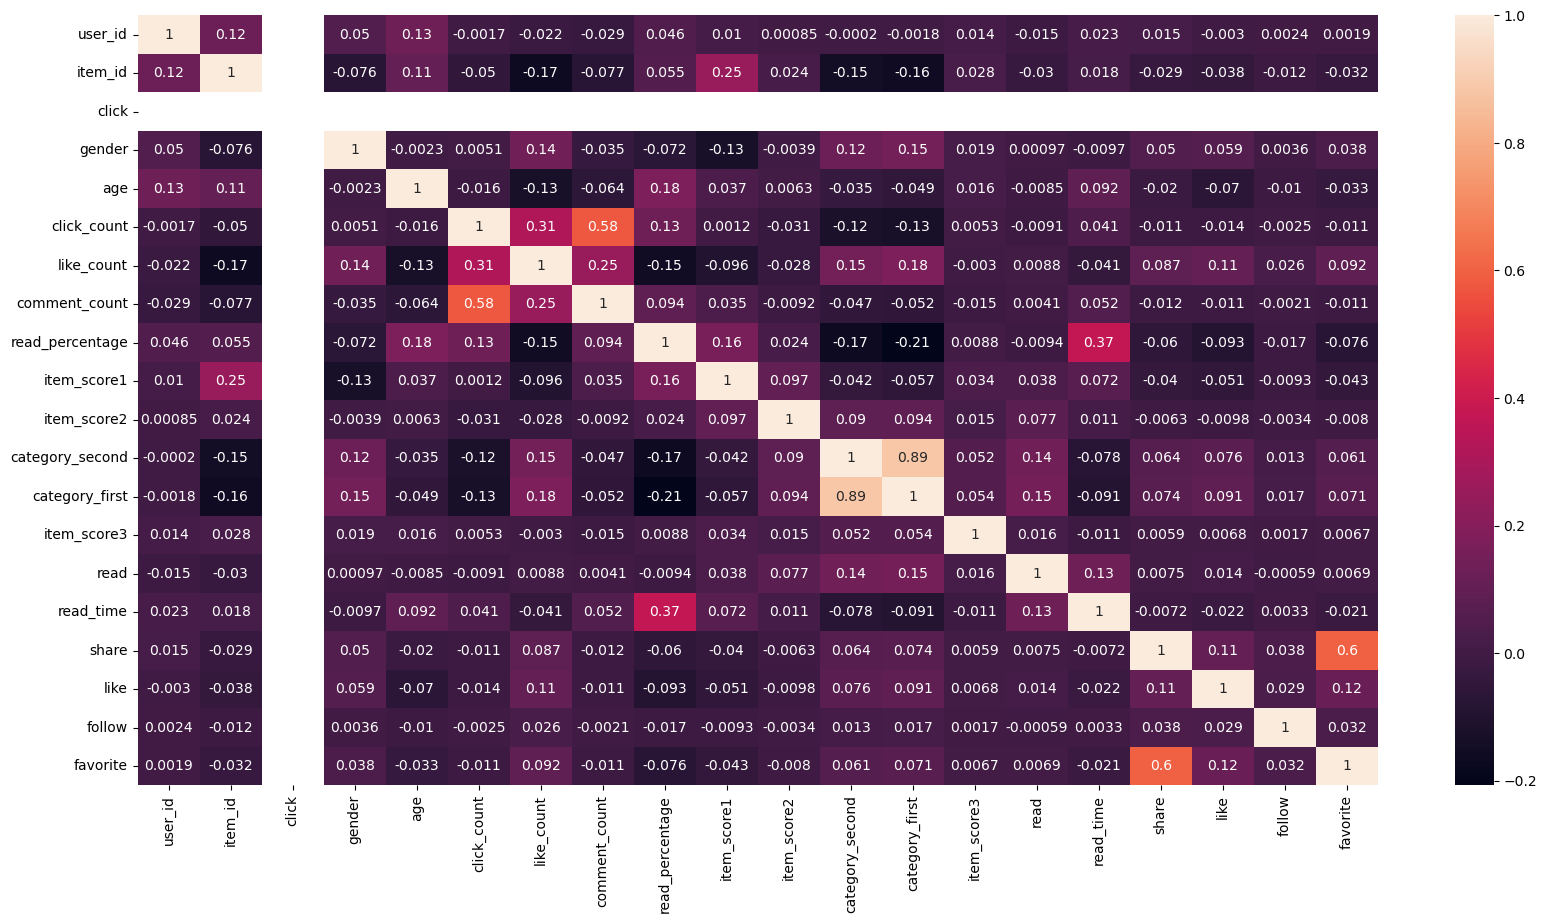

In [ ]:
#plotting the heatmap for correlation
ax = pyplot.subplots(figsize=(20, 10))
ax = sns.heatmap(all_data_70.corr(), annot=True)

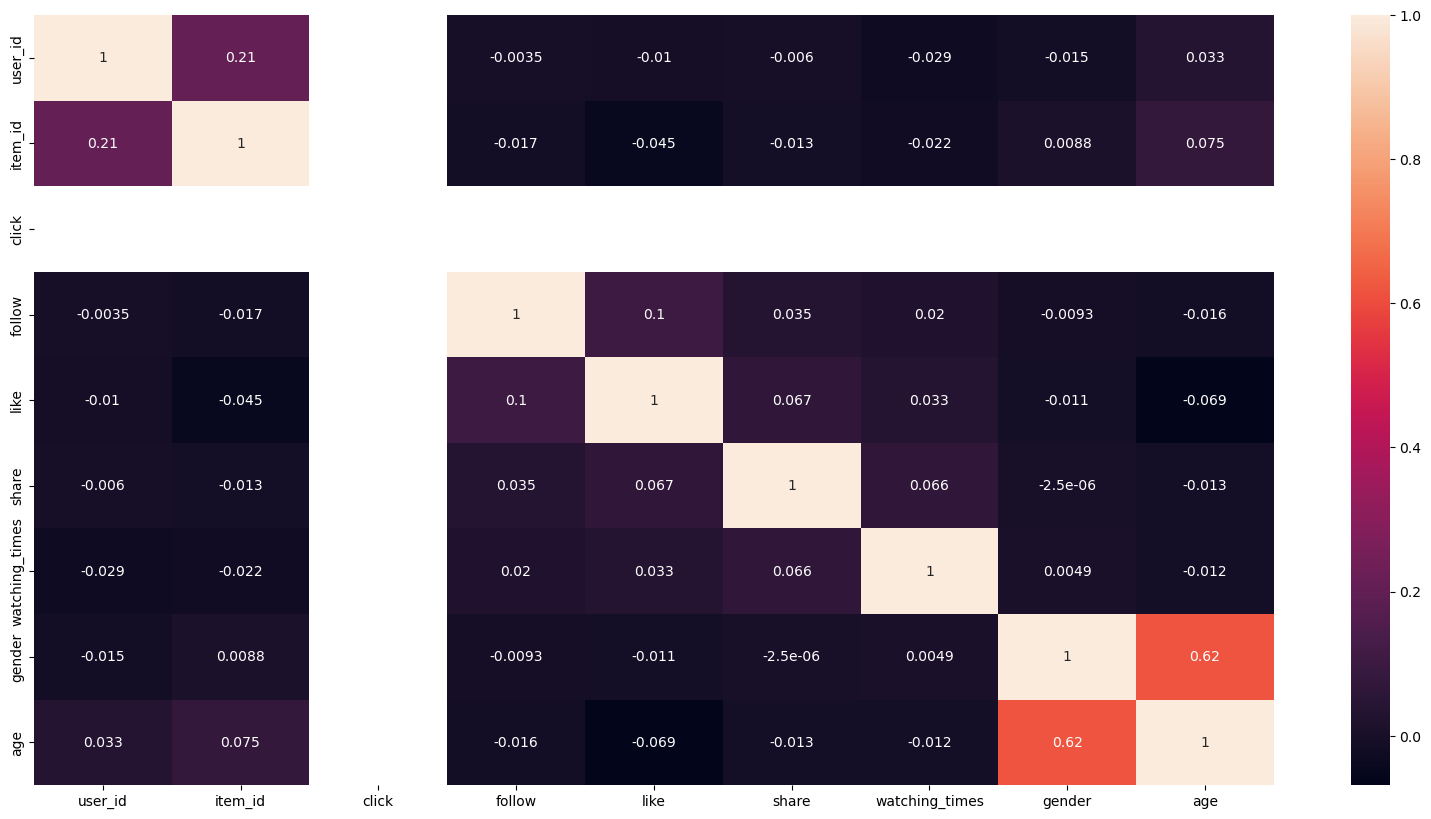

In [ ]:
#plotting the heatmap for correlation
ax = pyplot.subplots(figsize=(20, 10))
ax = sns.heatmap(all_data.select_dtypes(include=np.number).corr(), annot=True)

We found that the highest correlation is between the first category and the second category in the dataset for the cold start with 70%

While in the sbr dataset , the highest correlation is between gender and age

# We will see the data that has unlogical labels

We removed the "0" from the age and the gender as we assumed that they were:

No age or gender with values equal to "0"

That's for the gender

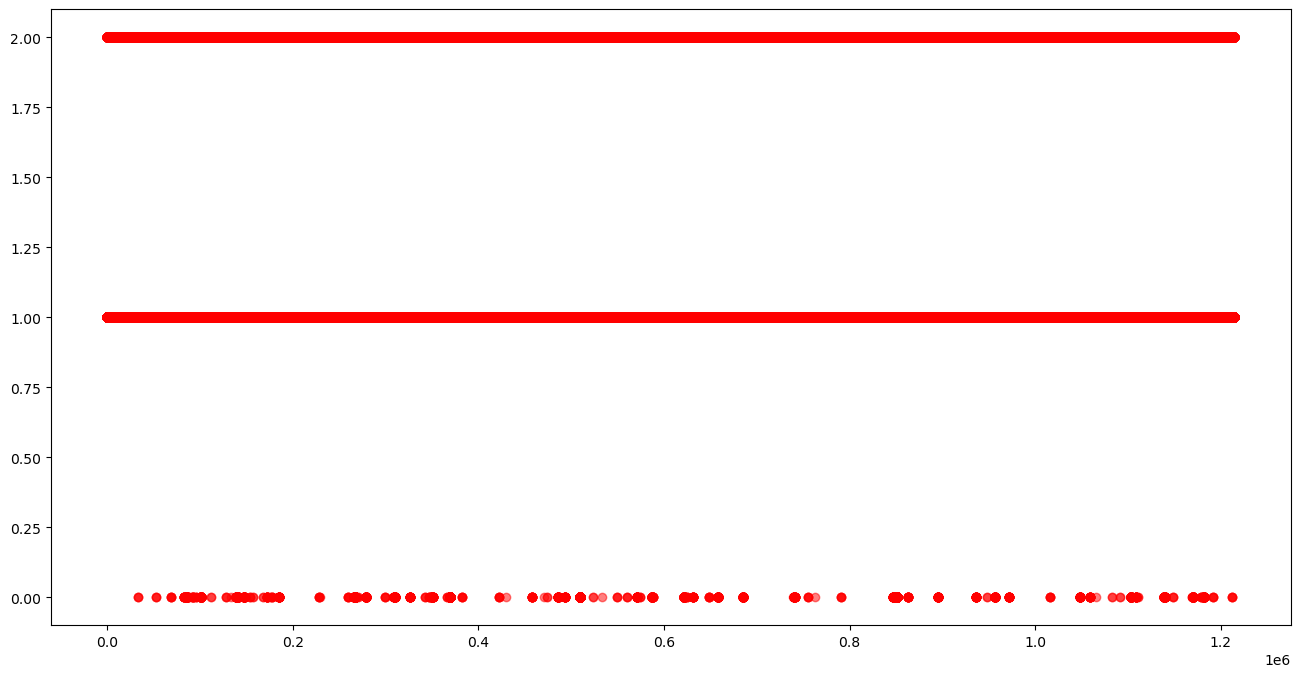

In [ ]:
# Create a list of consecutive integers
s=all_data_70['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

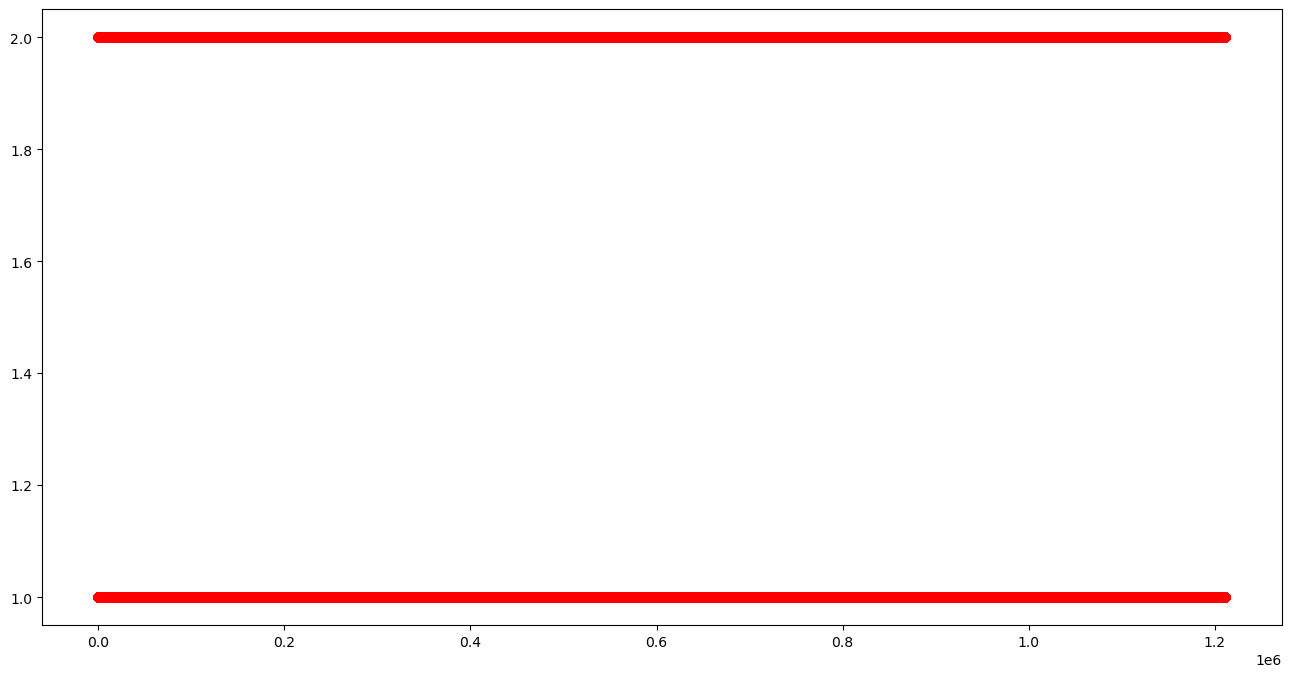

In [ ]:
## removing the outliers from the target column

all_data_70 = all_data_70[all_data_70['gender'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data_70['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

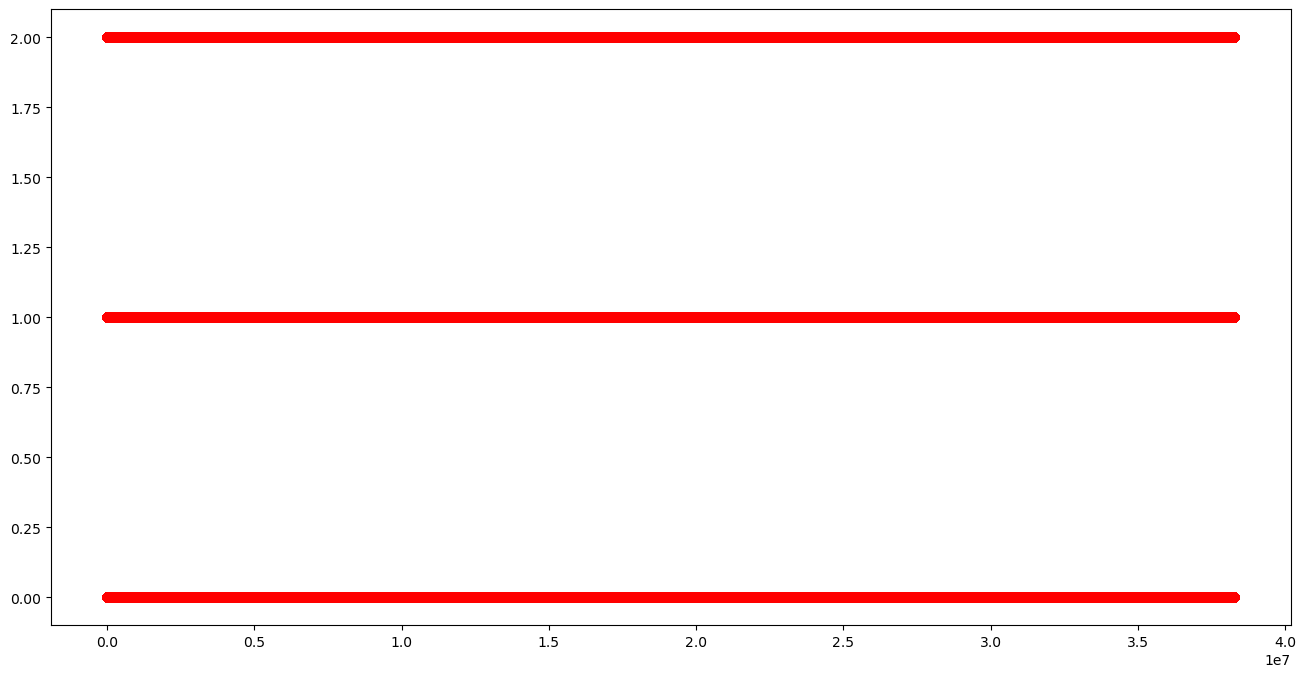

In [ ]:
# Create a list of consecutive integers
s=all_data['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

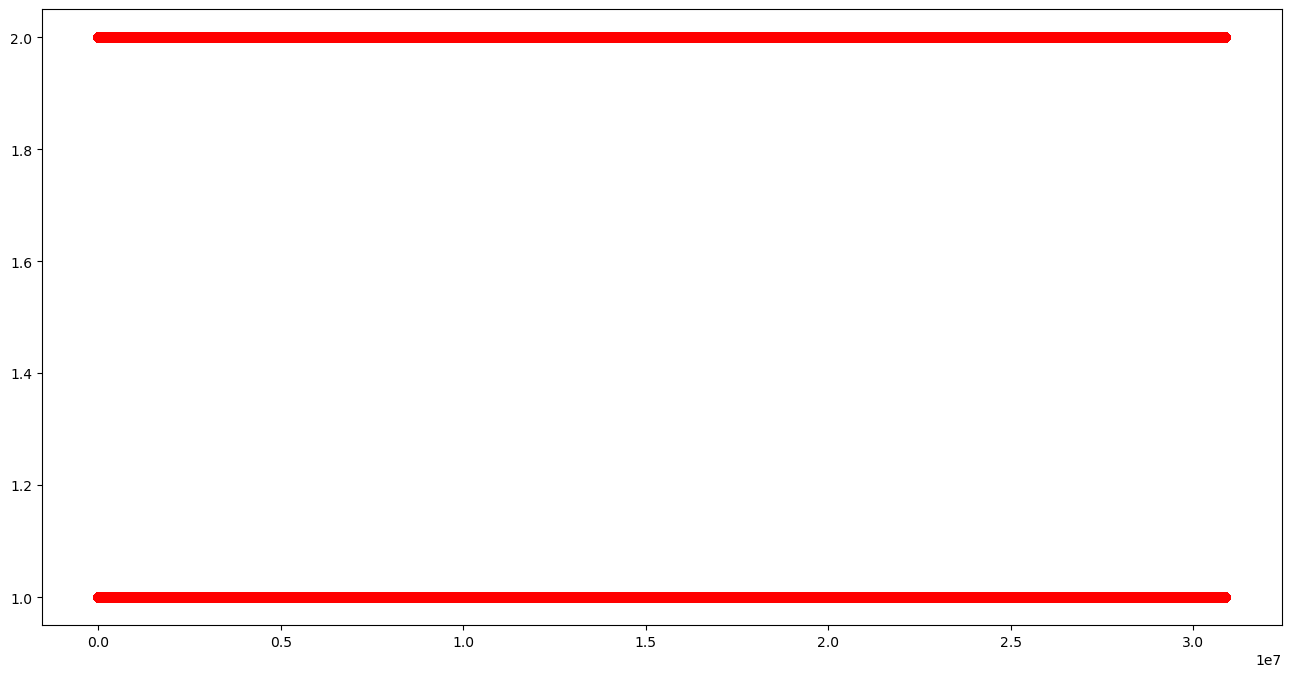

In [ ]:
## removing the outliers from the target column

all_data = all_data[all_data['gender'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data['gender']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

In [ ]:
# Here, we just want to make sure that ther are 2 categories only (male, female from our assumption)
all_data_70['gender'].unique()

array([2, 1], dtype=int64)

In [ ]:
# Here, we just want to make sure that ther are 2 categories only (male, female from our assumption)
all_data['gender'].unique()

array([1, 2], dtype=int64)

That's for the age

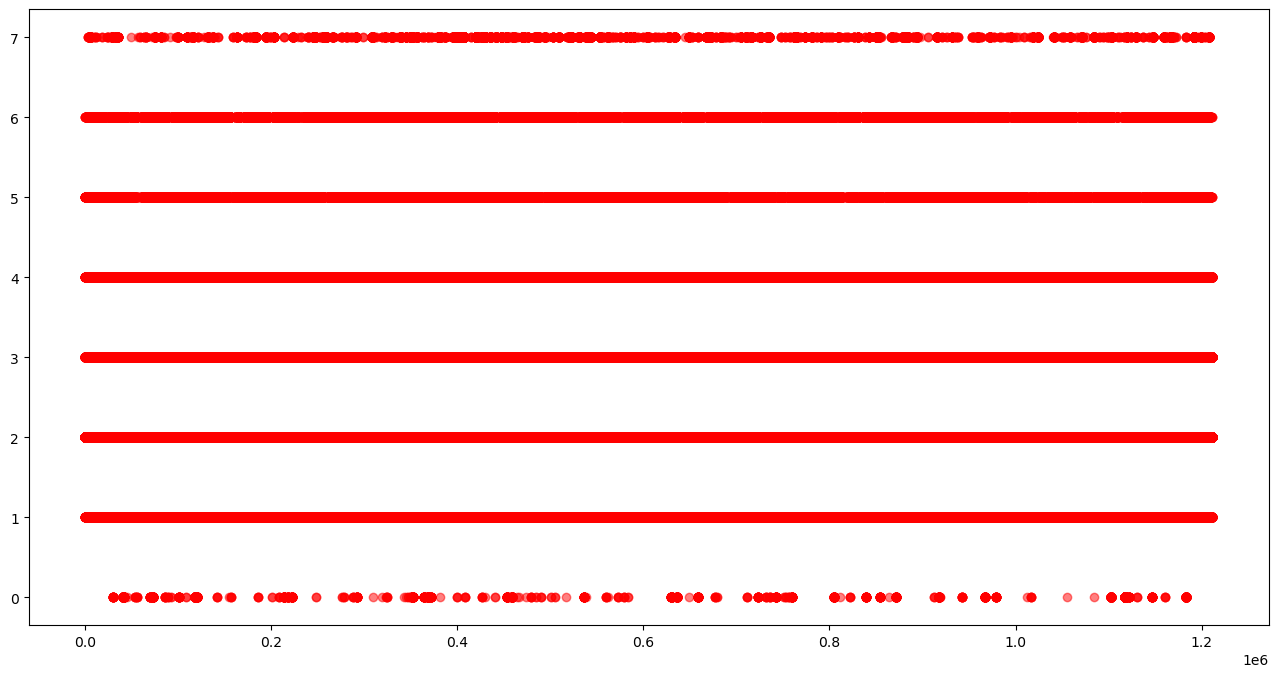

In [ ]:
# Create a list of consecutive integers
s=all_data_70['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

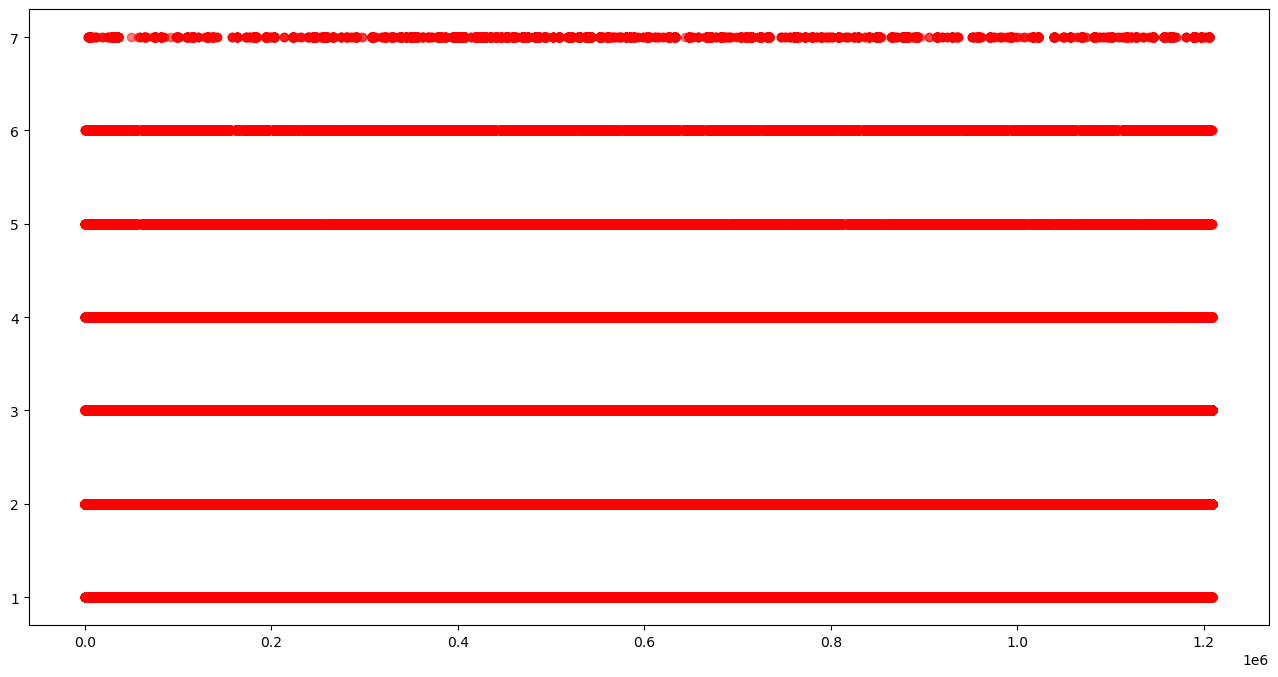

In [ ]:
## removing the outliers from the target column

all_data_70 = all_data_70[all_data_70['age'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data_70['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

In [ ]:
# Here, we just want to make sure that ther are 7 categories only (1->7 from our assumption)
all_data_70['age'].unique()

array([2, 4, 3, 6, 5, 1, 7], dtype=int64)

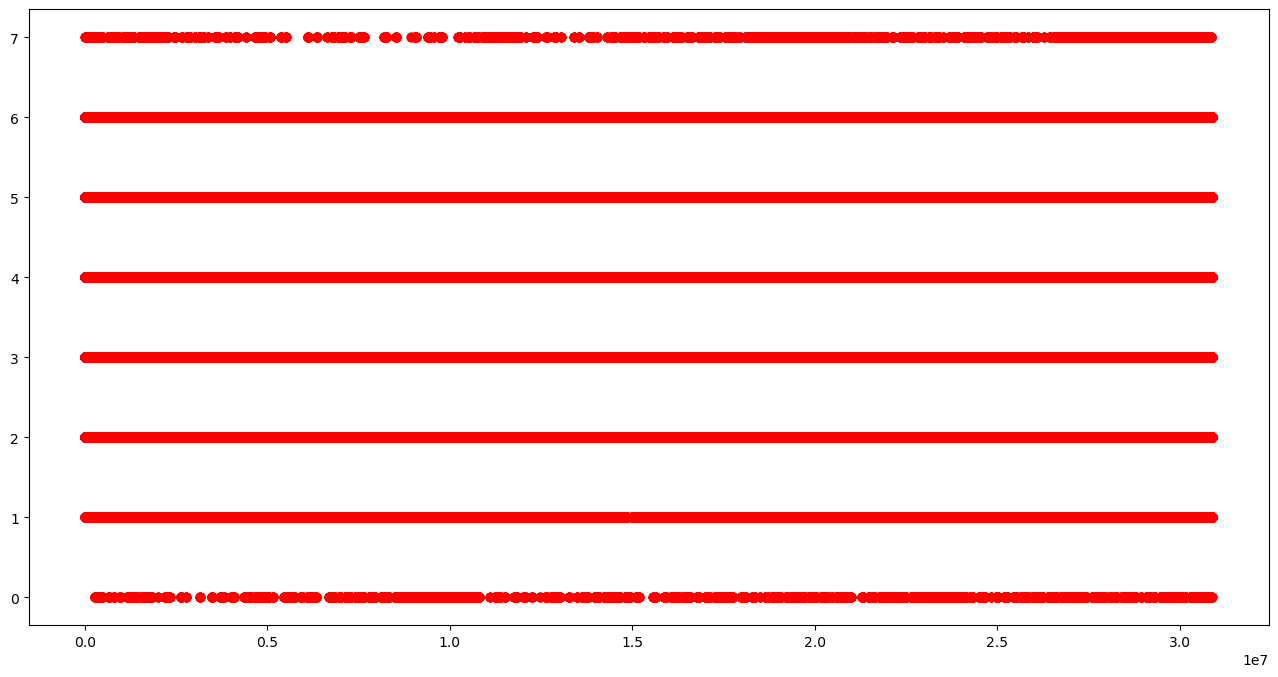

In [ ]:
# Create a list of consecutive integers
s=all_data['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

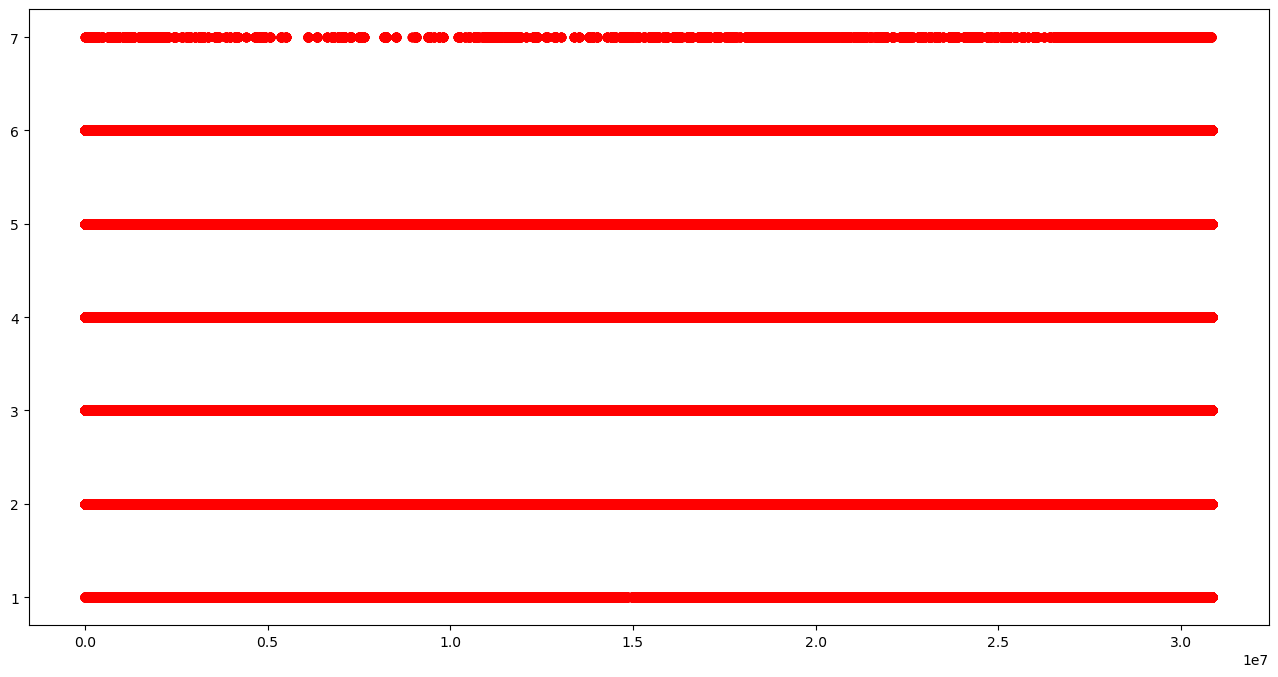

In [ ]:
## removing the outliers from the target column

all_data = all_data[all_data['age'] >= 1]

## plotting the outlier against the constinous distn. in a scatter plot again to check
# Create a list of consecutive integers
s=all_data['age']
i = range(len(s))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(i,s, c='red', alpha=0.5)
plt.show()

In [ ]:
# Here, we just want to make sure that ther are 7 categories only (1->7 from our assumption)
all_data['age'].unique()

array([4, 2, 5, 3, 6, 7, 1], dtype=int64)

# We will make some aggregations on the data

As we want our data in separated way (as it did not contain only cold-start )

So , we can not make aggregation and use it in the following steps and the model

So, we will make sum aggregations on the data to analysis it only

In [ ]:
all_data_70_agg = all_data_70.groupby('user_id').agg({'click_count': 'sum','read_percentage':'mean','read_time':'sum'}).reset_index()
all_data_70_agg

,user_id,click_count,read_percentage,read_time
0,11,3348472,50.928571,631.000000
1,24,299349,71.000000,17.000000
2,33,493135,16.200000,124.000000
3,44,54415,37.000000,109.000000
4,71,1437583,65.500000,773.000000
...,...,...,...,...
68430,1000005,24162,24.000000,9.000000
68431,1000010,4610,67.000000,12.000000
68432,1000011,66235,15.000000,20.946036
68433,1000013,40978,43.500000,133.000000


In [ ]:
all_data_70_useritem=all_data_70.groupby('user_id').agg({'item_id': 'count'}).reset_index()
all_data_70_useritem

,user_id,item_id
0,11,14
1,24,2
2,33,5
3,44,1
4,71,18
...,...,...
68430,1000005,1
68431,1000010,1
68432,1000011,2
68433,1000013,4


In [ ]:
all_data_agg = all_data.groupby('user_id').agg({'watching_times': 'sum'}).reset_index()
all_data_agg

,user_id,watching_times
0,1,71
1,2,23
2,3,63
3,4,34
4,5,100
...,...,...
808258,1000010,56
808259,1000011,32
808260,1000013,40
808261,1000014,17


In [ ]:
all_data_useritem=all_data.groupby('user_id').agg({'item_id': 'count'}).reset_index()
all_data_useritem

,user_id,item_id
0,1,71
1,2,15
2,3,37
3,4,27
4,5,53
...,...,...
808258,1000010,53
808259,1000011,24
808260,1000013,36
808261,1000014,10


**For the 70%**

Here, we got :
1. the sum of the click_counts -> as we want to see the total number of clicks
2. the average of the read_percentage
3. the total number of each read_time
4. the count of the item id

**For the sbr dataset**

Here, we got :
1. the count of item_id
2. the sum of watching_times'

In this dataset, we did not need the test of hypothesis or any feature engineering or feature extraction

# We need to do some sort of preparing the data to be able to standarizied and modelled

In [ ]:
all_data_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1209286 entries, 0 to 1263749
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1209286 non-null  int64  
 1   item_id          1209286 non-null  int64  
 2   click            1209286 non-null  float64
 3   gender           1209286 non-null  int64  
 4   age              1209286 non-null  int64  
 5   click_count      1209286 non-null  int64  
 6   like_count       1209286 non-null  int64  
 7   comment_count    1209286 non-null  int64  
 8   read_percentage  1209286 non-null  float64
 9   item_score1      1209286 non-null  int64  
 10  item_score2      1209286 non-null  float64
 11  category_second  1209286 non-null  int64  
 12  category_first   1209286 non-null  int64  
 13  item_score3      1209286 non-null  float64
 14  read             1209286 non-null  bool   
 15  read_time        1209286 non-null  float64
 16  share            1

In [ ]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30856954 entries, 0 to 38300243
Data columns (total 10 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   user_id         int64 
 1   item_id         int64 
 2   click           int64 
 3   follow          int64 
 4   like            int64 
 5   share           int64 
 6   video_category  object
 7   watching_times  int64 
 8   gender          int64 
 9   age             int64 
dtypes: int64(9), object(1)
memory usage: 2.5+ GB


We will not apply the satndarization on the categorical or the ids (as it can not be in specific range )

We will remove the categorical, user_id and item_id columns to give it to the standarized function


In [ ]:
all_data_70_drop_category=all_data_70.drop(['gender','age','click','user_id','item_id','read','share','like','follow','favorite'],axis=1)#70%

In [ ]:
all_data_drop_category=all_data.drop(['gender','age','follow','like','share','click','user_id','item_id','video_category'],axis=1)#sbr

Store the categorical columns in varibles to use it later in the model (concate it with the standarized data)

In [ ]:
all_data_70_category=all_data_70.drop(['click_count','like_count','comment_count','read_percentage','item_score1','item_score2','category_second','category_first','item_score3','read_time'],axis=1)

In [ ]:
all_data_category=all_data.drop(['watching_times'],axis=1)

# We will standarize the data

now, we will standardize the data to be in specific range and not to make the model baised to a certain numbers

In [ ]:
# For the 705 cold start
scaler = StandardScaler()
standardized_data_07 = scaler.fit_transform(all_data_70_drop_category)
print(standardized_data_07)

[[-0.42443443 -0.31493717 -0.48115491 ...  0.43662703 -0.84958219
  -0.64966686]
 [-0.33420524 -0.27939701 -0.42953768 ... -0.18676406 -0.61198318
  -0.45704095]
 [-0.36256963 -0.27375842 -0.42585073 ... -0.96600291  0.33841284
   0.63450587]
 ...
 [-0.29005326 -0.27820094 -0.40250008 ... -1.12185069 -0.84958219
   0.81429005]
 [-0.40719603 -0.28845291 -0.4682506  ... -0.42053572 -0.84958219
   0.04378641]
 [-0.40836526 -0.31271591 -0.43936953 ...  0.43662703 -0.84958219
   0.15936196]]


In [ ]:
# For the sbr dataset
scaler = StandardScaler()
standardized_data = scaler.fit_transform(all_data_drop_category)
print(standardized_data)

[[-0.23979369]
 [-0.23979369]
 [-0.23979369]
 ...
 [-0.23979369]
 [-0.23979369]
 [-0.23979369]]


In [ ]:
all_data_drop_category.select_dtypes

<bound method DataFrame.select_dtypes of           watching_times
0                      1
1                      1
2                      1
3                      1
4                      1
...                  ...
38300239               2
38300240               2
38300241               1
38300242               1
38300243               1

[30856954 rows x 1 columns]>

In [ ]:
standardized_data_07 = pd.DataFrame(standardized_data_07, columns=all_data_70_drop_category.columns)
standardized_data_07

,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
0,-0.424434,-0.314937,-0.481155,-0.879409,-0.037363,-0.135008,0.424193,0.436627,-0.849582,-0.649667
1,-0.334205,-0.279397,-0.429538,-0.255359,-0.037363,-0.135008,-0.151725,-0.186764,-0.611983,-0.457041
2,-0.362570,-0.273758,-0.425851,-0.255359,1.300024,6.154945,-0.875962,-0.966003,0.338413,0.634506
3,-0.423173,-0.314937,-0.481155,-0.186020,-1.374750,-0.135008,0.498715,0.514551,0.338413,-0.508408
4,-0.394509,-0.313229,-0.472552,-0.290028,-1.374750,-0.135008,0.502332,0.514551,0.338413,-0.225890
...,...,...,...,...,...,...,...,...,...,...
1209281,0.264024,-0.023269,0.682691,0.576708,-0.037363,-0.135008,-0.153172,-0.186764,-0.136785,-0.367149
1209282,-0.203926,-0.249495,-0.301109,0.230014,1.300024,-0.135008,0.066777,0.047008,0.338413,-0.418516
1209283,-0.290053,-0.278201,-0.402500,-0.047342,-1.374750,-0.135008,-1.021389,-1.121851,-0.849582,0.814290
1209284,-0.407196,-0.288453,-0.468251,0.611378,-0.037363,-0.135008,-0.370949,-0.420536,-0.849582,0.043786


In [ ]:
standardized_data = pd.DataFrame(standardized_data, columns=all_data_drop_category.columns)
standardized_data

,watching_times
0,-0.239794
1,-0.239794
2,-0.239794
3,-0.239794
4,-0.239794
...,...
30856949,0.243892
30856950,0.243892
30856951,-0.239794
30856952,-0.239794


We will concatnate the categorical columns with the standarized data to apply the model on it

In [ ]:
all_data_70_final_data=pd.concat([standardized_data_07,all_data_70_category],axis=1)

In [ ]:
all_data_final_data=pd.concat([standardized_data,all_data_category],axis=1)

Summary for all the followind steps:
* We applied some preprocessing on the data
1. Removed the duplicates
2. Made some preprocessing on the data to standarize it
3. Standarized rthe data
4. The data did not need tests of hypothesis or feature enginnering (in my point of view)

Now, we will split the data and apply the model on it

# Now, we will split the data to train and test on the standarized data and apply the model

We have used this site as a
Reference:
    [1]Fajie Yuan et al. Parameter-efficient transfer from sequential behaviors for user modeling and recommendation. In SIGIR, pages 1469–1478, 2020.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score

In [ ]:
#utils.py
def get_train_loader(dataset, is_parallel = False):
    """
    This cell defines the functions to create data loaders for your training, validation, and testing datasets.
    Data loaders are PyTorch's way to handle large datasets that can't fit into memory.
    They allow you to load data in small batches, rather than all at once.
    """
    if is_parallel:
        # Create a distributed data loader using PyTorch's DistributedSampler class
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, sampler=DistributedSampler(dataset))
    else:
        # Create a regular data loader with a batch size of 1024 and shuffle the data
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, shuffle=True, pin_memory=True)
    return dataloader

def get_val_loader(dataset, is_parallel = False):
    """
    This function creates a data loader for the validation dataset.

    Args:
        dataset: PyTorch dataset object containing the validation data.
        is_parallel: Boolean flag indicating whether to use distributed data loading.
                     Defaults to False.

    Returns:
        A PyTorch DataLoader object for the validation dataset.
    """
    if is_parallel:
         # Create a distributed data loader using PyTorch's DistributedSampler class
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, sampler=DistributedSampler(dataset))
    else:
         # Create a regular data loader with a batch size of 1024 and do not shuffle the data
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, shuffle=False, pin_memory=True)
    return dataloader

def get_test_loader(dataset, is_parallel = False):
    """
    This function creates a data loader for the test dataset.

    Args:
        dataset: PyTorch dataset object containing the test data.
        is_parallel: Boolean flag indicating whether to use distributed data loading.
                     Defaults to False.

    Returns:
        A PyTorch DataLoader object for the test dataset.
    """
    if is_parallel:
        # Create a distributed data loader using PyTorch's DistributedSampler class
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, sampler=DistributedSampler(dataset))
    else:
        # Create a regular data loader with a batch size of 1024 and do not shuffle the data
        dataloader = data_utils.DataLoader(dataset, batch_size=1024, shuffle=False, pin_memory=True)
    return dataloader

In [ ]:
class ColdResetDF:
    def __init__(self):
        self.item_enc1 = LabelEncoder()
        self.item_enc2 = LabelEncoder()
        self.user_enc = LabelEncoder()

    def fit_transform(self, df1, df2):
        df = pd.concat([df1['user_id'], df2['user_id']], ignore_index=True)
        df = self.user_enc.fit_transform(df) + 1
        df1['item_id'] = self.item_enc1.fit_transform(df1['item_id']) + 1
        df1['user_id'] = df[:len(df1)]
        df2['item_id'] = self.item_enc2.fit_transform(df2['item_id']) + 1
        df2['user_id'] = df[len(df1):]
        return df1, df2

    def inverse_transform(self, df):
        df['item_id'] = self.item_enc1.inverse_transform(df['item_id'] - 1)
        df['user_id'] = self.user_enc.inverse_transform(df['user_id'] - 1)
        return df


In [ ]:
class ItemResetDF:
    def __init__(self):
        self.item_enc = LabelEncoder()

    def fit_transform(self, df):
        df['item_id'] = self.item_enc.fit_transform(df['item_id']) + 1
        return df

    def inverse_transform(self, df):
        df['item_id'] = self.item_enc.inverse_transform(df['item_id'] - 1)
        return df

In [ ]:
def construct_data(task, item_min):
    if task != 2:
        df1 = all_data_70_final_data[['user_id', 'item_id', 'age', 'gender', 'click']]
#         df1 = pd.read_csv(path1, usecols=['user_id', 'item_id', 'click'])
        df1 = df1[df1.click == 1]
    else:
        df1 = all_data_70_final_data[['user_id', 'item_id', 'age', 'gender', 'like']]
        df1 = df1[df1.like == 1]

    df2 = all_data_final_data[['user_id', 'item_id', 'age', 'gender', 'click']]
    df2 = df2[df2.click == 1]

    user_counts = df2.groupby('user_id').size()
    user_subset = np.in1d(df2.user_id, user_counts[user_counts >= item_min].index)
    df2 = df2[user_subset].reset_index(drop=True)

    assert (df2.groupby('user_id').size() < item_min).sum() == 0
    s_item_count = len(set(df2['item_id']))

    reset_ob = ColdResetDF()
    df2, df1 = reset_ob.fit_transform(df2, df1)

    user1 = set(df1.user_id.values.tolist())
    user2 = set(df2.user_id.values.tolist())
    user = user1 & user2
    df1 = df1[df1.user_id.isin(list(user))]
    df2 = df2[df2.user_id.isin(list(user))]

    new_data1 = []
    new_data2 = []
    for u in tqdm(user):
        tmp_data2 = df2[df2.user_id == u][:-3].values.tolist()
        tmp_data1 = df1[df1.user_id == u].values.tolist()
        new_data1.extend(tmp_data1)
        new_data2.extend(tmp_data2)
    new_data1 = pd.DataFrame(new_data1, columns=df1.columns)
    new_data2 = pd.DataFrame(new_data2, columns=df2.columns)
    user_count = len(set(new_data1.user_id.values.tolist()))

    reset_item = ItemResetDF()
    new_data1 = reset_item.fit_transform(new_data1)

    t_item_count = len(set(new_data1['item_id']))
    print(new_data1.columns)
    return new_data1, new_data2, user_count, t_item_count, s_item_count

In [ ]:
#utils.py
def colddataset(item_min, task):
    """This function constructs a cold start recommendation dataset from the data returned by the `construct_data` function.
    It creates a dictionary of user histories from the source dataset and a dictionary of target items from the target dataset.
    It then iterates over the target items and appends each one to its corresponding user's history,
    along with a special padding value of 0.
    It creates a new Pandas dataframe with the resulting source and target sequences and returns
    it along with some summary statistics.

    Args:
        item_min (int): The minimum number of items a user must have clicked on in the second dataset.
        task (int): The task to perform. If task is not 2, the function selects the 'click' column from the 'cold_data_0.3.csv' dataset. Otherwise, it selects the 'like' column from the same dataset.

    Returns:
        A tuple containing four elements:
        - A Pandas dataframe containing the source and target sequences for each example in the cold start recommendation dataset.
        - The number of selected users in the dataset.
        - The number of items in the original 'sbr_data_1M.csv' dataset.
        - The number of items in the resulting dataset for cold start recommendation.
    """
    target_data, source_data, user_count, t_item_count, s_item_count = construct_data(task, item_min)

    print("+++user_history+++")
    user_history = source_data.groupby('user_id').item_id.apply(list).to_dict()
    target = target_data.groupby('user_id').item_id.apply(list).to_dict()

    # Modified part to include age and gender
    age_gender_mapping = target_data.groupby('user_id').agg({'age': 'first', 'gender': 'first'}).to_dict()

    examples = []
    for u, t_list in tqdm(target.items()):
        for t in t_list:
            # Modified part to include age and gender in examples
            age_val = age_gender_mapping['age'][u]
            gender_val = age_gender_mapping['gender'][u]
            e_list = [user_history[u] + [0], t, age_val, gender_val]  # Add age and gender to the example list
            examples.append(e_list)
    examples = pd.DataFrame(examples, columns=['source', 'target', 'age', 'gender'])
    return examples, user_count, s_item_count, t_item_count

In [ ]:
#utils.py
class ColdDataset(data_utils.Dataset):
    """This class defines a PyTorch dataset for the cold start recommendation task. It takes as input two sequences of item IDs, `x` and `y`,
    a maximum sequence length `max_len`, and a mask token `mask_token`.
    It implements the `__len__` and `__getitem__` methods required by the PyTorch dataset API to enable iteration over the dataset.


    Args:
        x (list): A list of sequences of item IDs.
        y (list): A list of target item IDs.
        max_len (int): The maximum sequence length.
        mask_token (int): The mask token ID.

    Returns:
        A tuple containing two PyTorch tensors:
        - A tensor of shape (max_len,) containing the input sequence with padding if necessary.
        - A tensor of shape (1,) containing the target item ID.
    """
    def __init__(self, x, y, max_len, mask_token):
        self.seqs = x
        self.targets = y
        self.max_len = max_len
        self.mask_token = mask_token

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, index):
        seq = self.seqs[index]
        target = self.targets[index]
        seq = seq[-self.max_len:]
        seq_len = len(seq)
        seq_mask_len = self.max_len - seq_len
        seq = [0] * seq_mask_len + seq
        return torch.LongTensor(seq), torch.LongTensor([target])


In [ ]:
#utils.py
class ColdEvalDataset(data_utils.Dataset):
    """This class defines a PyTorch dataset for evaluating the cold start recommendation task. It takes as input two sequences of item IDs, `x` and `y`, a maximum sequence length `max_len`, a mask token `mask_token`, and the number of items in the dataset `num_item`. It implements the `__len__` and `__getitem__` methods required by the PyTorch dataset API to enable iteration over the dataset.

    Args:
        x (list): A list of sequences of item IDs.
        y (list): A list of target item IDs.
        max_len (int): The maximum sequence length.
        mask_token (int): The mask token ID.
        num_item (int): The number of items in the dataset.

    Returns:
        A tuple containing two PyTorch tensors:
        - A tensor of shape (max_len,) containing the input sequence with padding if necessary.
        - A tensor of shape (num_item+1,) containing the one-hot encoded labels for the target item.
    """
    def __init__(self, x, y, max_len, mask_token, num_item):
        self.seqs = x
        self.targets = y
        self.max_len = max_len
        self.mask_token = mask_token
        self.num_item = num_item + 1

    def __len__(self):
        return len(self.seqs)

    def __getitem__(self, index):
        seq = self.seqs[index]
        target = self.targets[index]
        labels = [0] * self.num_item
        labels[target] = 1
        seq = seq[-self.max_len:]
        seq_len = len(seq)
        seq_mask_len = self.max_len - seq_len
        seq = [self.mask_token] * seq_mask_len + seq
        return torch.LongTensor(seq), torch.LongTensor(labels)

In [ ]:
x_test_for_bias_later = []
y_test_for_bias_later = []

In [ ]:
from torch.utils.data import DistributedSampler, DataLoader
#main.py
def get_data(max_len = 20, item_min = 10, task = 2, pad_token = 0):
    """
    This function retrieves the data for the COLD model.

    Args:
        max_len: Maximum length of input sequences. Defaults to 20.
        item_min: Minimum number of times an item must appear in the dataset. Defaults to 10.
        task: Task number for the COLD dataset. Defaults to 2.
        pad_token: Token used for padding shorter sequences. Defaults to 0.

    Returns:
        train_dataloader: PyTorch DataLoader object for the training dataset.
        valid_dataloader: PyTorch DataLoader object for the validation dataset.
        test_dataloader: PyTorch DataLoader object for the test dataset.
        num_users: Number of users in the dataset.
        num_items: Number of items in the dataset.
        num_embeddings: Size of the vocabulary.
    """

    data, user_count, vocab_size, item_count = colddataset(item_min, task)

    # Split data into train, validation, and test sets
    x_train, x_test, y_train, y_test = train_test_split(data[['source', 'age', 'gender']],
                                                        data['target'],
                                                        test_size=0.2,
                                                        random_state=512)
    x_val, x_test, y_val, y_test = train_test_split(x_test,
                                                    y_test,
                                                    test_size=0.5,
                                                    random_state=512)

    x_test_for_bias_later.append(x_test)
    y_test_for_bias_later.append(y_test)

    # Convert the dataframes to arrays and then lists
    x_train = {'seq_column': x_train['source'].values.tolist(),
               'age_column': x_train['age'].values.tolist(),
               'gender_column': x_train['gender'].values.tolist()}
    y_train = y_train.values.tolist()

    x_val = {'seq_column': x_val['source'].values.tolist(),
             'age_column': x_val['age'].values.tolist(),
             'gender_column': x_val['gender'].values.tolist()}
    y_val = y_val.values.tolist()

    x_test = {'seq_column': x_test['source'].values.tolist(),
              'age_column': x_test['age'].values.tolist(),
              'gender_column': x_test['gender'].values.tolist()}
    y_test = y_test.values.tolist()

    train_dataset = ColdDataset(x_train['seq_column'], y_train, max_len, pad_token)
    valid_dataset = ColdEvalDataset(x_val['seq_column'], y_val, max_len, pad_token, item_count)
    test_dataset = ColdEvalDataset(x_test['seq_column'], y_test, max_len, pad_token, item_count)

    num_users = user_count
    num_items = item_count
    num_embeddings = vocab_size

    train_dataloader = DataLoader(train_dataset, batch_size=1024, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=1024, shuffle=False)
    test_dataloader = DataLoader(test_dataset, batch_size=1024, shuffle=False)

    return train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings

In [ ]:
#trainer.py
def recalls_and_ndcgs_for_ks(scores, labels, ks):
    """
    This function computes recall and NDCG scores for a given set of predictions and labels.

    Args:
        scores: Tensor containing the predicted scores for each item.
        labels: Tensor containing the true labels for each item.
        ks: List of integers representing the cutoffs for recall and NDCG.

    Returns:
        metrics: Dictionary containing the recall and NDCG scores for each cutoff k.
    """
    metrics = {}
    # Compute the number of correct answers for each user and the total number of answers
    answer_count = labels.sum(1)
    answer_count_float = answer_count.float()
    labels_float = labels.float()
     # Sort the predicted scores and get the indices of the top k items for each user
    rank = (-scores).argsort(dim=1)
    cut = rank
     # Compute recall and NDCG scores for each cutoff k
    for k in sorted(ks, reverse=True):
       cut = cut[:, :k]
       hits = labels_float.gather(1, cut)
       metrics['Recall@%d' % k] = (hits.sum(1) / answer_count_float).mean().item()

       position = torch.arange(2, 2+k)
       weights = 1 / torch.log2(position.float()).to('cpu')
       dcg = (hits * weights).sum(1)
       idcg = torch.Tensor([weights[:min(n, k)].sum() for n in answer_count]).to('cpu')
       ndcg = (dcg / idcg).mean()
       metrics['NDCG@%d' % k] = ndcg

    return metrics

In [ ]:
#trainer.py
def Sequence_full_Validate(epoch, model, dataloader, writer, test=False):
    """
    This function performs a full validation pass on the given data using the given model.

    Args:
        epoch: Current epoch number.
        model: PyTorch model to use for validation.
        dataloader: PyTorch DataLoader object for the validation data.
        writer: SummaryWriter object for logging.
        test: Whether to perform testing instead of validation. Defaults to False.

    Returns:
        avg_metrics: Dictionary containing the average recall and NDCG scores for the validation data.
    """
    print("+" * 20, "Valid Epoch {}".format(epoch + 1), "+" * 20)
     # Set the model to evaluation mode
    model.eval()
    # Initialize a dictionary for storing the average recall and NDCG scores
    avg_metrics = {}
    # Initialize a counter for the number of batches processed
    i = 0
    # Iterate over the validation data
    with torch.no_grad():
        tqdm_dataloader = dataloader
        # Move the data to the CPU
        for data in tqdm_dataloader:
            data = [x.to('cpu') for x in data]
            seqs, labels = data
            # Forward pass through the model to get predicted scores
            if test:
                scores = model.predict(seqs)
            else:
                scores = model(seqs)
            scores = scores.mean(1)
            # Compute recall and NDCG scores for the predicted scores and true labels
            metrics = recalls_and_ndcgs_for_ks(scores, labels, [5, 20])
            # Update the average metrics dictionary and the batch counter
            i += 1
            for key, value in metrics.items():
                if key not in avg_metrics:
                    avg_metrics[key] = value
                else:
                    avg_metrics[key] += value
     # Compute the average recall and NDCG score
    for key, value in avg_metrics.items():
        avg_metrics[key] = value / i
         # Log the NDCG scores to TensorBoard
    print(avg_metrics)
    for k in sorted([5, 20], reverse=True):
        writer.add_scalar('Train/NDCG@{}'.format(k), avg_metrics['NDCG@%d' % k], epoch)
#          Return the average recall and NDCG scores
    return avg_metrics


In [ ]:
#trainer.py
def SequenceTrainer(epoch, model, dataloader, optimizer, writer): #schedular,
    """
    This function trains the given model on the given data using the given optimizer.

    Args:
        epoch: Current epoch number.
        model: PyTorch model to train.
        dataloader: PyTorch DataLoader object for the training data.
        optimizer: PyTorch optimizer to use for training.
        writer: SummaryWriter object for logging.

    Returns:
        optimizer: PyTorch optimizer after training.
    """
    print("+" * 20, "Train Epoch {}".format(epoch + 1), "+" * 20)
    # Set the model to training mode
    model.train()
    # Initialize a variable for storing the running loss
    running_loss = 0
    # Use cross-entropy loss as the loss function
    loss_fn = nn.CrossEntropyLoss(ignore_index=0)
    # Iterate over the training data
    for data in dataloader:
        # Zero out the gradients
        optimizer.zero_grad()
        data = [x.to('cpu') for x in data]
        seqs, labels = data
         # Forward pass through the model to get logits and compute the loss
        logits = model(seqs) # B x T x V
        logits = logits.mean(1)
        labels = labels.view(-1)
         # Backward pass and optimization step
        loss = loss_fn(logits, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.detach().cpu().item()
        # Log the average loss to TensorBoard and print it to the console
    writer.add_scalar('Train/loss', running_loss / len(dataloader), epoch)
    print("Training CE Loss: {:.5f}".format(running_loss / len(dataloader)))
    # Return the optimizer after training
    return optimizer

In [ ]:
#trainer.py
def SeqTrain(epochs, model, train_loader, val_loader, writer, is_parallel, is_pretrain, lr, weight_decay, local_rank):
    """
    This function trains the given model on the given training data and validates it on the given validation data.

    Args:
        epochs: Number of training epochs.
        model: PyTorch model to train.
        train_loader: PyTorch DataLoader object for the training data.
        val_loader: PyTorch DataLoader object for the validation data.
        writer: SummaryWriter object for logging.
        is_parallel: Whether to use data parallelism for training. Defaults to False.
        is_pretrain: Whether to use pre-trained model. Defaults to 0.
        lr: Learning rate for optimizer.
        weight_decay: Weight decay for optimizer.
        local_rank: Local rank for distributed training.

    Returns:
        best_model: PyTorch model with the best performance on the validation data.
    """
    # Initialize the optimizer
    if is_pretrain == 0:
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()),
                                     lr=lr, weight_decay=weight_decay)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr=lr, weight_decay=weight_decay)

    model = model.to('cpu')
    if is_parallel:
        model = torch.nn.parallel.DistributedDataParallel(model,  find_unused_parameters=True,device_ids=[local_rank], output_device=local_rank)
    best_metric = 0
    all_time = 0
    val_all_time = 0
    for epoch in range(epochs):
        since = time.time()
        optimizer = SequenceTrainer(epoch, model, train_loader, optimizer, writer)
        tmp = time.time() - since
        print('one epoch train:', tmp)
        all_time += tmp
        val_since = time.time()
        metrics = Sequence_full_Validate(epoch, model, val_loader, writer)
        # Validate the model and measure the time
        val_tmp = time.time() - val_since
        print('one epoch val:', val_tmp)
        val_all_time += val_tmp
        # Update the best model if necessary
        i = 1
        current_metric = metrics['NDCG@5']
        if best_metric <= current_metric:
            best_metric = current_metric
            best_model = deepcopy(model)
            state_dict = model.state_dict()
        else:
            i += 1
            if i == 10:
                print('early stop!')
                break
    # Print the total training and validation times and return the best model
    print('train_time:', all_time)
    print('val_time:', val_all_time)
    return best_model


In [ ]:
# -*- coding: utf-8 -*-
'''
Reference:
    [1]Fajie Yuan et al. Parameter-efficient transfer from sequential behaviors for user modeling and recommendation. In SIGIR, pages 1469–1478, 2020.
'''
import numpy as np
import torch
from torch import nn
from torch.nn import functional as F
from torch.nn.init import uniform_, xavier_normal_, constant_, normal_

class Peter4Coldstart(nn.Module):

    def __init__(self, embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token):
        super(Peter4Coldstart, self).__init__()

        # load parameters info
        self.embedding_size = embedding_size
        self.residual_channels = embedding_size
        self.block_num = block_num
        self.dilations = dilations * self.block_num
        self.kernel_size = kernel_size
        self.output_dim = num_items
        self.vocab_size = num_embedding
        self.is_mp = is_mp

        self.pad_token = pad_token

        # define layers and loss
        self.item_embedding = nn.Embedding(self.vocab_size+1, self.embedding_size, padding_idx=self.pad_token)

        # residual blocks
        rb = [
            ResidualBlock_b_2mp_parallel(
                self.residual_channels, self.residual_channels, kernel_size=self.kernel_size, dilation=dilation, is_mp=self.is_mp
            ) for dilation in self.dilations
        ]
        self.residual_blocks = nn.Sequential(*rb)

        # fully-connected layer
        self.final_layer = nn.Linear(self.residual_channels, self.output_dim+1)

        # parameters initialization
        # self.apply(self._init_weights)

    def _init_weights(self, module):
        if isinstance(module, nn.Embedding):
            stdv = np.sqrt(1. / (self.output_dim+1))
            uniform_(module.weight.data, -stdv, stdv)
        elif isinstance(module, nn.Linear):
            # xavier_normal_(module.weight.data)
            normal_(module.weight.data, 0.0, 0.1)
            if module.bias is not None:
                constant_(module.bias.data, 0.1)

    def forward(self, item_seq):#, pos, neg
        item_seq_emb = self.item_embedding(item_seq)  # [batch_size, seq_len, embed_size]
        # Residual locks
        dilate_outputs = self.residual_blocks(item_seq_emb)
        seq_output = self.final_layer(dilate_outputs)  # [batch_size, embedding_size]hidden

        return seq_output

    def predict(self, item_seq, item):
        item_seq_emb = self.item_embedding(item_seq)  # [batch_size, seq_len, embed_size]
        dilate_outputs = self.residual_blocks(item_seq_emb)
        item_embs = self.item_embedding(item)
        logits = dilate_outputs.matmul(item_embs.transpose(1, 2))
        logits = logits.mean(1)
        return logits


class mp(nn.Module):
#      it implements a simple max pooling operation on the output of a 1D CNN.
    def __init__(self, channel):
        super(mp, self).__init__()
        self.hidden_size = int(channel / 4)
        self.conv1 = nn.Conv1d(channel, self.hidden_size, 1)
        self.conv2 = nn.Conv1d(self.hidden_size, channel, 1)

    def forward(self, x):
        x = x.permute(0, 2, 1)
        x = self.conv1(x)
        x = F.leaky_relu(x)
        x = self.conv2(x)
        x = x.permute(0, 2, 1)
        return x

class ResidualBlock_a(nn.Module):
    r"""
    Residual block (a) in the paper
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None):
        super(ResidualBlock_a, self).__init__()

        half_channel = out_channel // 2
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv1 = nn.Conv2d(in_channel, half_channel, kernel_size=(1, 1), padding=0)

        self.ln2 = nn.LayerNorm(half_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(half_channel, half_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)

        self.ln3 = nn.LayerNorm(half_channel, eps=1e-8)
        self.conv3 = nn.Conv2d(half_channel, out_channel, kernel_size=(1, 1), padding=0)

        self.dilation = dilation
        self.kernel_size = kernel_size

    def forward(self, x):  # x: [batch_size, seq_len, embed_size], move forward

        out = F.relu(self.ln1(x))
        out = out.permute(0, 2, 1).unsqueeze(2)
        out = self.conv1(out).squeeze(2).permute(0, 2, 1)

        out2 = F.relu(self.ln2(out))
        out2 = self.conv_pad(out2, self.dilation)
        out2 = self.conv2(out2).squeeze(2).permute(0, 2, 1)

        out3 = F.relu(self.ln3(out2))
        out3 = out3.permute(0, 2, 1).unsqueeze(2)
        out3 = self.conv3(out3).squeeze(2).permute(0, 2, 1)
        return out3 + x

    def conv_pad(self, x, dilation):  # x: [batch_size, seq_len, embed_size]
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)  # [batch_size, embed_size, seq_len]
        inputs_pad = inputs_pad.unsqueeze(2)  # [batch_size, embed_size, 1, seq_len]
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        # padding operation  args：(left,right,top,bottom)
        inputs_pad = pad(inputs_pad)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        return inputs_pad


class ResidualBlock_b_2mp_parallel(nn.Module):
    r"""
    Residual block (b) in the paper
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None, is_mp=False):
        super(ResidualBlock_b_2mp_parallel, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation * 2)
        self.ln2 = nn.LayerNorm(out_channel, eps=1e-8)

        self.dilation = dilation
        self.kernel_size = kernel_size
        self.is_mp = is_mp
        self.rez = nn.Parameter(torch.FloatTensor([1]))
        if self.is_mp:
            self.mp1 = mp(in_channel)
            self.mp2 = mp(in_channel)

    def forward(self, x):  # x: [batch_size, seq_len, embed_size]
        x_pad = self.conv_pad(x, self.dilation)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        out = self.conv1(x_pad).squeeze(2).permute(0, 2, 1)
        # [batch_size, seq_len+(self.kernel_size-1)*dilations-kernel_size+1, embed_size]
        if self.is_mp:
            mp_out = self.mp1(x)
            out = mp_out + out
        out = F.relu(self.ln1(out))
        out_pad = self.conv_pad(out, self.dilation * 2)
        out2 = self.conv2(out_pad).squeeze(2).permute(0, 2, 1)
        if self.is_mp:
            mp_out2 = self.mp2(out)
            out2 = mp_out2 + out2
        out2 = F.relu(self.ln2(out2))
        return out2 * self.rez + x

    def conv_pad(self, x, dilation):
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)
        inputs_pad = inputs_pad.unsqueeze(2)
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        inputs_pad = pad(inputs_pad)
        return inputs_pad


class ResidualBlock_b_2mp_serial(nn.Module):
    r"""
    Residual block (b) in the paper

    in the residual block, the convolutional layer applies a set of filters to the input sequence to capture local dependencies
    between adjacent items.
    The dilations parameter controls the spacing between the elements of the filter,
    so that the filter can capture dependencies over longer distances in the sequence.
    By setting different dilation values, the model can capture dependencies at different scales.
    is_mp parameter controls whether or not max pooling is applied after the convolutional layer
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None, is_mp=False):
        super(ResidualBlock_b_2mp_serial, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation * 2)
        self.ln2 = nn.LayerNorm(out_channel, eps=1e-8)
        # self.mp = mp(in_channel)
        self.dilation = dilation
        self.kernel_size = kernel_size
        self.is_mp = is_mp
        if self.is_mp:
            self.mp1 = mp(in_channel)
            self.mp2 = mp(in_channel)

    def forward(self, x):  # x: [batch_size, seq_len, embed_size]
        x_pad = self.conv_pad(x, self.dilation)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        out = self.conv1(x_pad).squeeze(2).permute(0, 2, 1)
        # [batch_size, seq_len+(self.kernel_size-1)*dilations-kernel_size+1, embed_size]
        if self.is_mp:
            mp_out = self.mp1(x)
            out = mp_out
        out = F.relu(self.ln1(out))
        out_pad = self.conv_pad(out, self.dilation * 2)
        out2 = self.conv2(out_pad).squeeze(2).permute(0, 2, 1)
        if self.is_mp:
            mp_out2 = self.mp2(out)
            out2 = mp_out2
        out2 = F.relu(self.ln2(out2))
        return out2 + x

    def conv_pad(self, x, dilation):
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)
        inputs_pad = inputs_pad.unsqueeze(2)
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        inputs_pad = pad(inputs_pad)
        return inputs_pad

class ResidualBlock_b_mp_serial(nn.Module):
    r"""
    Residual block (b) in the paper
    """

    def __init__(self, in_channel, out_channel, kernel_size=3, dilation=None, is_mp=False):
        super(ResidualBlock_b_mp_serial, self).__init__()

        self.conv1 = nn.Conv2d(in_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation)
        self.ln1 = nn.LayerNorm(out_channel, eps=1e-8)
        self.conv2 = nn.Conv2d(out_channel, out_channel, kernel_size=(1, kernel_size), padding=0, dilation=dilation * 2)
        self.ln2 = nn.LayerNorm(out_channel, eps=1e-8)
        self.dilation = dilation
        self.kernel_size = kernel_size
        self.is_mp = is_mp
        if self.is_mp:
            self.mp = mp(in_channel)

    def forward(self, x):  # x: [batch_size, seq_len, embed_size]
        x_pad = self.conv_pad(x, self.dilation)  # [batch_size, embed_size, 1, seq_len+(self.kernel_size-1)*dilations]
        out = self.conv1(x_pad).squeeze(2).permute(0, 2, 1)
        # [batch_size, seq_len+(self.kernel_size-1)*dilations-kernel_size+1, embed_size]
        out = F.relu(self.ln1(out))
        out_pad = self.conv_pad(out, self.dilation * 2)
        out2 = self.conv2(out_pad).squeeze(2).permute(0, 2, 1)
        out2 = F.relu(self.ln2(out2))
        if self.is_mp:
            mp_out2 = self.mp(out)
            out2 = mp_out2
        return out2 + x

    def conv_pad(self, x, dilation):
        r""" Dropout-mask: To avoid the future information leakage problem, this paper proposed a masking-based dropout
        trick for the 1D dilated convolution to prevent the network from seeing the future items.
        Also the One-dimensional transformation is completed in this function.
        """
        inputs_pad = x.permute(0, 2, 1)
        inputs_pad = inputs_pad.unsqueeze(2)
        pad = nn.ZeroPad2d(((self.kernel_size - 1) * dilation, 0, 0, 0))
        inputs_pad = pad(inputs_pad)
        return inputs_pad

Now, we will try differen trials with diferent hyperparameters

Activate this one if you want it to use the date you made but the results have been better using the original data. Also if you want to apply the standardization you need to adjust it to not be done on the categorical columns and do not remove the click column in this data as it is needed to filter in the code used here.

*Our metrics are recalls and ndcgs*

Make this hyperparameters:
* Kernel Size changed to 4
* max_len changed to 40
* is_mp changed to False
* num_heads changed to 4
* pad_token changed to 0
* hidden_size changed to 128
* embedding_size changed to 128
* dilations cahnged to [1,4]
* weight decay = 0.01

In [ ]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout, embedding_size, dilations, kernel_size, pad_token = num_items, 40, 2, 4, num_embeddings, 128, False, 0.3, 128, [1,4], 4, 0
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_1 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.001, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:05<00:00, 597.61it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|███████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 42036.81it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.42962
one epoch train: 61.53581476211548
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.01888412982225418, 'NDCG@20': tensor(0.0062), 'Recall@5': 0.002957141026854515, 'NDCG@5': tensor(0.0019)}
one epoch val: 5.908575773239136
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 8.83326
one epoch train: 61.878111839294434
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.02037642803043127, 'NDCG@20': tensor(0.0078), 'Recall@5': 0.007949767634272575, 'NDCG@5': tensor(0.0045)}
one epoch val: 6.039501905441284
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.71346
one epoch train: 59.36562776565552
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.02485331892967224, 'NDCG@20': tensor(0.0094), 'Recall@5': 0.006430016830563545, 'NDCG@5': tensor(0.0045)}
one epoch val: 5.992170095443726
+++++++++++++++

large learning rate allows the model to learn faster

learning rate changed to 0.01

In [ ]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout, embedding_size, dilations, kernel_size, pad_token = num_items, 40, 2, 4, num_embeddings, 128, False, 0.3, 128, [1,4], 4, 0
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_2 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.01, weight_decay=0.01, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:04<00:00, 772.89it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|██████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 105064.06it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.55398
one epoch train: 61.062339782714844
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.01736437901854515, 'NDCG@20': tensor(0.0066), 'Recall@5': 0.005453454330563545, 'NDCG@5': tensor(0.0033)}
one epoch val: 5.94267463684082
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 9.01438
one epoch train: 62.60995078086853
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.01834094151854515, 'NDCG@20': tensor(0.0064), 'Recall@5': 0.003445422276854515, 'NDCG@5': tensor(0.0023)}
one epoch val: 5.901132345199585
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.92776
one epoch train: 63.87931299209595
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.023821850307285786, 'NDCG@20': tensor(0.0087), 'Recall@5': 0.005941735580563545, 'NDCG@5': tensor(0.0039)}
one epoch val: 5.957135915756226
+++++++++++++++

block_num controls the number of residual blocks in the model, so we will increase it and see the results

block_num changed to 3

In [ ]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
num_items, max_len, block_num, num_heads, num_embedding, hidden_size, is_mp, dropout, embedding_size, dilations, kernel_size, pad_token = num_items, 40, 3, 4, num_embeddings, 128, False, 0.3, 128, [1,4], 4, 0
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_3 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.01, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:03<00:00, 858.73it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 8636.78it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.60481
one epoch train: 68.95925450325012
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.020809801295399666, 'NDCG@20': tensor(0.0076), 'Recall@5': 0.00542600080370903, 'NDCG@5': tensor(0.0033)}
one epoch val: 6.159334659576416
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 8.89476
one epoch train: 69.71763348579407
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.018856676295399666, 'NDCG@20': tensor(0.0079), 'Recall@5': 0.007461486384272575, 'NDCG@5': tensor(0.0048)}
one epoch val: 5.947126150131226
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.78987
one epoch train: 69.864337682724
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.023821850307285786, 'NDCG@20': tensor(0.0097), 'Recall@5': 0.005453454330563545, 'NDCG@5': tensor(0.0043)}
one epoch val: 6.369205713272095
++++++++++++++++

As our dataset is large, so an increased dropout rate improved the model accuracy

dropout changed to 0.4

In [ ]:
train_dataloader, valid_dataloader, test_dataloader, num_users, num_items, num_embeddings = get_data()
model = Peter4Coldstart(embedding_size, block_num, dilations, kernel_size, num_items, num_embedding, is_mp, pad_token)
writer = SummaryWriter()
Model_4 = SeqTrain(10, model, train_dataloader, valid_dataloader, writer,is_pretrain = 1 ,is_parallel=False, lr = 0.001, weight_decay=0.01, local_rank=1)

100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:05<00:00, 621.31it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|█████████████████████████████████████████████████████████████████████████████| 3295/3295 [00:04<00:00, 773.49it/s]


Index(['user_id', 'item_id', 'age', 'gender', 'like'], dtype='object')
+++user_history+++


100%|███████████████████████████████████████████████████████████████████████████| 3295/3295 [00:00<00:00, 99759.14it/s]


++++++++++++++++++++ Train Epoch 1 ++++++++++++++++++++
Training CE Loss: 9.60254
one epoch train: 73.67381644248962
++++++++++++++++++++ Valid Epoch 1 ++++++++++++++++++++
{'Recall@20': 0.017336925491690636, 'NDCG@20': tensor(0.0065), 'Recall@5': 0.00548090785741806, 'NDCG@5': tensor(0.0031)}
one epoch val: 6.780508041381836
++++++++++++++++++++ Train Epoch 2 ++++++++++++++++++++
Training CE Loss: 8.89918
one epoch train: 71.92739915847778
++++++++++++++++++++ Valid Epoch 2 ++++++++++++++++++++
{'Recall@20': 0.02232955303043127, 'NDCG@20': tensor(0.0086), 'Recall@5': 0.008383141830563545, 'NDCG@5': tensor(0.0049)}
one epoch val: 5.00810432434082
++++++++++++++++++++ Train Epoch 3 ++++++++++++++++++++
Training CE Loss: 8.79620
one epoch train: 59.983744382858276
++++++++++++++++++++ Valid Epoch 3 ++++++++++++++++++++
{'Recall@20': 0.020321520045399666, 'NDCG@20': tensor(0.0065), 'Recall@5': 0.00341796875, 'NDCG@5': tensor(0.0018)}
one epoch val: 4.828795909881592
++++++++++++++++++++ T

The parameters of Peter4Coldstart:

* embedding_size -> the size of the embedding,

* block_num -> controls the number of residual blocks in the model, so we will increase it and see the results,

* dilations ->  controls the spacing between the elements of the filter,

* kernel_size ->  the width x height of the filter mask,

* num_items -> number of items,

* num_embedding -> number of embedding,

* is_mp -> controls whether or not max pooling is applied after the convolutional layer,

* pad_token ->  A special token used to make arrays of tokens the same size for batching purposes.
    


This is the architecture for the Peter4Coldstart class:

* Residual blocks (which is an important part) are a type of building block used in deep neural networks that allow information to be passed forward through the network more easily.

* There are sequence of residual blocks , each residual block has the convolutional layer applies a set of filters to the input sequence.

* A fully-connected layer is defined with input size and output size.

* A forward method takes in an input sequence , passes it through the embedding layer, and then through the sequence of residual blocks.

* The output of the residual blocks is passed through the fully-connected layer to produce the final output sequence.

* A predict method takes in an input sequence and an item to predict. It first passes item_seq through the residual blocks to obtain a sequence of embeddings.


Recall@20 -> It measures the fraction of relevant items that are included in the top 20 recommendations

Recall@5 -> It measures the fraction of relevant items that are included in the top 5 recommendations

NDCG@20 -> It measures the discounted cumulative gain of the top 20 recommendations

NDCG@5 -> It measures the discounted cumulative gain of the top 5
recommendations


The best value for the recall & ndcg is when the learning rate = 0.01 & ndcg = 0.0084

which means that when the learning rate increases , the Recall and NDCG

also, when we increases the number of the epochs , it will affect on the performance of the model and the metrics (but we have limited resources , and that do not hel us alot)

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score

def calculate_accuracy(predictions, targets):
    return accuracy_score(targets, predictions)

def calculate_confusion_matrix(predictions, targets):
    return confusion_matrix(targets, predictions)

def calculate_f1_score(predictions, targets):
    return f1_score(targets, predictions, average='macro')

def calculate_recall(predictions, targets):
    return recall_score(targets, predictions, average='macro')

def calculate_precision(predictions, targets):
    return precision_score(targets, predictions, average='macro')

def calculate_bias_metrics(predictions, targets, subgroup_attribute):
    metrics = {}

    unique_subgroups = np.unique(subgroup_attribute)
    for subgroup in unique_subgroups:
        mask = (subgroup_attribute == subgroup)
        subgroup_predictions = predictions[mask]
        subgroup_targets = targets[mask]

        # Calculate metrics for the subgroup
        subgroup_accuracy = calculate_accuracy(subgroup_predictions, subgroup_targets)
        subgroup_confusion_matrix = calculate_confusion_matrix(subgroup_predictions, subgroup_targets)
        subgroup_f1_score = calculate_f1_score(subgroup_predictions, subgroup_targets)
        subgroup_recall = calculate_recall(subgroup_predictions, subgroup_targets)
        subgroup_precision = calculate_precision(subgroup_predictions, subgroup_targets)

        # Store the metrics in the dictionary
        metrics[subgroup] = {
            'accuracy': subgroup_accuracy,
            'confusion_matrix': subgroup_confusion_matrix,
            'f1_score': subgroup_f1_score,
            'recall': subgroup_recall,
            'precision': subgroup_precision,
        }

    return metrics

In [ ]:
import numpy as np

def calculate_odds_ratio(positive_predictions, total_predictions):
    return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])

def calculate_log_odds_ratio(positive_predictions, total_predictions):
    odds_ratio = calculate_odds_ratio(positive_predictions, total_predictions)
    log_odds_ratio = np.log(odds_ratio)
    return log_odds_ratio

def measure_bias_with_odds_and_log_odds_ratios(bias_metrics):
    odds_and_log_odds_ratios = {}
    total_positives = sum(m['confusion_matrix'][1][1] for m in bias_metrics.values() if len(m['confusion_matrix']) > 1 and len(m['confusion_matrix'][0]) > 1)
    total_negatives = sum(m['confusion_matrix'][0][0] for m in bias_metrics.values() if len(m['confusion_matrix']) > 0 and len(m['confusion_matrix'][0]) > 0)
    total_total_positives = sum(sum(m['confusion_matrix'][1]) for m in bias_metrics.values() if len(m['confusion_matrix']) > 1)
    total_total_negatives = sum(sum(m['confusion_matrix'][0]) for m in bias_metrics.values() if len(m['confusion_matrix']) > 0)

    for subgroup, metrics in bias_metrics.items():
        confusion_matrix = metrics['confusion_matrix']
        if len(confusion_matrix) == 1 and len(confusion_matrix[0]) == 1:
            # Handle the case when the confusion matrix is [[1]]
            subgroup_positives = confusion_matrix[0][0]
            subgroup_negatives = 0
            subgroup_total_positives = subgroup_positives
            subgroup_total_negatives = 0
        else:
            subgroup_positives = confusion_matrix[1][1] if len(confusion_matrix) > 1 and len(confusion_matrix[0]) > 1 else 0
            subgroup_negatives = confusion_matrix[0][0] if len(confusion_matrix) > 0 and len(confusion_matrix[0]) > 0 else 0
            subgroup_total_positives = sum(confusion_matrix[1]) if len(confusion_matrix) > 1 else subgroup_positives
            subgroup_total_negatives = sum(confusion_matrix[0]) if len(confusion_matrix) > 0 else subgroup_negatives


        positive_odds = (subgroup_positives, total_positives)
        negative_odds = (subgroup_negatives, total_negatives)
        total_positive_odds = (subgroup_total_positives, total_total_positives)
        total_negative_odds = (subgroup_total_negatives, total_total_negatives)

        subgroup_odds_ratio = calculate_odds_ratio(positive_odds, total_positive_odds)
        overall_odds_ratio = calculate_odds_ratio(negative_odds, total_negative_odds)

        positive_odds = (subgroup_positives, total_positives)
        negative_odds = (subgroup_negatives, total_negatives)
        total_positive_odds = (subgroup_total_positives, total_total_positives)
        total_negative_odds = (subgroup_total_negatives, total_total_negatives)

        subgroup_log_odds_ratio = calculate_log_odds_ratio(positive_odds, total_positive_odds)
        overall_log_odds_ratio = calculate_log_odds_ratio(negative_odds, total_negative_odds)


        odds_ratio = calculate_odds_ratio(positive_odds, total_positive_odds)
        log_odds_ratio = calculate_log_odds_ratio(positive_odds, total_positive_odds)

        odds_and_log_odds_ratios[subgroup] = {
            'subgroup_odds_ratio': subgroup_odds_ratio,
            'overall_odds_ratio': overall_odds_ratio,
            'subgroup_log_odds_ratio': subgroup_log_odds_ratio,
            'overall_log_odds_ratio': overall_log_odds_ratio,
        }

    return odds_and_log_odds_ratios

In [ ]:
# Evaluate the models on the test dataset to get the predictions, the test data for each model will be similar to the one used
# during the evaluation above, so it will be each models target data. The only reason is so that we have access to the predicted
# labels.
Model_1.eval()

with torch.no_grad():
    all_predictions_model_1 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_1 = Model_1.predict(seqs, labels)
        all_predictions_model_1.append(test_predictions_model_1)

# Concatenate all predictions into a single tensor
all_predictions_model_1 = torch.cat(all_predictions_model_1, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_1 = torch.argmax(all_predictions_model_1, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_1 = calculate_bias_metrics(all_test_predictions_labels_model_1, y_test_for_bias_later[4], x_test_for_bias_later[0]['age'])
gender_bias_metrics_model_1 = calculate_bias_metrics(all_test_predictions_labels_model_1, y_test_for_bias_later[4], x_test_for_bias_later[0]['gender'])

print("Bias Metrics for Age Subgroups in Model :")
print(age_bias_metrics_model_1)

print("Bias Metrics for Gender Subgroups in Model:")
print(gender_bias_metrics_model_1)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.63s/it]
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

Bias Metrics for Age Subgroups in Model :
{1.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 2.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 3.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 4.0: {'accuracy': 

In [ ]:
# Measure bias using log odds ratios
age_ratios_1 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_1)
gender_ratios_1 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_1)

print("Ratios for Age Subgroups in Model :")
print(age_ratios_1)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_1)

Ratios for Age Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [ ]:
Model_2.eval()
with torch.no_grad():
    all_predictions_model_2 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_2 = Model_2.predict(seqs, labels)
        all_predictions_model_2.append(test_predictions_model_2)

# Concatenate all predictions into a single tensor
all_predictions_model_2 = torch.cat(all_predictions_model_2, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_2 = torch.argmax(all_predictions_model_2, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_2 = calculate_bias_metrics(all_test_predictions_labels_model_2, y_test_for_bias_later[5], x_test_for_bias_later[1]['age'])
gender_bias_metrics_model_2 = calculate_bias_metrics(all_test_predictions_labels_model_2, y_test_for_bias_later[5], x_test_for_bias_later[1]['gender'])

print("Bias Metrics for Age Subgroups in Model :")
print(age_bias_metrics_model_2)

print("Bias Metrics for Gender Subgroups in Model :")
print(gender_bias_metrics_model_2)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.40s/it]

Bias Metrics for Age Subgroups in Model :
{1.0: {'accuracy': 1.0, 'confusion_matrix': array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64), 'f1_score': 1.0, 'recall': 1.0, 'precision': 1.0}, 2.0: {'accuracy': 0.9960629921259843, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64), 'f1_score': 0.9943661971830986, 'recall': 0.9943661971830986, 'precision': 0.9943661971830986}, 3.0: {'accuracy': 0.9911504424778761, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=in


C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py

In [ ]:
# Measure bias using log odds ratios
age_ratios_2 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_2)
gender_ratios_2 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_2)

print("Ratios for Age Subgroups in Model :")
print(age_ratios_2)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_2)

Ratios for Age Subgroups in Model :
{1.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 2.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 5.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 6.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}, 7.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_ratio': 1.0, 'subgroup_log_odds_ratio': 0.0, 'overall_log_odds_ratio': 0.0}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': 1.0, 'overall_odds_

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [ ]:
Model_3.eval()

with torch.no_grad():
    all_predictions_model_3 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_3 = Model_3.predict(seqs, labels)
        all_predictions_model_3.append(test_predictions_model_3)

# Concatenate all predictions into a single tensor
all_predictions_model_3 = torch.cat(all_predictions_model_3, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_3 = torch.argmax(all_predictions_model_3, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_3 = calculate_bias_metrics(all_test_predictions_labels_model_3, y_test_for_bias_later[6], x_test_for_bias_later[2]['age'])
gender_bias_metrics_model_3 = calculate_bias_metrics(all_test_predictions_labels_model_3, y_test_for_bias_later[6], x_test_for_bias_later[2]['gender'])

print("Bias Metrics for Age Subgroups in Model On Seventy Percent Cold Data:")
print(age_bias_metrics_model_3)

print("Bias Metrics for Gender Subgroups in Model On Seventy Percent Cold Data:")
print(gender_bias_metrics_model_3)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:04<00:00,  2.39s/it]

Bias Metrics for Age Subgroups in Model On Seventy Percent Cold Data:
{1.0: {'accuracy': 0.12218045112781954, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.1254158349966733, 'recall': 0.12341982701264137, 'precision': 0.12974051896207583}, 2.0: {'accuracy': 0.21916010498687663, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.22300469483568078, 'recall': 0.21901408450704227, 'precision': 0.23098591549295774}, 3.0: {'accuracy': 0.1415929203539823, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0,


C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py

In [ ]:
# Measure bias using odds ratios
age_ratios_3 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_3)
gender_ratios_3 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_3)

print("Ratios for Age Subgroups in Model On :")
print(age_ratios_3)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_3)

Ratios for Age Subgroups in Model On :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_od

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


In [ ]:
Model_4.eval()
with torch.no_grad():
    all_predictions_model_4 = []  # Empty list to hold all predictions
    for data in tqdm(test_dataloader):
        data = [x.to('cpu') for x in data]
        seqs, labels = data
        test_predictions_model_4 = Model_4.predict(seqs, labels)
        all_predictions_model_4.append(test_predictions_model_4)

# Concatenate all predictions into a single tensor
all_predictions_model_4 = torch.cat(all_predictions_model_4, dim=0)

# Convert the predictions to class labels (assuming multi-class classification)
all_test_predictions_labels_model_4 = torch.argmax(all_predictions_model_4, dim=1).numpy()

# Calculate bias metrics for age and gender subgroups
age_bias_metrics_model_4 = calculate_bias_metrics(all_test_predictions_labels_model_4, y_test_for_bias_later[7], x_test_for_bias_later[3]['age'])
gender_bias_metrics_model_4 = calculate_bias_metrics(all_test_predictions_labels_model_4, y_test_for_bias_later[7], x_test_for_bias_later[3]['gender'])

print("Bias Metrics for Age Subgroups in Model :")
print(age_bias_metrics_model_4)

print("Bias Metrics for Gender Subgroups in Model :")
print(gender_bias_metrics_model_4)

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:05<00:00,  2.57s/it]

Bias Metrics for Age Subgroups in Model :
{1.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 2.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 3.0: {'accuracy': 0.0, 'confusion_matrix': array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64), 'f1_score': 0.0, 'recall': 0.0, 'precision': 0.0}, 4.0: {'accuracy': 


C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\hp\miniconda3\envs\mlpr\Lib\site-packages\sklearn\metrics\_classification.py

In [ ]:
# Measure bias using odds ratios
age_ratios_4 = measure_bias_with_odds_and_log_odds_ratios(age_bias_metrics_model_4)
gender_ratios_4 = measure_bias_with_odds_and_log_odds_ratios(gender_bias_metrics_model_4)

print("Ratios for Age Subgroups in Model :")
print(age_ratios_4)

print("Ratios for Gender Subgroups in Model :")
print(gender_ratios_4)

Ratios for Age Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 2.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 3.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 4.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 5.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 6.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}, 7.0: {'subgroup_odds_ratio': nan, 'overall_odds_ratio': nan, 'subgroup_log_odds_ratio': nan, 'overall_log_odds_ratio': nan}}
Ratios for Gender Subgroups in Model :
{1.0: {'subgroup_odds_ratio': nan, 'overall_odds_

C:\Users\hp\AppData\Local\Temp\ipykernel_13276\3935102233.py:4: RuntimeWarning: invalid value encountered in scalar divide
  return (positive_predictions[0] * total_predictions[1]) / (positive_predictions[1] * total_predictions[0])


# **Amal's Section**

# **Problem Formulation:**

## **The paper:**
- the paper i built my work accorsing to it  is Latent Cross: Making Use of Context in Recurrent Recommender Systems

- The problem addressed in the paper is to build an effective Recurrent Recommender System for making personalized item recommendations to users, taking into account user-item interactions and user context (e.g., age, gender) while also handling the cold start problem. The goal is to create user embeddings that capture user preferences based on their past interactions and contextual information to generate accurate and relevant item recommendations, even for users with limited information (cold start users).

## **Cold Start Problem:**
The cold start problem refers to the situation where new users with limited historical data (interactions) join the system, making it challenging to provide personalized recommendations.

## **Solution**
 a solution to make recommendations for cold start users. The trained Latent Factor Model and Context Factor Model are utilized to generate user embeddings and context representations for cold start users. The Annoy index is then used to find similar items for cold start users based on their embeddings and context information.

## **Note that**
I have changed the paper that I work with in the proposal that our TA asked us to do that so there is some changes in my work flow in the proposal and here.

# **Section 1: Import Libraries and Mount Google Drive**

In [ ]:
# Install the required libraries
!pip install scikit-surprise
!pip install annoy

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split as surprise_train_test_split
from annoy import AnnoyIndex
from scipy.sparse import csr_matrix
from keras.models import load_model
# Mount Google Drive to access the dataset
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Section 2: Data Exploration and Preprocessing**

In this section, the code loads the dataset, performs exploratory data analysis (EDA), checks for missing values and duplicates, and performs data cleaning and normalization.

In [ ]:
# Load the dataset from Google Drive
data = pd.read_csv('/content/drive/MyDrive/Datasets/cold_data_0.7.csv')

In [ ]:
# Display information about the dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263750 entries, 0 to 1263749
Data columns (total 20 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   user_id          1263750 non-null  int64  
 1   item_id          1263750 non-null  int64  
 2   click            1263750 non-null  float64
 3   gender           1263750 non-null  int64  
 4   age              1263750 non-null  int64  
 5   click_count      1263750 non-null  int64  
 6   like_count       1263750 non-null  int64  
 7   comment_count    1263750 non-null  int64  
 8   read_percentage  1263750 non-null  float64
 9   item_score1      1263750 non-null  int64  
 10  item_score2      1263750 non-null  float64
 11  category_second  1263750 non-null  int64  
 12  category_first   1263750 non-null  int64  
 13  item_score3      1263750 non-null  float64
 14  read             1263750 non-null  bool   
 15  read_time        1263750 non-null  float64
 16  share            1

In [ ]:
# Perform exploratory data analysis, statistical tests, data cleaning, normalization, etc. as described in the flow
data.head()
data.describe()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read_time
count,1.263750e+06,1.263750e+06,1263750.0,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06,1.263750e+06
mean,6.002166e+05,1.106124e+05,1.0,1.311634e+00,2.650007e+00,1.449153e+05,1.866968e+03,7.881806e+02,5.014158e+01,3.020814e+00,3.076550e+00,1.138015e+04,1.140701e+02,4.559448e+00,5.412677e+01
std,3.150576e+05,7.019941e+04,0.0,4.691314e-01,1.244736e+00,3.402342e+05,5.911025e+03,1.633911e+03,2.886783e+01,7.637116e-01,6.564364e-01,1.517201e+03,1.425594e+01,4.151970e+00,7.737200e+01
min,1.100000e+01,1.480000e+02,1.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.129740e+05,2.716000e+04,1.0,1.000000e+00,2.000000e+00,1.381300e+04,7.400000e+01,5.900000e+01,2.800000e+01,3.000000e+00,3.000000e+00,1.080200e+04,1.080000e+02,3.000000e+00,7.000000e+00
50%,6.762620e+05,1.382080e+05,1.0,1.000000e+00,2.000000e+00,4.809500e+04,2.950000e+02,2.650000e+02,4.700000e+01,3.000000e+00,3.000000e+00,1.120100e+04,1.120000e+02,5.000000e+00,2.700000e+01
75%,8.860660e+05,1.662070e+05,1.0,2.000000e+00,3.000000e+00,1.375120e+05,1.036000e+03,8.520000e+02,6.700000e+01,4.000000e+00,3.000000e+00,1.210300e+04,1.210000e+02,6.000000e+00,7.200000e+01
max,1.000015e+06,2.273480e+05,1.0,2.000000e+00,7.000000e+00,6.824316e+06,1.516560e+05,4.567700e+04,6.000000e+02,5.000000e+00,9.000000e+00,1.410200e+04,1.410000e+02,2.550000e+02,4.446000e+03


In [ ]:
# Check for missing values
data.isna().sum()


user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

In [ ]:
#check for duplicates
data.duplicated().sum()

49128

In [ ]:

#remove them
data=data.drop_duplicates()

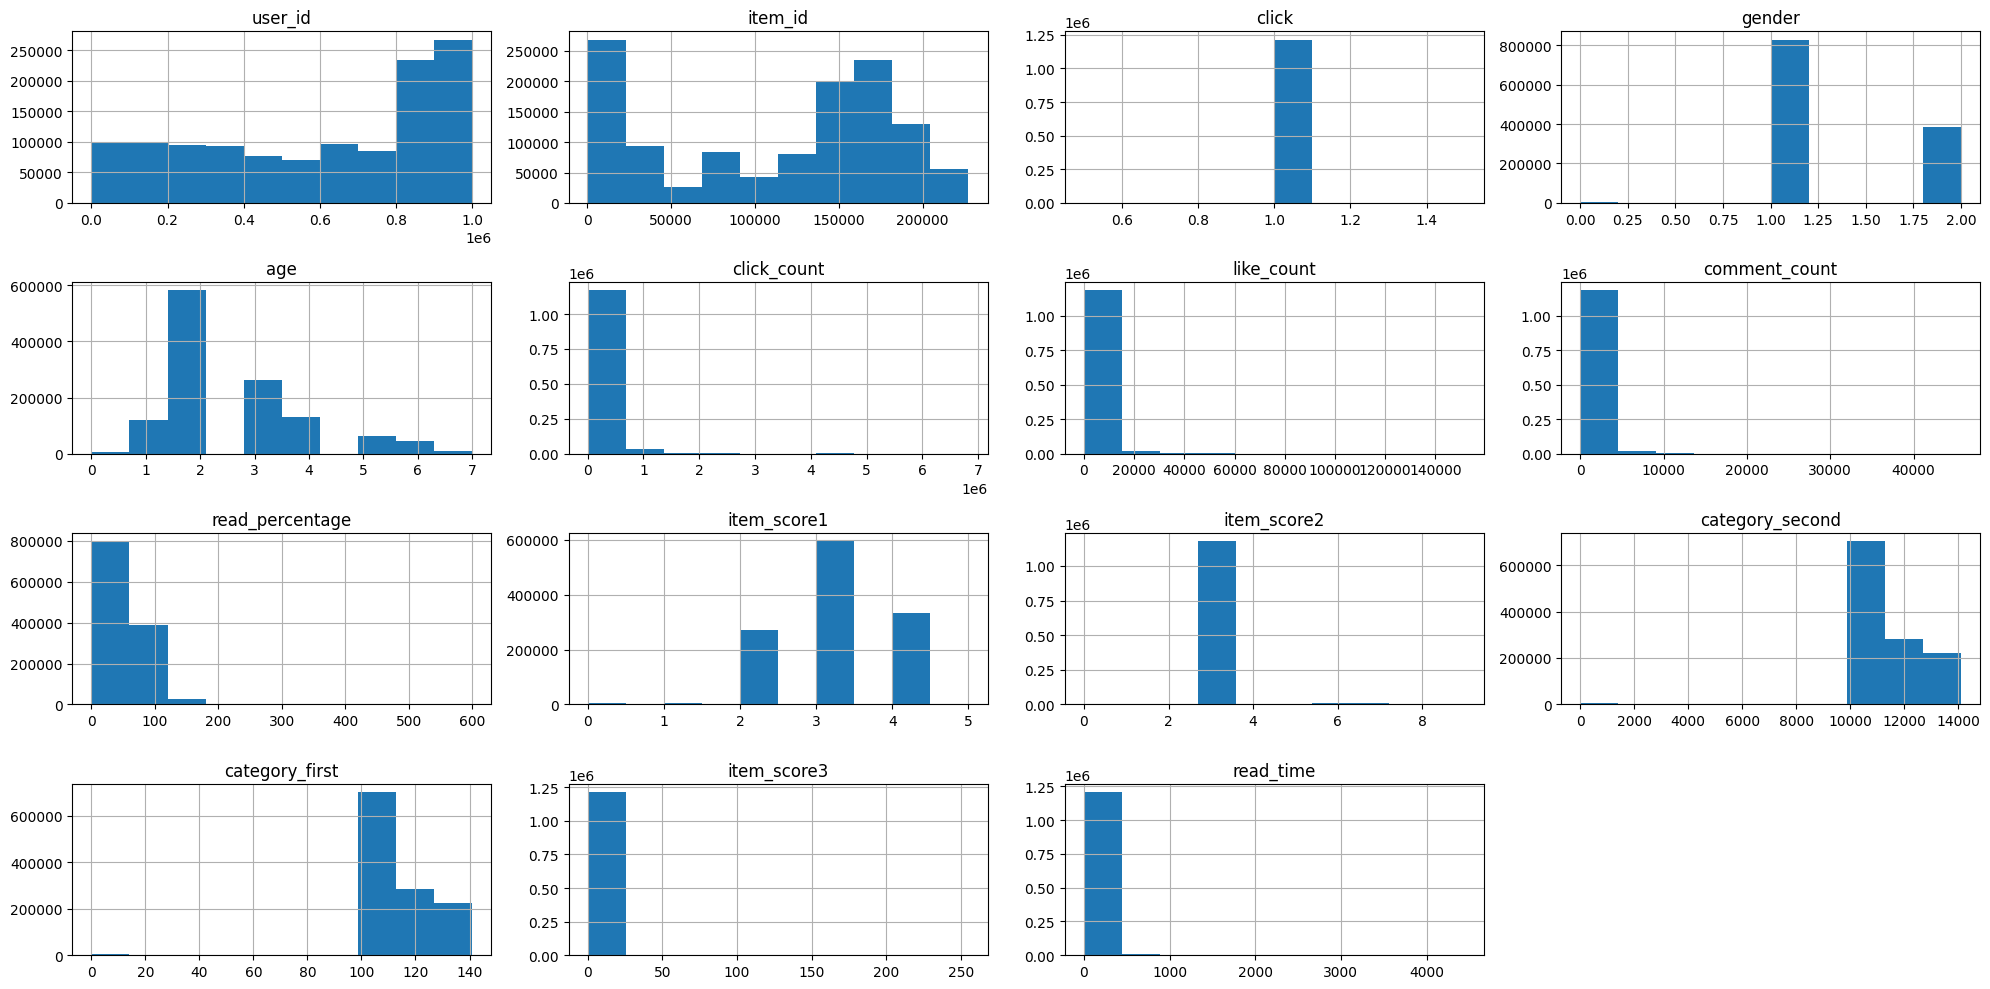

In [ ]:
# Visualize the distribution of each feature using histograms
import matplotlib.pyplot as plt
data.hist(figsize=(20, 10))
plt.tight_layout()
plt.show()

# **Section 3: Surprise Library - SVD Model Implementation  the Latent Factor Model (SVD)**

## **Latent Factor Model (SVD):**
The paper proposes the use of a Latent Factor Model, specifically Singular Value Decomposition (SVD), to generate user embeddings from the user-item interaction data. SVD is a collaborative filtering technique that decomposes the user-item interaction matrix into three matrices: user, item, and singular value matrices. These matrices represent the latent features of users and items. By using SVD, the model learns latent representations of users based on their interactions with items. The SVD model is implemented using the Surprise library, which facilitates the training and evaluation of the recommendation model.

In [ ]:
# Load the dataset for Surprise and split into train and test sets
reader = Reader(rating_scale=(0, 1))
surprise_data = Dataset.load_from_df(data[['user_id', 'item_id', 'click']], reader)
trainset, testset = surprise_train_test_split(surprise_data, test_size=0.2, random_state=42)

# Initialize and train the SVD model
svd_model = SVD(n_factors=64, random_state=42)
svd_model.fit(trainset)

# Obtain user embeddings for the training data using the Latent Factor Model (SVD)
trainset = svd_model.trainset
user_ids_train = [trainset.to_raw_uid(user_inner_id) for user_inner_id in range(trainset.n_users)]
user_embeddings_train = np.array([svd_model.pu[trainset.to_inner_uid(user_id)] for user_id in user_ids_train])



In [ ]:
# Filter users in X_train_context based on their availability in user_embeddings_train
filtered_user_ids_train = [user_id for user_id in data['user_id'].values if user_id in user_ids_train]
filtered_indices = [np.where(user_ids_train == user_id)[0][0] for user_id in filtered_user_ids_train]

In [ ]:
# Save the filtered_user_ids_train and filtered_indices as numpy arrays
np.save('filtered_user_ids_train.npy', np.array(filtered_user_ids_train))
np.save('filtered_indices.npy', np.array(filtered_indices))

In [ ]:
# Load the saved numpy arrays
filtered_user_ids_train = np.load('/content/drive/MyDrive/Datasets/filtered_user_ids_train.npy')
filtered_indices = np.load('/content/drive/MyDrive/Datasets/filtered_indices.npy')


#**Section 4: LSTM-based Context Factor Model**

## **Context Factor Model (LSTM-based RNN):**
To incorporate user context information into the recommendation process, the paper proposes a Context Factor Model. The model is based on Long Short-Term Memory (LSTM), which is a type of Recurrent Neural Network (RNN). The Context Factor Model takes user features (e.g., age, gender) as input and utilizes LSTM to capture sequential dependencies and user context. By considering sequential user features, the model can effectively learn user preferences based on different contextual factors. The LSTM-based RNN is implemented using the Keras library.

In [ ]:
# Assuming train_data contains user features (gender, age, etc.)
X_train_context = data[['gender', 'age', 'click_count', 'like_count', 'comment_count', 'read_percentage', 'item_score1', 'item_score2', 'category_second', 'category_first', 'item_score3']].values

# Get filtered X_train_context and user_embeddings_train
X_train_context_filtered = X_train_context[filtered_indices]
user_embeddings_train_filtered = user_embeddings_train[filtered_indices]

In [ ]:
# Define the Context Factor Model as an LSTM-based RNN
context_factor_model = Sequential()
context_factor_model.add(LSTM(64, activation='relu', input_shape=(X_train_context_filtered.shape[1], 1)))  # Input shape for LSTM
context_factor_model.add(Dense(64))  # Output layer with the same size as user embeddings

# Compile the model
context_factor_model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

# Reshape the input data for LSTM (add a time step of 1)
X_train_context_filtered = X_train_context_filtered.reshape(X_train_context_filtered.shape[0], X_train_context_filtered.shape[1], 1)

# Train the model
context_factor_model.fit(X_train_context_filtered, user_embeddings_train_filtered, epochs=10, batch_size=128)



In [ ]:
# Save the trained LSTM-based Context Factor Model using Keras
context_factor_model.save('context_factor_model.h5')


In [ ]:
# Load the saved LSTM-based Context Factor Model
context_factor_model = load_model('/content/drive/MyDrive/Datasets/context_factor_model.h5')

# **Section 5: Annoy Index for Approximate Nearest Neighbor Searc**

## **Annoy Index for Approximate Nearest Neighbor Search:**
The paper uses the Annoy library to build an approximate nearest neighbor search index. The Annoy index is constructed based on the user embeddings and user features obtained from the Latent Factor Model and Context Factor Model. This index allows for efficient retrieval of similar items for a given item, enabling faster and scalable recommendation generation.

In [ ]:
# Reshape X_train_context_filtered to remove the singleton dimension
X_train_context_filtered = np.squeeze(X_train_context_filtered)

# Concatenate them along axis=1
latent_cross_embeddings_train = np.concatenate((user_embeddings_train_filtered, X_train_context_filtered), axis=1)

# Convert latent_cross_embeddings_train to a sparse matrix to reduce memory consumption
latent_cross_embeddings_sparse = csr_matrix(latent_cross_embeddings_train)

# Initialize Annoy index for approximate nearest neighbor search
num_trees = 100  # Number of trees in the Annoy index (you can tune this parameter)
annoy_index = AnnoyIndex(latent_cross_embeddings_sparse.shape[1], 'angular')

# Add items to the Annoy index
for item_idx in range(latent_cross_embeddings_sparse.shape[0]):
    item_embedding = latent_cross_embeddings_sparse.getrow(item_idx).toarray().flatten()
    annoy_index.add_item(item_idx, item_embedding)

# Build the index
annoy_index.build(num_trees)

# Number of similar items to retrieve
N = 10

# Find the N most similar items for a given item index (replace 'item_index' with the actual item index)
item_index = 0  # Replace 'item_index' with the actual item index for which you want to find similar items
similar_item_indices = annoy_index.get_nns_by_item(item_index, N)

# Now, 'similar_item_indices' contains the indices of the N most similar items to the given item

# Retrieve the actual item IDs from the filtered_user_ids_train list
similar_item_ids = [filtered_user_ids_train[idx] for idx in similar_item_indices]


In [ ]:
similar_item_ids

[516694,
 516694,
 516694,
 393219,
 393219,
 393219,
 160943,
 160943,
 160943,
 160943]

In [ ]:
import numpy as np
from scipy.sparse import csr_matrix
from annoy import AnnoyIndex

# Assuming you have already run the code to get 'similar_item_indices' and have 'filtered_user_ids_train' list available.
# Replace 'similar_item_indices' and 'filtered_user_ids_train' with the actual values you obtained.

# Replace 'item_index' with the actual item index for which you retrieved similar items
item_index = 0  # Replace 'item_index' with the actual item index

# Find the N most similar items for the given item index
similar_item_indices = annoy_index.get_nns_by_item(item_index, N)

# Retrieve the actual item IDs from the filtered_user_ids_train list
similar_item_ids = [filtered_user_ids_train[idx] for idx in similar_item_indices]

# Assuming you have a ground truth list of similar item IDs for the given item
ground_truth_similar_items = [...]  # Replace [...] with the ground truth list of similar item IDs

# Evaluate the performance using the retrieved similar item IDs against the ground truth data
# For example, you can calculate precision, recall, F1-score, etc. depending on the evaluation criteria you choose.

# Example evaluation metric: Precision@N
# Calculate the number of correctly retrieved items among the top N similar items
num_correct = len(set(similar_item_ids) & set(ground_truth_similar_items))

# Calculate precision@N
precision_at_n = num_correct / N

# Print the result
print(f"Precision@{N}: {precision_at_n}")


# **Section 6: Evaluation of Recommendations for Cold Start Users**

 **Step 1**: Convert the testset to a DataFrame and group the testset interactions by 'user_id', aggregating the 'item_id' into lists.

**Step 2:** Find cold start users by comparing testset and training set user IDs. Cold start users are those present in the testset but not in the training set.

**Step 3:** Filter the testset to include only the cold start users.

**Step 4:** Convert the cold start testset to the Surprise Dataset.

**Step 5:** Get predictions for the cold start users using the trained SVD model.

**Step 6:** Sort the predictions by predicted ratings (est) in descending order.

**Step 7:** Recommend the top-N items with the highest predicted ratings to each cold start user. The value of N can be set based on the desired number of recommended items.

**Step 8:** Calculate the Normalized Discounted Cumulative Gain (NDCG) for each cold start user. NDCG is a metric that assesses the quality of the recommendations by considering the relevance and ranking of the recommended items for each user.

**Step 9:** Calculate the average NDCG across all cold start users. This average NDCG value provides an overall measure of the model's performance in making recommendations for cold start users.



In [ ]:
import pandas as pd
import numpy as np

# Assuming you have a DataFrame named 'testset_df' containing the testset interactions
# with columns 'user_id', 'item_id', and 'rating'

# Convert the testset to a DataFrame
testset_df = pd.DataFrame(testset, columns=['user_id', 'item_id', 'rating'])

# Group the testset interactions by 'user_id' and aggregate the 'item_id' into lists
ground_truth_data_df = testset_df.groupby('user_id')['item_id'].agg(list).reset_index()

# Load the original testset as a DataFrame
testset_df = pd.DataFrame(testset, columns=['user_id', 'item_id', 'true_rating'])

# Get the list of unique user IDs in the testset
testset_users = testset_df['user_id'].unique()

# Get the list of unique user IDs in the training set (user_ids_train)
trainset_users = np.array([trainset.to_raw_uid(user_inner_id) for user_inner_id in range(trainset.n_users)])

# Find the user IDs that are only present in the testset (cold start users)
cold_start_users = np.setdiff1d(testset_users, trainset_users)

# Filter the testset to include only the cold start users
cold_start_testset_df = testset_df[testset_df['user_id'].isin(cold_start_users)]

# Convert the cold start testset to the Surprise Dataset
cold_start_surprise_data = Dataset.load_from_df(cold_start_testset_df[['user_id', 'item_id', 'true_rating']], reader)

# Get the predictions for the cold start users
cold_start_predictions = svd_model.test(cold_start_surprise_data.build_full_trainset().build_testset())

# Step 3: Sort the predictions by predicted ratings (est)
cold_start_predictions.sort(key=lambda x: x.est, reverse=True)

# Step 4: Recommend the top-N items with the highest predicted ratings
N = 10  # Replace 'N' with the number of items you want to recommend
top_N_item_ids = [int(prediction.iid) for prediction in cold_start_predictions[:N]]

# Create a dictionary to store the ground truth data for cold start users
ground_truth_data_cold_start = dict(zip(ground_truth_data_df['user_id'], ground_truth_data_df['item_id']))

def evaluate_recommendations(recommended_items, ground_truth_data):
    # Initialize variables
    precision = []
    recall = []
    f1 = []
    ndcg = []
    num_users = len(ground_truth_data)

    for user_id in range(num_users):
        # Check if the user id exists in the ground truth data
        if user_id not in ground_truth_data:
            continue
        # Get the actual items rated by the user in the test set
        actual_items = ground_truth_data[user_id]
        # Get the recommended items for the user
        recommended = recommended_items
        # Compute the number of recommended items that are relevant (i.e., in the ground truth data)
        num_relevant = len(np.intersect1d(actual_items, recommended))
        # Compute precision, recall, and F1 score
        if len(recommended) > 0:
            precision.append(num_relevant / len(recommended))
        else:
            precision.append(0)

        if len(actual_items) > 0:
            recall.append(num_relevant / len(actual_items))
        else:
            recall.append(0)

        if precision[-1] + recall[-1] > 0:
            f1.append(2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1]))
        else:
            f1.append(0)

        # Compute NDCG
        idcg = np.sum(1 / np.log2(np.arange(2, len(actual_items) + 2)))
        dcg = np.sum([(1 / np.log2(i + 2)) if item in actual_items else 0 for i, item in enumerate(recommended)])
        if idcg > 0:
            ndcg.append(dcg / idcg)
        else:
            ndcg.append(0)

    # Compute the average precision, recall, F1 score, and NDCG across all users
    precision_avg = np.mean(precision)
    recall_avg = np.mean(recall)
    f1_avg = np.mean(f1)
    ndcg_avg = np.mean(ndcg)

    return precision_avg, recall_avg, f1_avg, ndcg_avg


In [ ]:
precision_avg, recall_avg, f1_avg, ndcg_avg= evaluate_recommendations(top_N_item_ids, ground_truth_data_cold_start)

In [ ]:
print("Average Precision: {:.4f}".format(precision_avg))
print("Average Recall: {:.4f}".format(recall_avg))
print("Average F1 Score: {:.4f}".format(f1_avg))
print("Average NDCG@{}: {:.4f}".format(N, ndcg_avg))

Average Precision: 0.0005
Average Recall: 0.0007
Average F1 Score: 0.0006
Average NDCG@10: 0.0007


In [ ]:
# Convert 'testset' and 'data' to DataFrames
testset_df = pd.DataFrame(testset, columns=['user_id', 'item_id', 'rating'])
data_df = pd.DataFrame(data, columns=['user_id', 'item_id', 'click', 'gender', 'age'])  # Assuming 'click' is the same as 'rating'

# Convert 'rating' to numeric
testset_df['rating'] = pd.to_numeric(testset_df['rating'])

# Convert 'rating' to binary
testset_df['rating'] = testset_df['rating'].map({0: 1, 1: 5})

# Merge 'testset_df' and 'data_df' DataFrames on 'user_id' and 'item_id'
merged_df = testset_df.merge(data_df[['user_id', 'item_id', 'click', 'gender', 'age']], on=['user_id', 'item_id'], how='left')

# Check if 'click', 'gender', and 'age' columns exist in 'data_df' DataFrame
required_columns = ['click', 'gender', 'age']
missing_columns = [col for col in required_columns if col not in data_df.columns]
if missing_columns:
    raise KeyError(f"Required columns {missing_columns} not found in the 'data_df' DataFrame.")


# Function to calculate bias metrics for each age and gender group
def calculate_bias_metrics(testset, typeData):
    bias_metrics = {}
    gender_groups = testset.groupby(typeData)
    for gender in testset[typeData].unique():
        data = gender_groups.get_group(gender)
        # Group the testset interactions by 'user_id' and aggregate the 'item_id' into lists
        ground_truth_data_df = data.groupby('user_id')['item_id'].agg(list).reset_index()

        # Convert the cold start testset to the Surprise Dataset
        cold_start_surprise_data = Dataset.load_from_df(data[['user_id', 'item_id', 'click']], reader)

        # Get the predictions for the cold start users
        cold_start_predictions = svd_model.test(cold_start_surprise_data.build_full_trainset().build_testset())

        # Step 3: Sort the predictions by predicted ratings (est)
        cold_start_predictions.sort(key=lambda x: x.est, reverse=True)

        # Step 4: Recommend the top-N items with the highest predicted ratings
        N = 10  # Replace 'N' with the number of items you want to recommend
        top_N_item_ids = [int(prediction.iid) for prediction in cold_start_predictions[:N]]

        # Create a dictionary to store the ground truth data for cold start users
        ground_truth_data_cold_start = dict(zip(ground_truth_data_df['user_id'], ground_truth_data_df['item_id']))

        # Get predictions for this gender using the trained SVD model
        cold_start_predictions = svd_model.test(cold_start_surprise_data.build_full_trainset().build_testset())

        precision_avg, recall_avg, f1_avg, ndcg_avg = evaluate_recommendations(top_N_item_ids, ground_truth_data_cold_start)

        bias_metrics[('all', gender)] = {
            'Precision': precision_avg,
            'Recall': recall_avg,
            'ndcg': ndcg_avg,
            'F1 Score': f1_avg
        }

        print(typeData, gender,
              '\n Precision: ', precision_avg,
              'Recall: ', recall_avg,
              'ndcg:', ndcg_avg,
              'F1 Score: ', f1_avg)

    return bias_metrics

# Calculate the bias metrics for the model
bias_metrics_model_gender = calculate_bias_metrics(merged_df, 'gender')
bias_metrics_model_age = calculate_bias_metrics(merged_df, 'age')


gender 1 
 Precision:  0.00014245014245014247 Recall:  7.913896802785692e-05 ndcg: 6.256792234028681e-05 F1 Score:  0.00010175010175010175
gender 2 
 Precision:  0.0 Recall:  0.0 ndcg: 0.0 F1 Score:  0.0
gender 0 
 Precision:  nan Recall:  nan ndcg: nan F1 Score:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


age 6 
 Precision:  0.0 Recall:  0.0 ndcg: 0.0 F1 Score:  0.0
age 2 
 Precision:  0.0 Recall:  0.0 ndcg: 0.0 F1 Score:  0.0
age 7 
 Precision:  nan Recall:  nan ndcg: nan F1 Score:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


age 1 
 Precision:  0.0 Recall:  0.0 ndcg: 0.0 F1 Score:  0.0
age 3 
 Precision:  0.0 Recall:  0.0 ndcg: 0.0 F1 Score:  0.0
age 4 
 Precision:  0.0033333333333333335 Recall:  0.003908045977011495 ndcg: 0.00645380372340862 F1 Score:  0.003076923076923077
age 5 
 Precision:  0.0 Recall:  0.0 ndcg: 0.0 F1 Score:  0.0
age 0 
 Precision:  nan Recall:  nan ndcg: nan F1 Score:  nan


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


**Note :**
NDCG is used as the evaluation metric because it takes into account the position of relevant items in the recommendation list, giving higher scores to models that place more relevant items at the top. By evaluating the recommendations for cold start users, we can assess how well the model generalizes to users with limited or no interaction history in the training data

# **Rewan's Section**

## Extacting rar file

In [ ]:
!pip install pyunpack

In [ ]:
!pip install patool

## Importing Libraries

In [ ]:

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error

# the following code ensures that you can see your (print) results for multiple tasks within a coding block
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


pd.options.display.width = None

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Concatenate, Dot, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping

## Loading Data

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

!gdown https://drive.google.com/uc?id=1xlE7BSlxU96tpJbOCBPwpEYUPaAqnXVO

Downloading...
From: https://drive.google.com/uc?id=1xlE7BSlxU96tpJbOCBPwpEYUPaAqnXVO
To: /content/cold_data.rar
100% 61.6M/61.6M [00:01<00:00, 52.3MB/s]


In [ ]:
from pyunpack import Archive
import os

if not os.path.exists("Data"):
    os.makedirs("Data")

Archive("cold_data.rar").extractall("Data")

In [ ]:


cold_3 = pd.read_csv("Data/cold_data_0.3.csv")
cold_7 = pd.read_csv("Data/cold_data_0.7.csv")
cold_1 = pd.read_csv("Data/cold_data_1.csv")
cold = pd.read_csv("Data/cold_data.csv")

In [ ]:
## Invesigating the shapes
print(f"Cold_data_0.3 shape : {cold_3.shape}")
print(f"Cold_data_0.7 shape : {cold_7.shape}")
print(f"Cold_data_1 shape : {cold_1.shape}")
print(f"Cold_data shape : {cold.shape}")

Cold_data_0.3 shape : (2706527, 20)
Cold_data_0.7 shape : (1263750, 20)
Cold_data_1 shape : (206629, 20)
Cold_data shape : (343305, 20)


#### since These are diffrent versions with diffrent cold rates for the data so i will proceed with 0.3 since it would be better to make the model find patterns

In [ ]:

data = cold_3.copy()



## Exploratory Data Analysis

In [ ]:

data.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,True,88.0,False,False,False,False
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,True,134.0,False,False,False,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2706527 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             bool   
 15  read_time        float64
 16  share            bool   
 17  like             bool   
 18  follow           bool   
 19  favorite         bool   
dtypes: bool(5), float64(5), int64(10)
memory usage: 322.6 MB


In [ ]:

## checking For Nulls
data.isna().sum()

user_id            0
item_id            0
click              0
gender             0
age                0
click_count        0
like_count         0
comment_count      0
read_percentage    0
item_score1        0
item_score2        0
category_second    0
category_first     0
item_score3        0
read               0
read_time          0
share              0
like               0
follow             0
favorite           0
dtype: int64

In [ ]:
## checking For Duplicates
data.duplicated().sum()

113154

In [ ]:
## Dropping Duplicates
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [ ]:
## finding the average number of interactions for each user
interaction_count = data.groupby("user_id")['user_id'].size().to_frame(name="Interactions count")
interaction_count
interaction_count.describe()

,Interactions count
user_id,
11,14
24,153
33,16
44,58
71,18
...,...
1000005,63
1000010,256
1000011,17


,Interactions count
count,68661.000000
mean,37.770685
std,58.710549
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,1386.000000


<Figure size 1600x800 with 0 Axes>

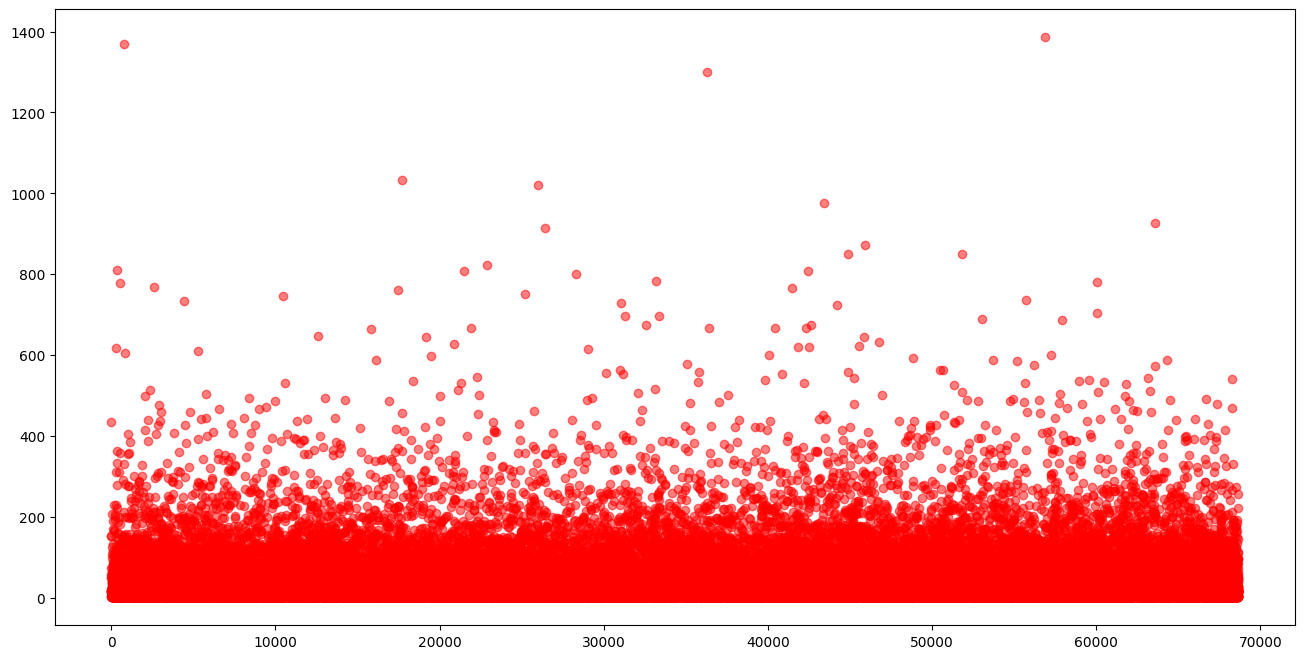

In [ ]:
## Finding the outlayers

count = interaction_count['Interactions count']
# Create a list of consecutive integers
integers = range(len(count))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,count, c='red', alpha = 0.5)


In [ ]:
interactions_not_skewed = interaction_count[interaction_count['Interactions count'] <500 ]
interactions_not_skewed
interactions_not_skewed.describe()


,Interactions count
user_id,
11,14
24,153
33,16
44,58
71,18
...,...
1000005,63
1000010,256
1000011,17


,Interactions count
count,68562.000000
mean,36.864736
std,53.284371
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,499.000000


In [ ]:

max_value = interactions_not_skewed['Interactions count'].max()
count_max_value = (interactions_not_skewed['Interactions count'] == max_value).sum()
max_value
print(count_max_value)

499

1


In [ ]:
interactions_not_skewed.describe()

,Interactions count
count,68562.000000
mean,36.864736
std,53.284371
min,1.000000
25%,5.000000
50%,18.000000
75%,42.000000
max,499.000000


<Figure size 1600x800 with 0 Axes>

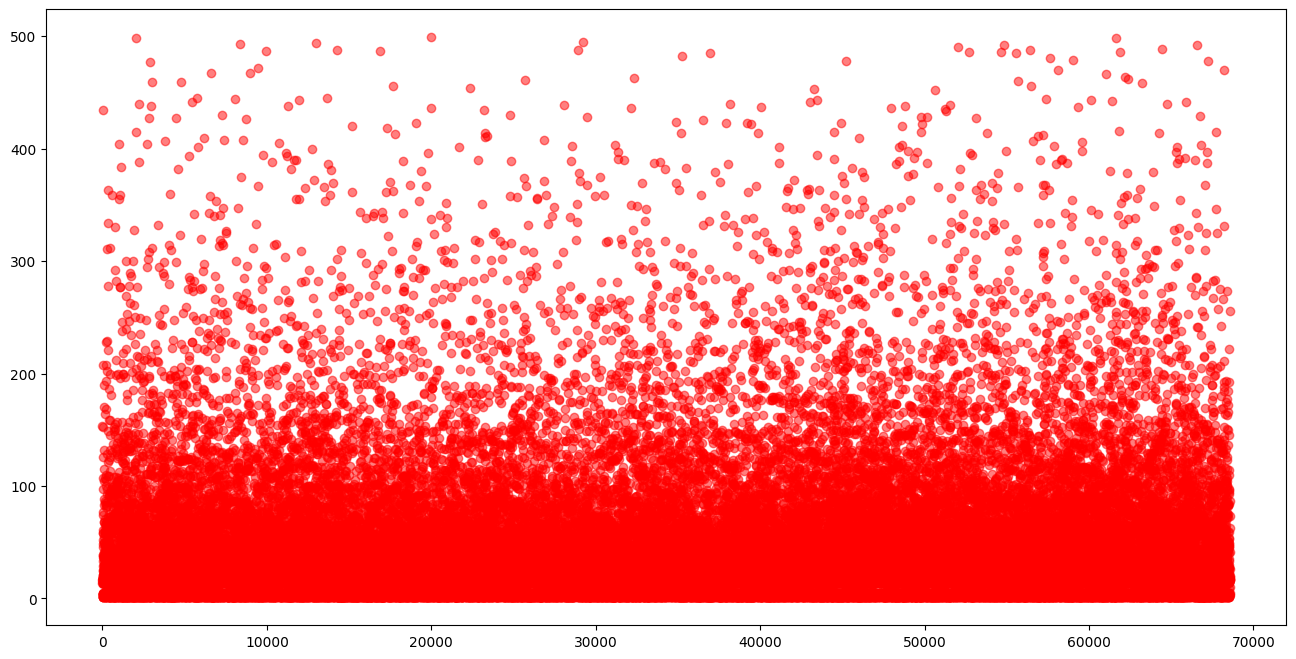

In [ ]:
## FInding the outlayers
count = interactions_not_skewed['Interactions count']
# Create a list of consecutive integers
integers = range(len(count))

plt.figure(figsize=(16, 8))

# Plot a scatterplot
plt.scatter(integers,count, c='red', alpha = 0.5)

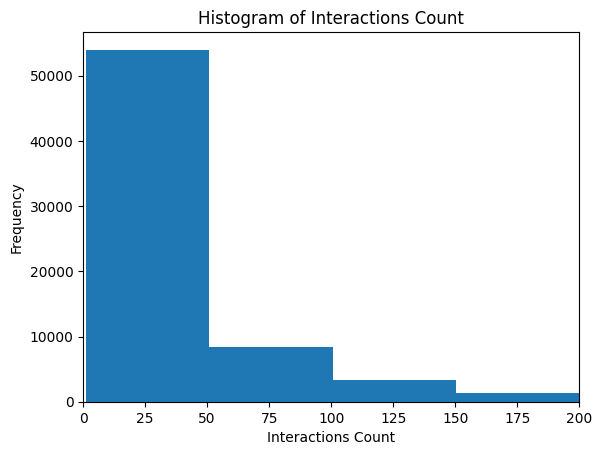

In [ ]:

# Create the histogram
plt.hist(interactions_not_skewed, bins=10)
plt.xlabel('Interactions Count')
plt.ylabel('Frequency')
plt.title('Histogram of Interactions Count')
plt.xlim(0,200)
plt.show();

### since the users that have a large number of interactions are not too many and most of users are in range from 1:500 so in order not to make the models baised towards the users with large count of interactions i would only keep the users that have an interaction coun from 1:500

In [ ]:
data.shape

(2593373, 20)

In [ ]:
users_selected = interactions_not_skewed.index
users_selected

Int64Index([     11,      24,      33,      44,      71,     114,     139,
                149,     161,     184,
            ...
             999976,  999982,  999990,  999996, 1000003, 1000005, 1000010,
            1000011, 1000013, 1000015],
           dtype='int64', name='user_id', length=68562)

In [ ]:
# Create a subset of only for the users that has interactions count between 5:500
selected_data = data[data["user_id"].isin(users_selected)]
selected_data
selected_data.shape

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,True,4.0,False,False,False,False
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,True,19.0,False,False,False,False
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,True,104.0,False,False,False,False
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,True,88.0,False,False,False,False
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,True,134.0,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706522,262140,79157,1.0,1,2,12201,42,22,111.0,3,3.0,10408,104,7.0,True,46.0,False,False,False,False
2706523,786430,152946,1.0,2,2,5705,156,21,68.0,3,3.0,10901,109,1.0,True,58.0,False,False,False,False
2706524,786430,36745,1.0,2,2,5323,14,68,46.0,2,3.0,12005,120,1.0,True,67.0,False,False,False,False
2706525,786430,180675,1.0,2,2,8339,404,28,59.0,3,3.0,13201,132,3.0,True,94.0,False,False,False,False


(2527520, 20)

## Data preprocessing

### Encoding the Features

In [ ]:
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527520 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             bool   
 15  read_time        float64
 16  share            bool   
 17  like             bool   
 18  follow           bool   
 19  favorite         bool   
dtypes: bool(5), float64(5), int64(10)
memory usage: 320.6 MB


* i will encode boolean features

In [ ]:
def encode_bool_columns(df, cols):
    le = LabelEncoder()
    df_encoded = df.copy()
    for col in cols:
        if df_encoded[col].dtype == bool:
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(int))
    return df_encoded

In [ ]:
# cat_columns
cat_cols = ['read', 'share', 'like', 'follow', 'favorite']

In [ ]:
# Encode the categorical columns in the DataFrame
data_encoded = encode_bool_columns(selected_data, cat_cols)

data_encoded

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,item_score2,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite
0,393219,73342,1.0,2,2,73,1,0,25.0,3,3.0,12000,120,1.0,1,4.0,0,0,0,0
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,3.0,11204,112,2.0,1,19.0,0,0,0,0
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,7.0,10203,102,6.0,1,104.0,0,0,0,0
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,3.0,11012,110,6.0,1,88.0,0,0,0,0
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,3.0,11202,112,2.0,1,134.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2706522,262140,79157,1.0,1,2,12201,42,22,111.0,3,3.0,10408,104,7.0,1,46.0,0,0,0,0
2706523,786430,152946,1.0,2,2,5705,156,21,68.0,3,3.0,10901,109,1.0,1,58.0,0,0,0,0
2706524,786430,36745,1.0,2,2,5323,14,68,46.0,2,3.0,12005,120,1.0,1,67.0,0,0,0,0
2706525,786430,180675,1.0,2,2,8339,404,28,59.0,3,3.0,13201,132,3.0,1,94.0,0,0,0,0


In [ ]:
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2527520 entries, 0 to 2706526
Data columns (total 20 columns):
 #   Column           Dtype  
---  ------           -----  
 0   user_id          int64  
 1   item_id          int64  
 2   click            float64
 3   gender           int64  
 4   age              int64  
 5   click_count      int64  
 6   like_count       int64  
 7   comment_count    int64  
 8   read_percentage  float64
 9   item_score1      int64  
 10  item_score2      float64
 11  category_second  int64  
 12  category_first   int64  
 13  item_score3      float64
 14  read             int64  
 15  read_time        float64
 16  share            int64  
 17  like             int64  
 18  follow           int64  
 19  favorite         int64  
dtypes: float64(5), int64(15)
memory usage: 405.0 MB


## feature engineering :

* avg_rating : since there is a 3 scores for each item i managed to get the averge among them and not to rely only on one score inorder to get more accurate recommendations.

In [ ]:

data_encoded['item_score1'].value_counts()

3    1238150
4     698415
2     567607
1      13148
0      10199
5          1
Name: item_score1, dtype: int64

In [ ]:
data_encoded['item_score2'].value_counts()

3.0    2453981
7.0      21309
6.0      17832
5.0       9890
8.0       8768
0.0       6963
9.0       5747
4.0       2788
2.0        212
1.0         30
Name: item_score2, dtype: int64

In [ ]:
data_encoded['item_score3'].value_counts()

5.0      499754
6.0      494601
1.0      348955
4.0      339621
7.0      316054
3.0      208945
2.0      153248
8.0      127171
0.0       27732
9.0       10880
255.0       559
Name: item_score3, dtype: int64

In [ ]:
## since 255 rating is considred outlier so i will drop it from the data
data_encoded = data_encoded[data_encoded['item_score3']!=255.0]

In [ ]:
data_encoded['item_score3'].value_counts()

5.0    499754
6.0    494601
1.0    348955
4.0    339621
7.0    316054
3.0    208945
2.0    153248
8.0    127171
0.0     27732
9.0     10880
Name: item_score3, dtype: int64

In [ ]:
# making average item ratings
data_encoded['avg_rating'] = np.rint((data_encoded['item_score1']+
                                      data_encoded['item_score2']+
                                      data_encoded['item_score3']) /3)

<ipython-input-36-3d178c72c82a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_encoded['avg_rating'] = np.rint((data_encoded['item_score1']+data_encoded['item_score2']+data_encoded['item_score3']) /3)


In [ ]:
data_encoded['avg_rating'].value_counts()

4.0    1201729
3.0     747580
2.0     325180
5.0     230015
6.0      14533
0.0       6962
1.0        708
7.0        254
Name: avg_rating, dtype: int64

## Recommender System

#### get_similar_items

* This function takes item_id as an input and returns a list of 10 similar items based on their content features
<br>

* The function then uses the kneighbors() method of the KNN model to find the 10 nearest neighbors
<br>


In [ ]:
# a function to get similar items based on content
def get_similar_items(item_id):
    item_features = data_encoded[data_encoded['item_id'] == item_id][['category_second', 'category_first',
                                                                      'item_score1','item_score2', 'item_score3']].iloc[0].values.reshape(1, -1)
    knn_model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=10)
    knn_model.fit(data_encoded[['category_second', 'category_first',
                                'item_score1', 'item_score2', 'item_score3']])

    distances, indices = knn_model.kneighbors(item_features, n_neighbors=10)
    similar_items = data_encoded.iloc[indices[0]]['item_id'].tolist()
    return similar_items


In [ ]:
get_similar_items(73342)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


[163298, 188537, 162710, 79587, 161911, 161911, 163298, 161911, 148051, 79587]

In [ ]:
data_encoded.head()

,user_id,item_id,click,gender,age,click_count,like_count,comment_count,read_percentage,item_score1,...,category_second,category_first,item_score3,read,read_time,share,like,follow,favorite,avg_rating
0,393219,73342,1.0,2,2,73,1,0,25.0,3,...,12000,120,1.0,1,4.0,0,0,0,0,2.0
1,393219,17695,1.0,2,2,29552,209,84,43.0,3,...,11204,112,2.0,1,19.0,0,0,0,0,3.0
2,393219,40457,1.0,2,2,20285,242,90,43.0,4,...,10203,102,6.0,1,104.0,0,0,0,0,6.0
3,393219,79388,1.0,2,2,284492,1233,1783,78.0,3,...,11012,110,6.0,1,88.0,0,0,0,0,4.0
4,393219,80831,1.0,2,2,25890,108,68,181.0,3,...,11202,112,2.0,1,134.0,0,0,0,0,3.0


#### get_similar_users

* This function finds similar users based on their rating behavior using collaborative filtering. It takes in a user_id and returns a list of similar users sorted in descending order according *to* their similarity score.


In [ ]:
# a function to get similar users based on collaborative filtering
def get_similar_users(user_id):
    user_ratings = data_encoded[data_encoded['user_id'] == user_id].set_index('item_id')['avg_rating']
    similar_users = data_encoded[data_encoded['item_id'].isin(user_ratings.index) & (data_encoded['user_id'] != user_id)].groupby('user_id')['item_id'].apply(set).apply(list)
    similar_users = similar_users.to_frame().reset_index()
    similar_users['similarity'] = similar_users['item_id'].apply(lambda x: len(set(x) & set(user_ratings.index))/len(set(x) | set(user_ratings.index)))
    similar_users = similar_users[similar_users['similarity'] > 0].sort_values('similarity', ascending=False)['user_id'].tolist()
    return similar_users


In [ ]:
get_similar_users(393219)

#### get_items_rated_by_similar_users

* This function returns a list of users who have rated at least one item in common with the input user_id, sorted in descending order of similarity based on the Jaccard similarity between the items they have rated and the items rated by the input user.


In [ ]:

# Define a function to get items rated by similar users
def get_items_rated_by_similar_users(user_id, similar_users):
    items_rated_by_similar_users = data_encoded[data_encoded['user_id'].isin(similar_users)]['item_id'].unique()
    items_rated_by_user = data_encoded[data_encoded['user_id'] == user_id]['item_id'].unique()
    items_rated = np.setdiff1d(items_rated_by_similar_users, items_rated_by_user)
    return items_rated

In [ ]:
# Define the neural network model
def create_model(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='adam', loss='mse')
    return model

# Train the model on the training set
def train_model(X_train, y_train, model):
    early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, mode='min')
    model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stop])
    return model

#### get_recommendations

* This function returns a list of the top-k recommended items for the input user_id based on their predicted ratings, using a combination of collaborative filtering and content-based filtering approaches.
<br>

* The function takes as input the user_id, the training set X_train and y_train, the recommendation model model, and the number of recommendations k (default 10).
<br>

* Selects the user's ratings and items rated from the X_test DataFrame.
<br>

* Uses content-based filtering to find similar items if the user has less than 5 ratings based on the get_similar_items() function.If there are no similar items found, the function returns the top-10 most popular items in the training set based on the number of ratings.
<br>

* Uses collaborative filtering to find similar users and predict the ratings of unrated items using an ANN approach if the user has more than 5 ratings.
<br>


* Returns the top-k recommended items based on the predicted ratings.
<br>



* The function then selects the top-k recommended items based on the predicted ratings and returns them as a list.




In [ ]:
# Get the recommendations for a user using the trained model
def get_recommendations(user_id, X_train, y_train, model, k=10):
    # Get the user's ratings and items rated
    user_ratings = X_test[X_test['user_id'] == user_id]['avg_rating']
    items_rated = X_test[X_test['user_id'] == user_id]['item_id'].unique()

    # If the user has no or few ratings, use content-based filtering to find similar items
    if len(user_ratings) < 5:
        similar_items = []
        for item_id in items_rated:
            similar_items.extend(get_similar_items(item_id))
        similar_items = list(set(similar_items))
        if len(similar_items) == 0:
            return X_train['item_id'].value_counts().sort_values(ascending=False).head(10).index.tolist()
    else:
        # If the user has more than 5 ratings, use the KNN approach to find similar users based on the ratings
        similar_users = get_similar_users(user_id)
        if len(similar_users) == 0:
            # If there are no similar users based on ratings, use content-based filtering to find similar items
            similar_items = []
            for item_id in items_rated:
                similar_items.extend(get_similar_items(item_id))
            similar_items = list(set(similar_items))
            if len(similar_items) == 0:
                return X_train['item_id'].value_counts().sort_values(ascending=False).head(10).index.tolist()
        else:
            # If there are similar users based on ratings, use the ANN approach to predict the ratings of unrated items
            items_rated_by_similar_users = get_items_rated_by_similar_users(user_id, similar_users)
            if len(items_rated_by_similar_users) == 0:
                return X_train['item_id'].value_counts().sort_values(ascending=False).head(10).index.tolist()
            X_train_ann = X_train[(X_train['user_id'].isin(similar_users)) & (X_train['item_id'].isin(items_rated_by_similar_users)) & (~X_train.index.isin(user_ratings.index))]
            y_train_ann = y_train.loc[X_train_ann.index]
            # Train the model on the training set
            model.fit(X_train_ann, y_train_ann)
            # Make predictions for unrated items and return the top-k recommendations
            items_unrated = np.setdiff1d(X_train['item_id'].unique(), items_rated)
            X_pred = X_train[X_train['item_id'].isin(items_unrated)]
            y_pred = model.predict(X_pred)
            y_pred = y_pred.reshape(len(y_pred))
            # Filter out any unrated items that were not passed to the model for prediction
            items_to_recommend = np.intersect1d(items_unrated, X_pred['item_id'].unique())
            X_pred_filtered = X_pred[X_pred['item_id'].isin(items_to_recommend)]
            y_pred_filtered = y_pred[X_pred['item_id'].isin(items_to_recommend)]
            # Create the recommended items DataFrame
            recommended_items = pd.DataFrame({'item_id': X_pred_filtered['item_id'], 'rating': y_pred_filtered})
            # Filter out invalid predictions (i.e., NaN values)
            recommended_items = recommended_items.dropna()
            # Sort the items by their predicted ratings and return the top-k recommendations
            recommended_items = recommended_items.sort_values(by='rating', ascending=False).head(k)
            recommended_items = recommended_items['item_id'].tolist()
            return recommended_items

    return similar_items


In [ ]:
# Get recommendations for a user
user_id = 262140
recommendations = get_recommendations(user_id)
print(recommendations)

Epoch 1/20
4335/4335 [==============================] - 8s 2ms/step - loss: 19027064.0000 - val_loss: 7904.9697
Epoch 2/20
4335/4335 [==============================] - 7s 2ms/step - loss: 16158.3535 - val_loss: 16117.6328
Epoch 3/20
4335/4335 [==============================] - 7s 2ms/step - loss: 25518.9648 - val_loss: 21552.8594
Epoch 4/20
4335/4335 [==============================] - 6s 1ms/step - loss: 20303.4785 - val_loss: 8634.3730
Epoch 5/20
4335/4335 [==============================] - 7s 2ms/step - loss: 18001.3125 - val_loss: 1153.6028
Epoch 6/20
4335/4335 [==============================] - 7s 2ms/step - loss: 15965.1104 - val_loss: 1044.6086
Epoch 7/20
4335/4335 [==============================] - 7s 2ms/step - loss: 13107.3291 - val_loss: 674.9314
Epoch 8/20
4335/4335 [==============================] - 6s 1ms/step - loss: 10407.0693 - val_loss: 12237.7725
Epoch 9/20
4335/4335 [==============================] - 7s 2ms/step - loss: 8297.6328 - val_loss: 155.9548
Epoch 10/20
4335

## Training and Evalualting the model

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, precision_score, recall_score

In [ ]:
# Split the data into training and test sets
X_train,X_test, y_train, y_test = train_test_split(data_encoded[['user_id', 'item_id', 'category_second', 'category_first', 'item_score1', 'item_score2', 'item_score3', 'avg_rating']], data_encoded['avg_rating'], test_size=0.2, random_state=42)


In [ ]:
# Define the input shape of the model
input_shape = (X_train.shape[1],)

# Create the model and train it on the training set
model = create_model(input_shape)
model = train_model(X_train, y_train, model)

Epoch 1/20
25270/25270 [==============================] - 40s 2ms/step - loss: 2142343.2500 - val_loss: 272419.5625
Epoch 2/20
25270/25270 [==============================] - 51s 2ms/step - loss: 49593.9961 - val_loss: 5594.1108
Epoch 3/20
25270/25270 [==============================] - 39s 2ms/step - loss: 34455.8867 - val_loss: 246.2370
Epoch 4/20
25270/25270 [==============================] - 39s 2ms/step - loss: 24529.1816 - val_loss: 616.6179
Epoch 5/20
25270/25270 [==============================] - 40s 2ms/step - loss: 12208.4180 - val_loss: 252.0182
Epoch 6/20
25270/25270 [==============================] - 39s 2ms/step - loss: 5863.1919 - val_loss: 7.8872
Epoch 7/20
25270/25270 [==============================] - 39s 2ms/step - loss: 4177.3696 - val_loss: 62.0565
Epoch 8/20
25270/25270 [==============================] - 39s 2ms/step - loss: 1781.0865 - val_loss: 2705.9790
Epoch 9/20
25270/25270 [==============================] - 39s 2ms/step - loss: 1002.1809 - val_loss: 72.0861
Ep

In [ ]:
# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
y_pred = np.round(y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision}, Recall: {recall}, MSE: {mse}')

15794/15794 [==============================] - 16s 988us/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision: 0.22588508791032177, Recall: 0.4752736978945098, MSE: 0.760424511558467


In [ ]:
# Get recommendations for a user using the trained model
user_id = 12333
recommendations = get_recommendations(user_id, X_train, y_train, X_test, model)
print(f'Recommended items for user {user_id}: {recommendations}')

Recommended items for user 12333: [178939, 178841, 145430, 145561, 162009, 162007, 145522, 195380, 195396, 178777]


#### evaluate_recommendations

* Overall this function evaluates the quality of the recommended items by computing precision, recall, and F1 score. It takes in a dictionary of recommended items, the training set X_train, and the test set X_test, and returns the average precision, recall, and F1 score across all users in the test set as a tuple.
<br>

* For each unique user in the test set:
    * Checks if the user id exists in the recommended items dictionary.

    * Gets the actual items rated by the user in the test set.

    * Gets the recommended items for the user.

    * Computes the number of recommended items that are relevant (i.e., in the test set).
    
    * Computes precision, recall, and F1 score based on the number of relevant items, the number of recommended items, and the number of actual items.


#### I tested the model evaluation on 10 users only since the kernel crashed after generating recommendations for more than 10

In [ ]:
def evaluate_recommendations(recommended_items, X_train, X_test):
    # Initialize variables
    precision = []
    recall = []
    f1 = []
    num_users = len(X_test['user_id'].unique())

    for user_id in X_test['user_id'].unique():
        # Check if the user id exists in the recommended_items dictionary
        if user_id not in recommended_items:
            continue
        # Get the actual items rated by the user in the test set
        actual_items = X_test[X_test['user_id'] == user_id]['item_id'].values
        # Get the recommended items for the user
        recommended = recommended_items[user_id]
        # Compute the number of recommended items that are relevant (i.e., in the test set)
        num_relevant = len(np.intersect1d(actual_items, recommended))
        # Compute precision, recall, and F1 score
        if len(actual_items) > 0:
            precision.append(num_relevant / len(recommended) if len(recommended) > 0 else 0)
            recall.append(num_relevant / len(actual_items) if len(actual_items) > 0 else 0)
            f1.append(2 * precision[-1] * recall[-1] / (precision[-1] + recall[-1]) if precision[-1] + recall[-1] > 0 else np.nan)
        else:
            precision.append(0)
            recall.append(0)
            f1.append(0)

    # Compute the average precision, recall, and F1 score across all users
    precision_avg = np.nanmean(precision)
    recall_avg = np.nanmean(recall)
    f1_avg = np.nanmean(f1)

    return precision_avg, recall_avg, f1_avg

In [ ]:
recommended_items = {}
for i, user_id in enumerate(X_test['user_id'].unique()[:10]):
    recommended_items[user_id] = get_recommendations(user_id, X_train, y_train, model)
    print(f"Iteration {i+1}/{len(X_test['user_id'].unique()[:10])}: Recommended items for user {user_id}")



63122/63122 [==============================] - 62s 989us/step
Iteration 1/10: Recommended items for user 296146
63106/63106 [==============================] - 64s 1ms/step
Iteration 2/10: Recommended items for user 905261
62985/62985 [==============================] - 64s 1ms/step
Iteration 3/10: Recommended items for user 432045
62978/62978 [==============================] - 65s 1ms/step
Iteration 4/10: Recommended items for user 631266
63055/63055 [==============================] - 62s 990us/step
Iteration 5/10: Recommended items for user 797167
63090/63090 [==============================] - 62s 978us/step
Iteration 6/10: Recommended items for user 315941


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Iteration 7/10: Recommended items for user 195859
63053/63053 [==============================] - 61s 974us/step
Iteration 8/10: Recommended items for user 9335
63126/63126 [==============================] - 62s 974us/step
Iteration 9/10: Recommended items for user 847237
62947/62947 [==============================] - 65s 1ms/step
Iteration 10/10: Recommended items for user 937778


ZeroDivisionError: ignored

In [ ]:
recommended_items

{296146: [9257,
  178780,
  185464,
  19246,
  195618,
  23003,
  7781,
  178818,
  139166,
  195447],
 905261: [9257,
  80220,
  195577,
  10270,
  19298,
  19751,
  145534,
  163598,
  178843,
  25244],
 432045: [9257,
  142824,
  46931,
  73235,
  213136,
  105852,
  140992,
  12179,
  33309,
  162025],
 631266: [9257,
  106050,
  140815,
  147023,
  121884,
  155886,
  208206,
  19186,
  162192,
  146158],
 797167: [9257,
  7387,
  199228,
  9373,
  180973,
  179053,
  180258,
  20082,
  32388,
  14463],
 315941: [9257,
  164303,
  195525,
  212835,
  141176,
  195492,
  8549,
  125067,
  18212,
  179754],
 195859: [67746,
  179561,
  27501,
  161966,
  41742,
  162193,
  79954,
  36437,
  197270,
  15094,
  161950],
 9335: [9257, 7540, 80220, 82949, 195577, 10270, 19298, 19751, 145534, 163598],
 847237: [9257,
  9373,
  179053,
  180258,
  20082,
  32388,
  14463,
  30968,
  195927,
  213318],
 937778: [9257,
  12234,
  179317,
  97728,
  80436,
  141071,
  139003,
  7540,
  40329

In [ ]:
# Evaluate the recommendations using precision, recall, and F1 score
precision, recall, f1 = evaluate_recommendations(recommended_items, X_train, X_test)

# Print the results
print(f"Precision: {float(precision):.4f}, Recall: {float(recall):.4f}, F1: {float(f1):.4f}")

Precision: 0.0182, Recall: 0.0667, F1: 0.2857


In [ ]:
InteractiveShell.ast_node_interactivity = "last_expr"

testset = pd.concat([X_test.drop('avg_rating', axis=1), y_test], axis=1)

def calculate_log_odds(predictions):
    probs = np.mean(predictions)
    odds = probs / (1 - probs)
    log_odds = np.log(odds)
    return log_odds

# Function to calculate bias metrics for each age and gender group
def calculate_bias_metrics(testset, typeData):
    bias_metrics = {}
    gender_groups = testset.groupby(typeData)
    for gender in testset[typeData].unique():
      data = gender_groups.get_group(gender)
    # Filter predictions and labels based on age and gender categories
      prediction = model.predict(data[['user_id', 'item_id', 'category_second', 'category_first', 'item_score1', 'item_score2', 'item_score3', 'avg_rating', 'age', 'gender']])
      # accuracy = accuracy_score(prediction, data['avg_rating'])
      precision, recall, f1= evaluate_recommendations(recommended_items, X_train, data[['user_id', 'item_id', 'category_second', 'category_first', 'item_score1', 'item_score2', 'item_score3', 'avg_rating', 'age', 'gender']])
      log_odds = calculate_log_odds(prediction)

      bias_metrics[('all', gender)] = {
          'Precision': precision,
          'Recall': recall,
          'F1 Score': f1,
          'Log Odds': log_odds
      }

      print(" ", typeData," ", gender,
          '\n Precision: ', precision,
          'Recall: ', recall,
          'F1 Score: ', f1,
          'Log Odds: ', log_odds)

    return bias_metrics

# Calculate the bias metrics for the model

bias_metrics_model_gender = calculate_bias_metrics(testset, 'gender')
bias_metrics_model_age = calculate_bias_metrics(testset, 'age')

4940/4940 [==============================] - 8s 2ms/step
  gender   2 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
   37/10825 [..............................] - ETA: 15s 

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


10825/10825 [==============================] - 20s 2ms/step
  gender   1 Precision:  0.022727272727272728 Recall:  0.08333333333333333 F1 Score:  0.28571428571428575 Log Odds:  nan
31/31 [==============================] - 0s 1ms/step


<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)
<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


  gender   0 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
1573/1573 [==============================] - 2s 1ms/step
  age   4 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
  79/3507 [..............................] - ETA: 4s

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


3507/3507 [==============================] - 5s 1ms/step
  age   3 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
  40/7533 [..............................] - ETA: 9s  

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


7533/7533 [==============================] - 11s 1ms/step
  age   2 Precision:  0.06060606060606061 Recall:  0.2222222222222222 F1 Score:  0.28571428571428575 Log Odds:  nan
 75/871 [=>............................] - ETA: 1s

<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


871/871 [==============================] - 1s 1ms/step
  age   5 Precision:  0.0 Recall:  0.0 F1 Score:  nan Log Odds:  nan
 80/123 [==================>...........] - ETA: 0s

<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


123/123 [==============================] - 0s 1ms/step
  age   7 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
  75/1533 [>.............................] - ETA: 1s

<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


1533/1533 [==============================] - 2s 1ms/step
  age   1 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
 77/614 [==>...........................] - ETA: 0s

<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


614/614 [==============================] - 1s 1ms/step
  age   6 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan
44/44 [==============================] - 0s 1ms/step
  age   0 Precision:  nan Recall:  nan F1 Score:  nan Log Odds:  nan


<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)
<ipython-input-52-974d043aa4e2>:29: RuntimeWarning: Mean of empty slice
  precision_avg = np.nanmean(precision)
<ipython-input-52-974d043aa4e2>:30: RuntimeWarning: Mean of empty slice
  recall_avg = np.nanmean(recall)
<ipython-input-52-974d043aa4e2>:31: RuntimeWarning: Mean of empty slice
  f1_avg = np.nanmean(f1)
<ipython-input-99-e3aa85a5cc00>:8: RuntimeWarning: invalid value encountered in log
  log_odds = np.log(odds)


# **Limitations**


*   ### The lack of resources affected the runtime and the models constant crashing

*   ### The lack of proper documentation of the dataset made it hard to identify what were the exact age and gender groups that were represented in the dataset as they were listed with just numbers.


# **Conclusion**
### Overall, for the Peter4Rec and the KNN model, the models were biased by the data while in the Bert4Rec and the RNN model the models biases differed than those of the data itself.
